In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mth
from scipy import stats
import seaborn as sns
import os
from pandas import Series,DataFrame
census=pd.read_csv('C:\\Users\\jacki\\Downloads\\nyc.census.tracts.csv')
census.describe()

CensusTract      TotalPop           Men         Women     Hispanic  \
count  2.167000e+03   2167.000000   2167.000000   2167.000000  2128.000000   
mean   3.605476e+10   3888.667743   1852.812183   2035.855561    26.624671   
std    2.594875e+07   2240.050968   1063.921420   1212.765249    22.662106   
min    3.600500e+10      0.000000      0.000000      0.000000     0.000000   
25%    3.604703e+10   2359.500000   1113.000000   1224.500000     9.000000   
50%    3.604712e+10   3550.000000   1699.000000   1848.000000    18.400000   
75%    3.608103e+10   4957.500000   2360.500000   2571.500000    39.900000   
max    3.608599e+10  28926.000000  13460.000000  15466.000000   100.000000   

             White        Black       Native        Asian       Citizen  \
count  2128.000000  2128.000000  2128.000000  2128.000000   2167.000000   
mean     33.055827    23.950799     0.198590    13.442622   2436.468389   
std      30.421463    29.476758     0.700418    16.446275   1538.399585   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       4.100000     1.500000     0.000000     2.100000   1446.000000   
50%      22.950000     7.800000     0.000000     6.700000   2140.000000   
75%      60.100000    39.075000     0.000000    18.925000   2976.000000   
max     100.000000   100.000000    11.300000    89.800000  22905.000000   

           ...              Walk  OtherTransp   WorkAtHome  MeanCommute  \
count      ...       2124.000000  2124.000000  2124.000000  2106.000000   
mean       ...          9.048070     2.306921     3.749105    40.831576   
std        ...          9.623892     2.872501     4.560174     7.105916   
min        ...          0.000000     0.000000     0.000000    15.200000   
25%        ...          3.300000     0.500000     1.300000    37.200000   
50%        ...          6.500000     1.500000     2.800000    41.400000   
75%        ...         10.800000     3.200000     5.100000    45.375000   
max        ...        100.000000    55.600000   100.000000    70.500000   

           Employed  PrivateWork  PublicWork  SelfEmployed   FamilyWork  \
count   2167.000000  2124.000000  2124.00000   2124.000000  2124.000000   
mean    1813.498385    79.536205    14.19355      6.151271     0.118644   
std     1180.593180     6.923979     7.23155      3.851846     0.391563   
min        0.000000    38.600000     0.00000      0.000000     0.000000   
25%     1052.500000    75.000000     8.80000      3.500000     0.000000   
50%     1579.000000    79.900000    13.30000      5.600000     0.000000   
75%     2273.500000    84.400000    18.70000      8.200000     0.000000   
max    12780.000000   100.000000    53.70000     61.400000     3.900000   

       Unemployment  
count   2125.000000  
mean       9.757788  
std        5.786948  
min        0.000000  
25%        5.900000  
50%        8.800000  
75%       12.600000  
max      100.000000  

[8 rows x 34 columns]

In [8]:
print (census.apply(lambda x: sum(x.isnull()),axis=0))

CensusTract         0
County              0
Borough             0
TotalPop            0
Men                 0
Women               0
Hispanic           39
White              39
Black              39
Native             39
Asian              39
Citizen             0
Income             66
IncomeErr          66
IncomePerCap       46
IncomePerCapErr    46
Poverty            42
ChildPoverty       60
Professional       43
Service            43
Office             43
Construction       43
Production         43
Drive              43
Carpool            43
Transit            43
Walk               43
OtherTransp        43
WorkAtHome         43
MeanCommute        61
Employed            0
PrivateWork        43
PublicWork         43
SelfEmployed       43
FamilyWork         43
Unemployment       42
dtype: int64


observation: there are some missing values but the data can be proper as a person cant be both asian and hispanic at same time for an example. therefore we must check for inappropriate values 

Checking for inappropriate values

In [15]:
print('Negative values for TotalPop:')
print(sum(census['TotalPop']<0))
print('Number of columns with 0 values for TotalPop:')
print(sum(census['TotalPop']==0))

print('Negative values for Men:')
print(sum(census['Men']<0))
print('Number of columns with 0 values for Men:')
print(sum(census['Men'] == 0))

print('Negative values for Women:')
print(sum(census['Women']<0))
print('Number of columns with 0 values for women:')
print(sum(census['Women']==0))

print('Negative values for Hispanic:')
print(sum(census['Hispanic']<0))
print('Number of columns with 0 values for Hispanic:')
print(sum(census['Hispanic'] == 0))

print('Negative values for White:')
print(sum(census['White']<0))
print('Number of columns with 0 values for White:')
print(sum(census['White']==0))

print('Negative values for Black:')
print(sum(census['Black']<0))
print('Number of columns with 0 values for Black:')
print(sum(census['Black'] == 0))

print('Negative values for Native:')
print(sum(census['Native']<0))
print('Number of columns with 0 values for Native:')
print(sum(census['Native']==0))

print('Negative values for Asian:')
print(sum(census['Asian']<0))
print('Number of columns with 0 values for Asian:')
print(sum(census['Asian'] == 0))

print('Negative values for Citizen:')
print(sum(census['Citizen']<0))
print('Number of columns with 0 values for Citizen:')
print(sum(census['Citizen']==0))

print('Negative values for Income:')
print(sum(census['Income']<0))
print('Number of columns with 0 values for Income:')
print(sum(census['Income'] == 0))

print('Negative values for IncomeErr:')
print(sum(census['IncomeErr']<0))
print('Number of columns with 0 values for IncomeErr:')
print(sum(census['IncomeErr']==0))

print('Negative values for IncomePerCap:')
print(sum(census['IncomePerCap']<0))
print('Number of columns with 0 values for IncomePerCap:')
print(sum(census['IncomePerCap'] == 0))

print('Negative values for IncomePerCapErr:')
print(sum(census['IncomePerCapErr']<0))
print('Number of columns with 0 values for IncomePerCapErr:')
print(sum(census['IncomePerCapErr']==0))

print('Negative values for Poverty:')
print(sum(census['Poverty']<0))
print('Number of columns with 0 values for Poverty:')
print(sum(census['Poverty'] == 0))

print('Negative values for ChildPoverty:')
print(sum(census['ChildPoverty']<0))
print('Number of columns with 0 values for ChildPoverty:')
print(sum(census['ChildPoverty']==0))

print('Negative values for Professional:')
print(sum(census['Professional']<0))
print('Number of columns with 0 values for Professional:')
print(sum(census['Professional'] == 0))

print('Negative values for Service:')
print(sum(census['Service']<0))
print('Number of columns with 0 values for Service:')
print(sum(census['Service']==0))

print('Negative values for Office:')
print(sum(census['Office']<0))
print('Number of columns with 0 values for Office:')
print(sum(census['Office'] == 0))

print('Negative values for Construction:')
print(sum(census['Construction']<0))
print('Number of columns with 0 values for Construction:')
print(sum(census['Construction']==0))

print('Negative values for Production:')
print(sum(census['Production']<0))
print('Number of columns with 0 values for Production:')
print(sum(census['Production'] == 0))

print('Negative values for Drive:')
print(sum(census['Drive']<0))
print('Number of columns with 0 values for Drive:')
print(sum(census['Drive']==0))

print('Negative values for Carpool:')
print(sum(census['Carpool']<0))
print('Number of columns with 0 values for Carpool:')
print(sum(census['Carpool'] == 0))

print('Negative values for Transit:')
print(sum(census['Transit']<0))
print('Number of columns with 0 values for Transit:')
print(sum(census['Transit']==0))

print('Negative values for Walk:')
print(sum(census['Walk']<0))
print('Number of columns with 0 values for Walk:')
print(sum(census['Walk'] == 0))

print('Negative values for OtherTransp:')
print(sum(census['OtherTransp']<0))
print('Number of columns with 0 values for OtherTransp:')
print(sum(census['OtherTransp']==0))

print('Negative values for WorkAtHome:')
print(sum(census['WorkAtHome']<0))
print('Number of columns with 0 values for WorkAtHome:')
print(sum(census['WorkAtHome'] == 0))

print('Negative values for MeanCommute:')
print(sum(census['MeanCommute']<0))
print('Number of columns with 0 values for MeanCommute:')
print(sum(census['MeanCommute']==0))

print('Negative values for Employed:')
print(sum(census['Employed']<0))
print('Number of columns with 0 values for Employed:')
print(sum(census['Employed'] == 0))

print('Negative values for PrivateWork:')
print(sum(census['PrivateWork']<0))
print('Number of columns with 0 values for PrivateWork:')
print(sum(census['PrivateWork']==0))

print('Negative values for PublicWork:')
print(sum(census['PublicWork']<0))
print('Number of columns with 0 values for PublicWork:')
print(sum(census['PublicWork'] == 0))

print('Negative values for SelfEmployed:')
print(sum(census['SelfEmployed']<0))
print('Number of columns with 0 values for SelfEmployed:')
print(sum(census['SelfEmployed']==0))

print('Negative values for FamilyWork:')
print(sum(census['FamilyWork']<0))
print('Number of columns with 0 values for FamilyWork:')
print(sum(census['FamilyWork'] == 0))

print('Negative values for Unemployment:')
print(sum(census['Unemployment']<0))
print('Number of columns with 0 values for Unemployment:')
print(sum(census['Unemployment'] == 0))

print("County desription:")
print(census["County"].unique())

print("Borough desription:")
print(census["Borough"].unique())

Negative values for TotalPop:
0
Number of columns with 0 values for TotalPop:
39
Negative values for Men:
0
Number of columns with 0 values for Men:
44
Negative values for Women:
0
Number of columns with 0 values for women:
41
Negative values for Hispanic:
0
Number of columns with 0 values for Hispanic:
15
Negative values for White:
0
Number of columns with 0 values for White:
49
Negative values for Black:
0
Number of columns with 0 values for Black:
152
Negative values for Native:
0
Number of columns with 0 values for Native:
1708
Negative values for Asian:
0
Number of columns with 0 values for Asian:
197
Negative values for Citizen:
0
Number of columns with 0 values for Citizen:
39
Negative values for Income:
0
Number of columns with 0 values for Income:
0
Negative values for IncomeErr:
0
Number of columns with 0 values for IncomeErr:
0
Negative values for IncomePerCap:
0
Number of columns with 0 values for IncomePerCap:
0
Negative values for IncomePerCapErr:
0
Number of columns with

observation: There seems to be no negative values and there is 0 as value for many columns which is proper as person cant be both ..although nan value can be problematic we can assume it to be zero 

Imputing bad data

In [18]:
census.dropna(axis=1,thresh=15)

CensusTract    County        Borough  TotalPop   Men  Women  Hispanic  \
0     36005000100     Bronx          Bronx      7703  7133    570      29.9   
1     36005000200     Bronx          Bronx      5403  2659   2744      75.8   
2     36005000400     Bronx          Bronx      5915  2896   3019      62.7   
3     36005001600     Bronx          Bronx      5879  2558   3321      65.1   
4     36005001900     Bronx          Bronx      2591  1206   1385      55.4   
5     36005002000     Bronx          Bronx      8516  3301   5215      61.1   
6     36005002300     Bronx          Bronx      4774  2130   2644      62.3   
7     36005002400     Bronx          Bronx       150   109     41       0.0   
8     36005002500     Bronx          Bronx      5355  2338   3017      76.5   
9     36005002701     Bronx          Bronx      3016  1375   1641      68.0   
10    36005002702     Bronx          Bronx      4778  2427   2351      71.3   
11    36005002800     Bronx          Bronx      5299  2292   3007      23.0   
12    36005003100     Bronx          Bronx      1466   769    697      72.3   
13    36005003300     Bronx          Bronx      3912  1824   2088      65.6   
14    36005003500     Bronx          Bronx      3948  1921   2027      73.5   
15    36005003700     Bronx          Bronx       246   128    118      57.7   
16    36005003800     Bronx          Bronx      1193   542    651      53.1   
17    36005003900     Bronx          Bronx      6614  3520   3094      82.0   
18    36005004001     Bronx          Bronx      1419   675    744      51.3   
19    36005004100     Bronx          Bronx      6476  3125   3351      75.8   
20    36005004200     Bronx          Bronx      7120  3147   3973      46.5   
21    36005004300     Bronx          Bronx      6057  3094   2963      74.1   
22    36005004400     Bronx          Bronx      4754  2081   2673      60.6   
23    36005004600     Bronx          Bronx      1869   845   1024      59.7   
24    36005004800     Bronx          Bronx      3999  2154   1845      71.7   
25    36005005001     Bronx          Bronx      4885  2313   2572      58.4   
26    36005005002     Bronx          Bronx      5650  2867   2783      73.2   
27    36005005100     Bronx          Bronx      5653  2256   3397      69.7   
28    36005005200     Bronx          Bronx      2277  1028   1249      69.7   
29    36005005300     Bronx          Bronx      3727  1514   2213      44.1   
...           ...       ...            ...       ...   ...    ...       ...   
2137  36085020801  Richmond  Staten Island      9138  4608   4530       9.1   
2138  36085020803  Richmond  Staten Island      6191  3000   3191       8.9   
2139  36085020804  Richmond  Staten Island      5602  2648   2954       3.5   
2140  36085021300  Richmond  Staten Island      4878  2572   2306      40.7   
2141  36085022300  Richmond  Staten Island      2627  1204   1423      34.8   
2142  36085022600  Richmond  Staten Island      9032  4730   4302      21.5   
2143  36085022800  Richmond  Staten Island        39     4     35       0.0   
2144  36085023100  Richmond  Staten Island      4267  2086   2181      33.9   
2145  36085023900  Richmond  Staten Island      3310  1730   1580      63.4   
2146  36085024401  Richmond  Staten Island      6408  2755   3653       8.3   
2147  36085024402  Richmond  Staten Island      4241  2023   2218       3.7   
2148  36085024700  Richmond  Staten Island      2691  1272   1419      31.3   
2149  36085024800  Richmond  Staten Island      4908  2540   2368       6.7   
2150  36085025100  Richmond  Staten Island      5879  2999   2880       8.7   
2151  36085027301  Richmond  Staten Island      3810  1855   1955       8.6   
2152  36085027302  Richmond  Staten Island      3355  1727   1628       8.0   
2153  36085027702  Richmond  Staten Island      6542  3037   3505      16.6   
2154  36085027704  Richmond  Staten Island      4357  2174   2183       8.9   
2155  36085027705  Richmond  Staten Island      5644  25

In [58]:
census1=census.replace(np.nan,0)

In [59]:
census1

CensusTract    County        Borough  TotalPop   Men  Women  Hispanic  \
0     36005000100     Bronx          Bronx      7703  7133    570      29.9   
1     36005000200     Bronx          Bronx      5403  2659   2744      75.8   
2     36005000400     Bronx          Bronx      5915  2896   3019      62.7   
3     36005001600     Bronx          Bronx      5879  2558   3321      65.1   
4     36005001900     Bronx          Bronx      2591  1206   1385      55.4   
5     36005002000     Bronx          Bronx      8516  3301   5215      61.1   
6     36005002300     Bronx          Bronx      4774  2130   2644      62.3   
7     36005002400     Bronx          Bronx       150   109     41       0.0   
8     36005002500     Bronx          Bronx      5355  2338   3017      76.5   
9     36005002701     Bronx          Bronx      3016  1375   1641      68.0   
10    36005002702     Bronx          Bronx      4778  2427   2351      71.3   
11    36005002800     Bronx          Bronx      5299  2292   3007      23.0   
12    36005003100     Bronx          Bronx      1466   769    697      72.3   
13    36005003300     Bronx          Bronx      3912  1824   2088      65.6   
14    36005003500     Bronx          Bronx      3948  1921   2027      73.5   
15    36005003700     Bronx          Bronx       246   128    118      57.7   
16    36005003800     Bronx          Bronx      1193   542    651      53.1   
17    36005003900     Bronx          Bronx      6614  3520   3094      82.0   
18    36005004001     Bronx          Bronx      1419   675    744      51.3   
19    36005004100     Bronx          Bronx      6476  3125   3351      75.8   
20    36005004200     Bronx          Bronx      7120  3147   3973      46.5   
21    36005004300     Bronx          Bronx      6057  3094   2963      74.1   
22    36005004400     Bronx          Bronx      4754  2081   2673      60.6   
23    36005004600     Bronx          Bronx      1869   845   1024      59.7   
24    36005004800     Bronx          Bronx      3999  2154   1845      71.7   
25    36005005001     Bronx          Bronx      4885  2313   2572      58.4   
26    36005005002     Bronx          Bronx      5650  2867   2783      73.2   
27    36005005100     Bronx          Bronx      5653  2256   3397      69.7   
28    36005005200     Bronx          Bronx      2277  1028   1249      69.7   
29    36005005300     Bronx          Bronx      3727  1514   2213      44.1   
...           ...       ...            ...       ...   ...    ...       ...   
2137  36085020801  Richmond  Staten Island      9138  4608   4530       9.1   
2138  36085020803  Richmond  Staten Island      6191  3000   3191       8.9   
2139  36085020804  Richmond  Staten Island      5602  2648   2954       3.5   
2140  36085021300  Richmond  Staten Island      4878  2572   2306      40.7   
2141  36085022300  Richmond  Staten Island      2627  1204   1423      34.8   
2142  36085022600  Richmond  Staten Island      9032  4730   4302      21.5   
2143  36085022800  Richmond  Staten Island        39     4     35       0.0   
2144  36085023100  Richmond  Staten Island      4267  2086   2181      33.9   
2145  36085023900  Richmond  Staten Island      3310  1730   1580      63.4   
2146  36085024401  Richmond  Staten Island      6408  2755   3653       8.3   
2147  36085024402  Richmond  Staten Island      4241  2023   2218       3.7   
2148  36085024700  Richmond  Staten Island      2691  1272   1419      31.3   
2149  36085024800  Richmond  Staten Island      4908  2540   2368       6.7   
2150  36085025100  Richmond  Staten Island      5879  2999   2880       8.7   
2151  36085027301  Richmond  Staten Island      3810  1855   1955       8.6   
2152  36085027302  Richmond  Staten Island      3355  1727   1628       8.0   
2153  36085027702  Richmond  Staten Island      6542  3037   3505      16.6   
2154  36085027704  Richmond  Staten Island      4357  2174   2183       8.9   
2155  36085027705  Richmond  Staten Island      5644  25

Check for outliers:

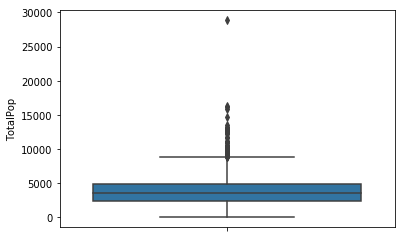

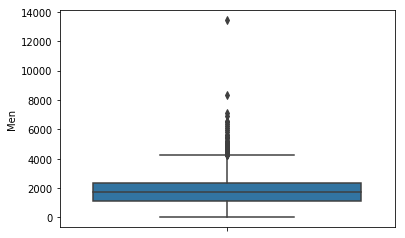

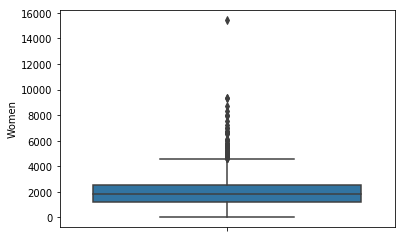

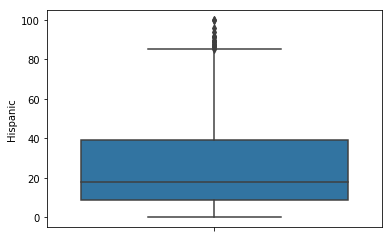

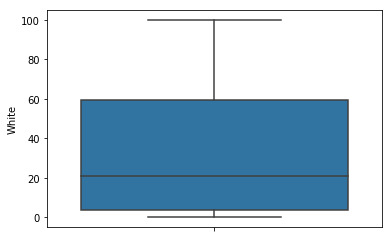

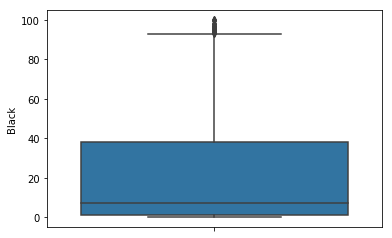

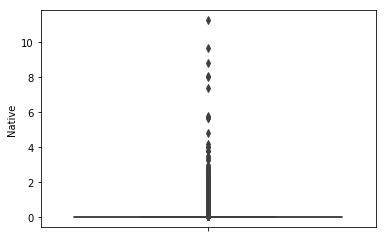

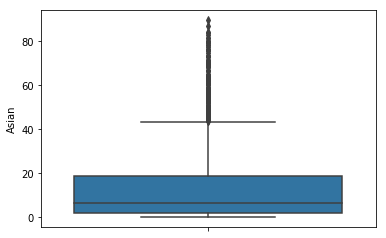

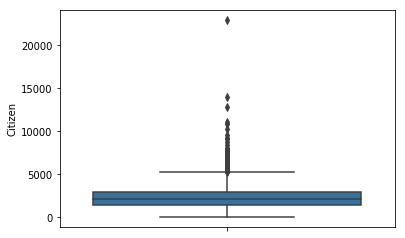

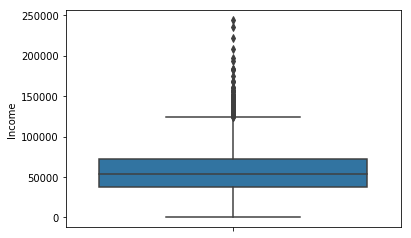

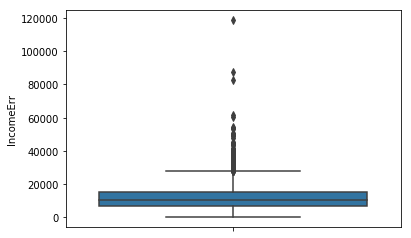

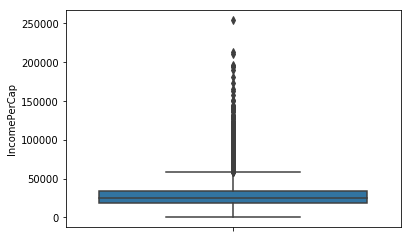

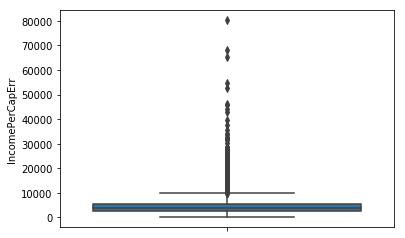

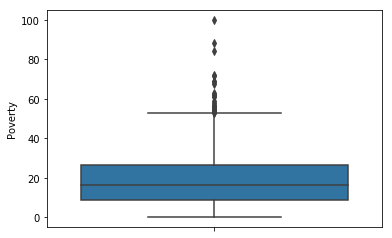

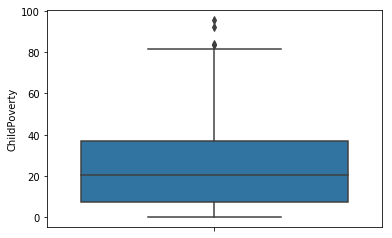

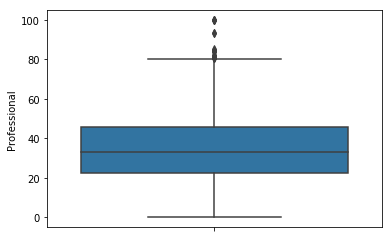

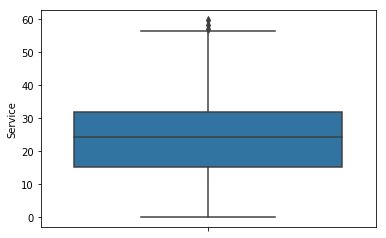

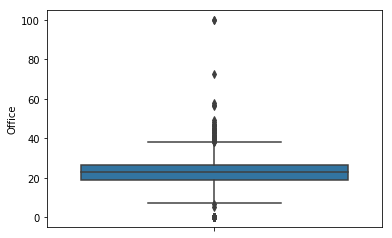

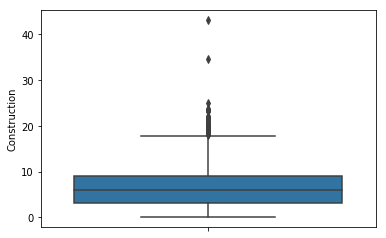

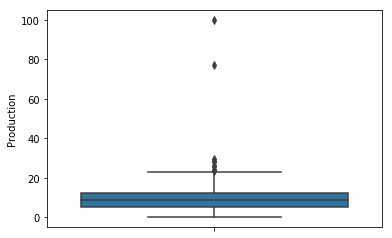

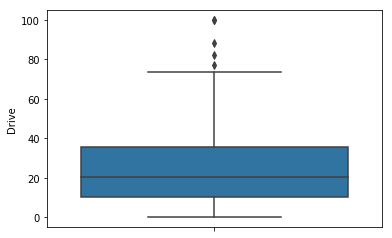

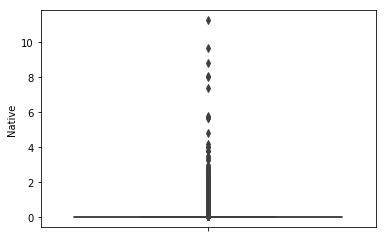

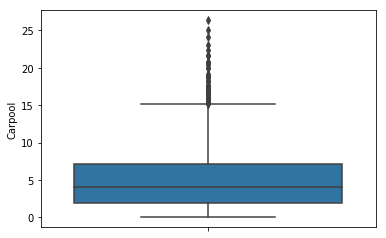

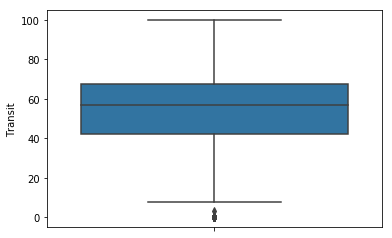

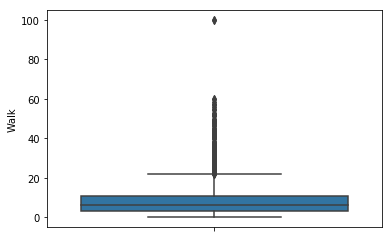

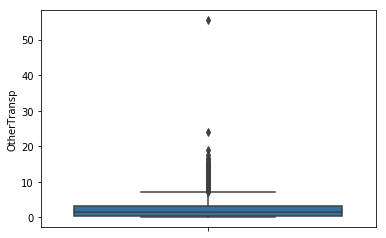

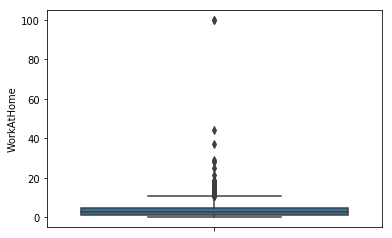

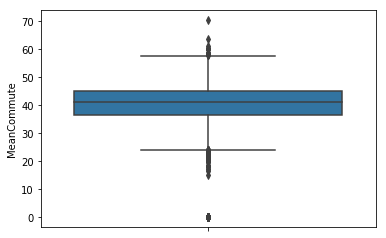

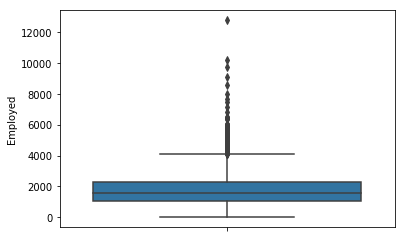

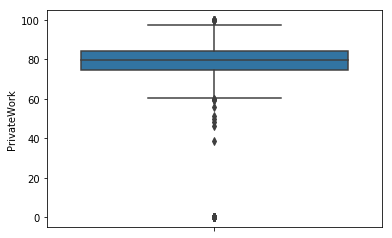

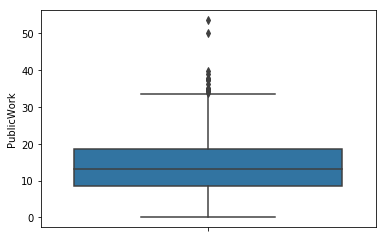

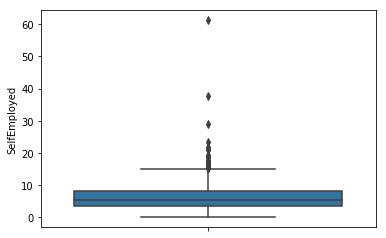

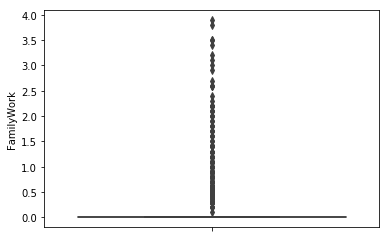

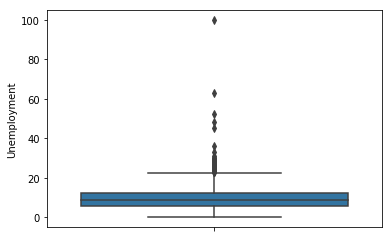

In [60]:
sns.boxplot(y="TotalPop", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Men", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Women", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Hispanic", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="White", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Black", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Native", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Asian", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Citizen", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Income", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="IncomeErr", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="IncomePerCap", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="IncomePerCapErr", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Poverty", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="ChildPoverty", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Professional", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Service", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Office", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Construction", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Production", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Drive", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Native", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Carpool", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Transit", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Walk", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="OtherTransp", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="WorkAtHome", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="MeanCommute", data=census1, fliersize=5)
plt.show()


sns.boxplot(y="Employed", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="PrivateWork", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="PublicWork", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="SelfEmployed", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="FamilyWork", data=census1, fliersize=5)
plt.show()

sns.boxplot(y="Unemployment", data=census1, fliersize=5)
plt.show()

observation : except for white people there seems to be outliers for every other column

Check for Correlation

In [61]:
print(census1.corr())

                 CensusTract  TotalPop       Men     Women  Hispanic  \
CensusTract         1.000000 -0.047949 -0.030950 -0.061413 -0.342128   
TotalPop           -0.047949  1.000000  0.981639  0.985899  0.212261   
Men                -0.030950  0.981639  1.000000  0.935877  0.233652   
Women              -0.061413  0.985899  0.935877  1.000000  0.187083   
Hispanic           -0.342128  0.212261  0.233652  0.187083  1.000000   
White               0.186768  0.002932  0.020445 -0.012521 -0.460203   
Black              -0.165750 -0.067945 -0.118093 -0.021899 -0.130496   
Native             -0.000083 -0.027674 -0.028330 -0.026262 -0.001676   
Asian               0.333904  0.023279  0.050087 -0.000941 -0.155530   
Citizen             0.001740  0.930081  0.898044  0.930091  0.022033   
Income              0.279284  0.025211  0.033144  0.017491 -0.403553   
IncomeErr           0.187238 -0.107498 -0.103167 -0.108050 -0.288497   
IncomePerCap        0.145756  0.108885  0.105835  0.108270 -0.34

observations:men and women are highly correlated with total population which makes sense as population consist of men and women.
men,women, and totalPop are highly corrlated with Citizen, black,white,Asian,Native all ethinicity are negatively correlated which makes sense as they cant be both,publicwork privateWork SelfEmployeed and FamilyWork are also negatively correlated in few cases or there is a minute correlation which also makes sense as person cant be working at both sectors but thats not a rule as someone can have more than 1 job

variance

In [31]:
print (np.var(census1))

CensusTract        6.730270e+14
TotalPop           4.825216e+06
Men                1.082232e+06
Women              1.417000e+06
Hispanic           5.119058e+02
White              9.204720e+02
Black              8.877559e+02
Native             1.671866e+00
Asian              2.776180e+02
Citizen            2.298145e+06
Income             8.291985e+08
IncomeErr          7.153250e+07
IncomePerCap       6.402917e+08
IncomePerCapErr    3.229933e+07
Poverty            1.736559e+02
ChildPoverty       3.325458e+02
Professional       3.202730e+02
Service            1.300121e+02
Office             4.312435e+01
Construction       1.919235e+01
Production         2.991695e+01
Drive              2.877340e+02
Carpool            1.599934e+01
Transit            2.625607e+02
Walk               9.284810e+01
OtherTransp        8.647540e+00
WorkAtHome         2.135031e+01
MeanCommute        5.047006e+01
Employed           1.353433e+06
PrivateWork        4.791892e+01
PublicWork         5.105390e+01
SelfEmpl

There is no data with no variance or less variance

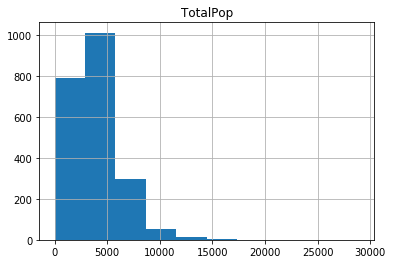

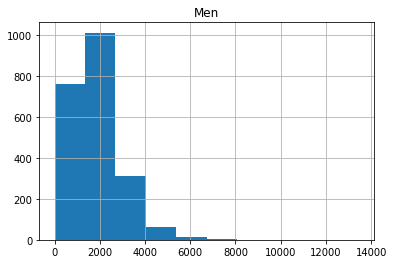

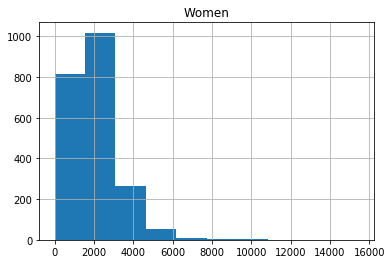

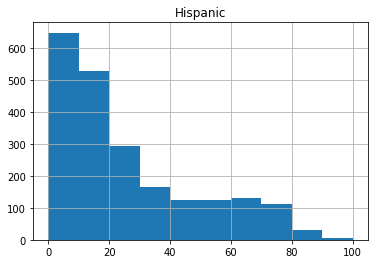

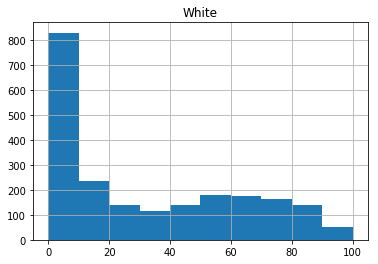

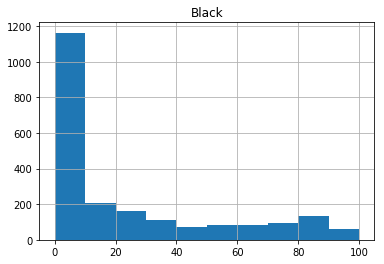

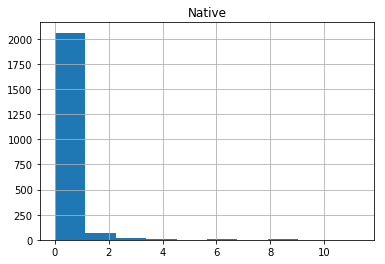

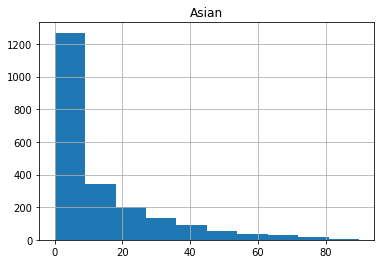

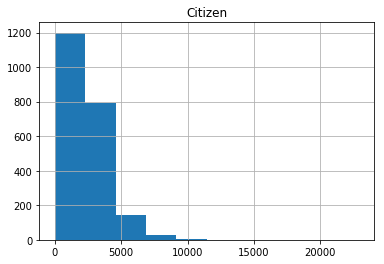

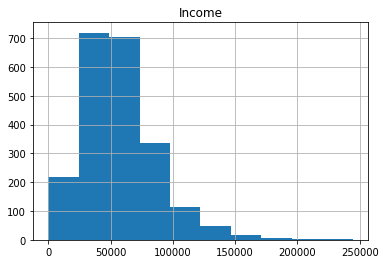

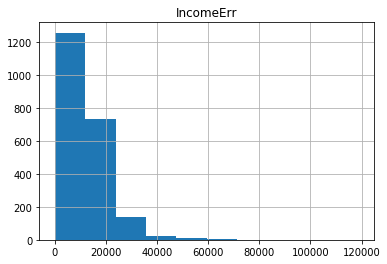

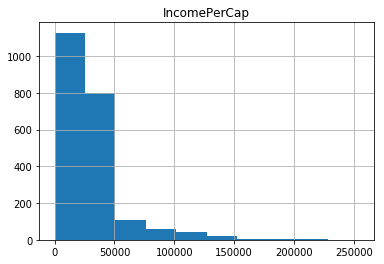

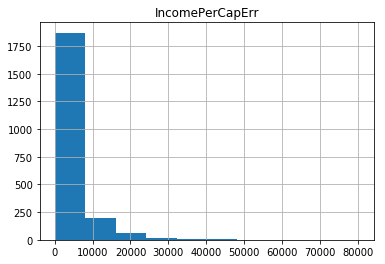

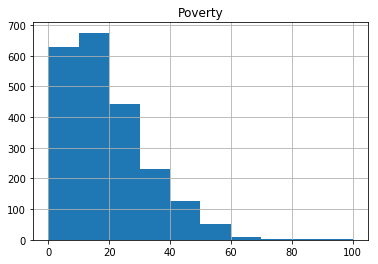

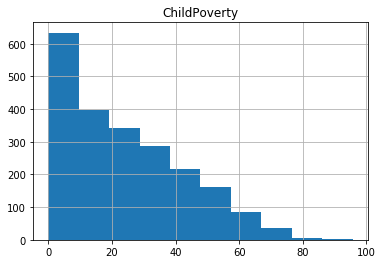

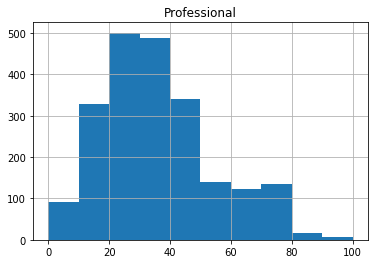

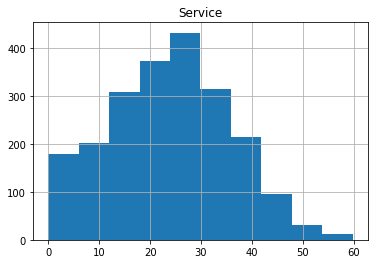

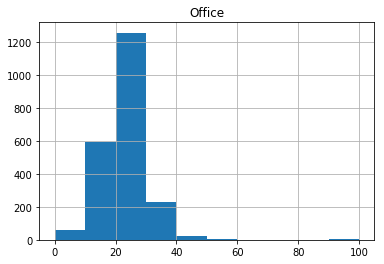

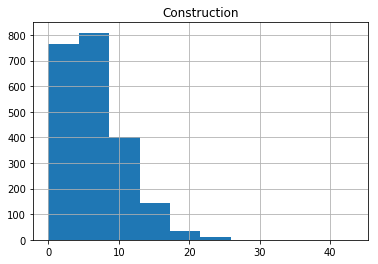

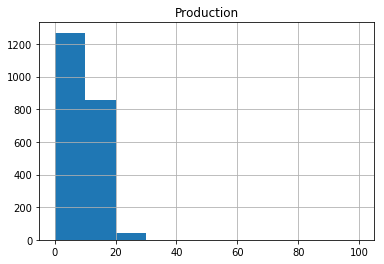

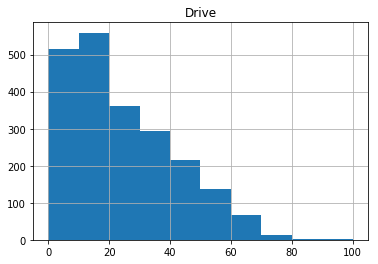

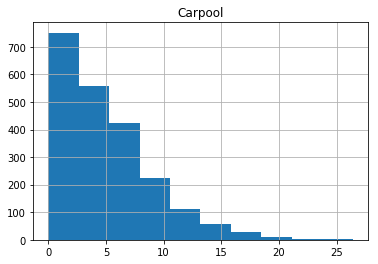

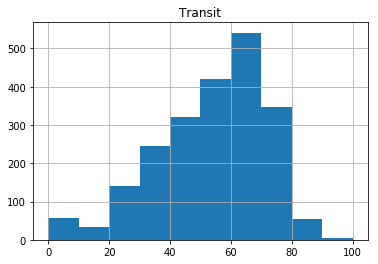

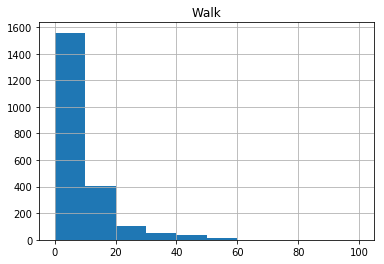

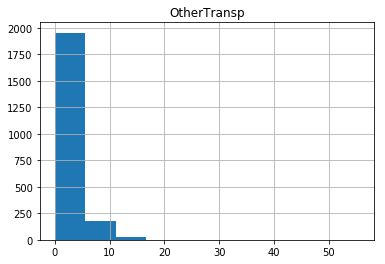

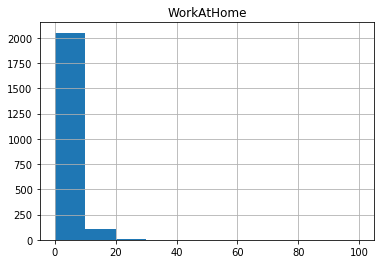

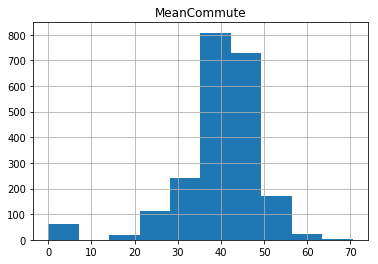

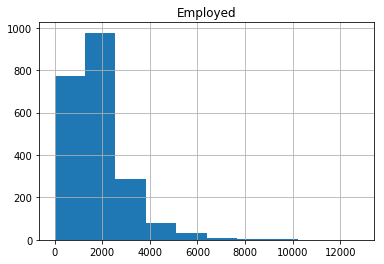

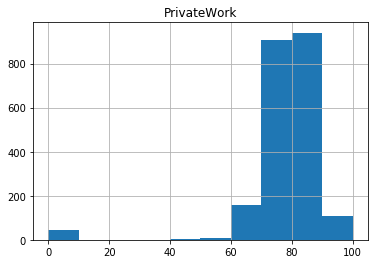

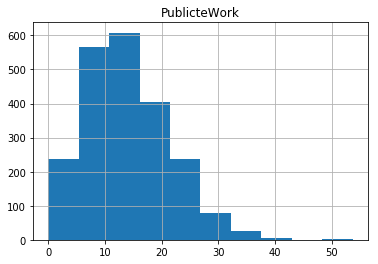

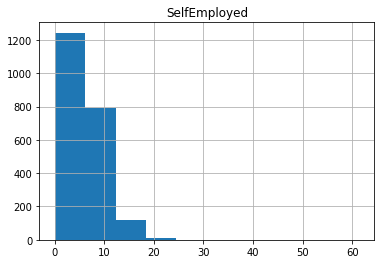

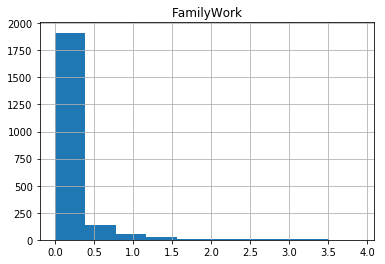

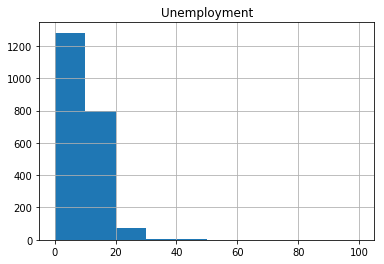

In [62]:
census1.TotalPop.hist()
plt.title("TotalPop")
plt.show()

census1.Men.hist()
plt.title("Men")
plt.show()

census1.Women.hist()
plt.title("Women")
plt.show()

census1.Hispanic.hist()
plt.title("Hispanic")
plt.show()

census1.White.hist()
plt.title("White")
plt.show()

census1.Black.hist()
plt.title("Black")
plt.show()

census1.Native.hist()
plt.title("Native")
plt.show()

census1.Asian.hist()
plt.title("Asian")
plt.show()

census1.Citizen.hist()
plt.title("Citizen")
plt.show()

census1.Income.hist()
plt.title("Income")
plt.show()

census1.IncomeErr.hist()
plt.title("IncomeErr")
plt.show()

census1.IncomePerCap.hist()
plt.title("IncomePerCap")
plt.show()

census1.IncomePerCapErr.hist()
plt.title("IncomePerCapErr")
plt.show()

census1.Poverty.hist()
plt.title("Poverty")
plt.show()

census1.ChildPoverty.hist()
plt.title("ChildPoverty")
plt.show()

census1.Professional.hist()
plt.title("Professional")
plt.show()

census1.Service.hist()
plt.title("Service")
plt.show()

census1.Office.hist()
plt.title("Office")
plt.show()

census1.Construction.hist()
plt.title("Construction")
plt.show()

census1.Production.hist()
plt.title("Production")
plt.show()

census1.Drive.hist()
plt.title("Drive")
plt.show()

census1.Carpool.hist()
plt.title("Carpool")
plt.show()

census1.Transit.hist()
plt.title("Transit")
plt.show()

census1.Walk.hist()
plt.title("Walk")
plt.show()

census1.OtherTransp.hist()
plt.title("OtherTransp")
plt.show()

census1.WorkAtHome.hist()
plt.title("WorkAtHome")
plt.show()

census1.MeanCommute.hist()
plt.title("MeanCommute")
plt.show()

census1.Employed.hist()
plt.title("Employed")
plt.show()

census1.PrivateWork.hist()
plt.title("PrivateWork")
plt.show()

census1.PublicWork.hist()
plt.title("PublicteWork")
plt.show()

census1.SelfEmployed.hist()
plt.title("SelfEmployed")
plt.show()

census1.FamilyWork.hist()
plt.title("FamilyWork")
plt.show()

census1.Unemployment.hist()
plt.title("Unemployment")
plt.show()

observation:
Gender: In most of the county 2000 people are men and women there seems to nearly equaly distribution betwwen both

ethinicity:most of the county has about 10% of black population,15-20% hispanic population,10% of white population,1% of native population,10% of asian population.

Income:median household income seems to be near 50000 for most of the population with an error of 10000.
Income per capita seems to be near 25000 with an error of500 for most of the population.
20% of people are below povery line in most of the county's.
30% of children suffer from poverty in most of the county.

Jobs:30-40% of population are in professional jobs like Sciene or business.
20-30% of population are in Service jobs.
20-30% of population are in Office jobs.
5-8% of population are in construction jobs.
5% of population is in production job.

Commute: 20% of people in most of the county prefer to drive, 5% prefer to carpool,70% prefer to use public transit,10% prefer to walk,5% use some other means of transportation.
On average maximum people commute for 45mins

jobSector: 80% of employed worker are in private work,15% in public work,5% are self employed,0.5-1% are in unpaid family work,10% are unemployed

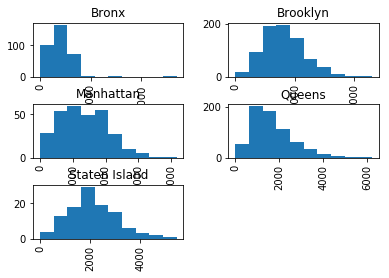

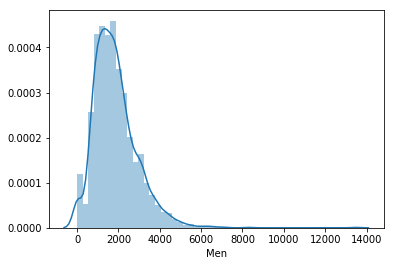

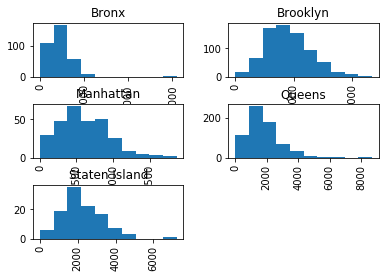

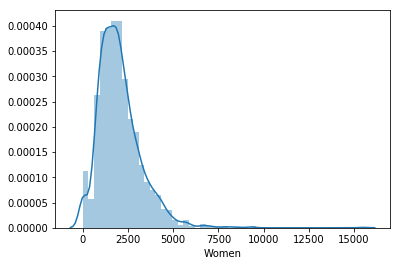

In [63]:
census1.hist("Men", "Borough")
plt.show()
sns.distplot(census1['Men'])
plt.show()

census1.hist("Women", "Borough")
plt.show()
sns.distplot(census1['Women'])
plt.show()



observation: men and women data seem to be right skewed 

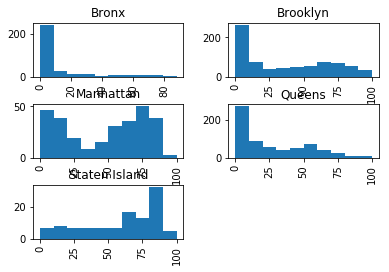

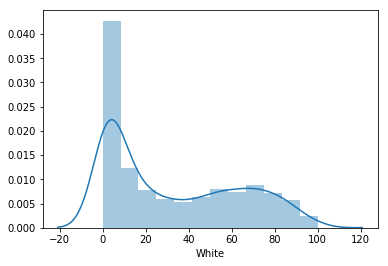

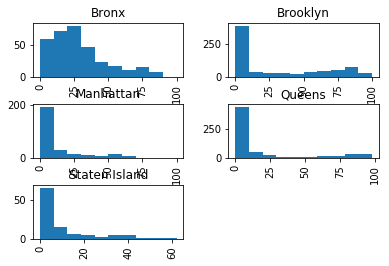

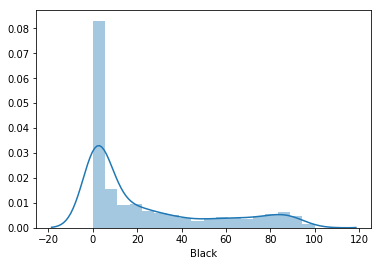

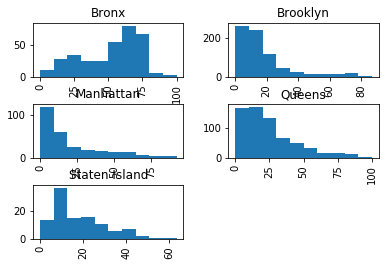

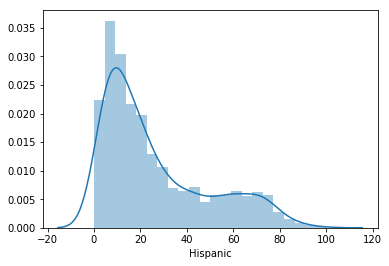

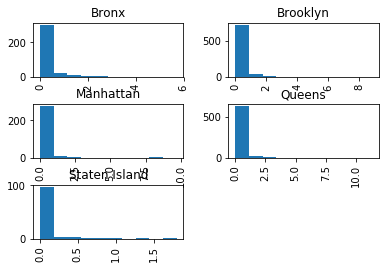

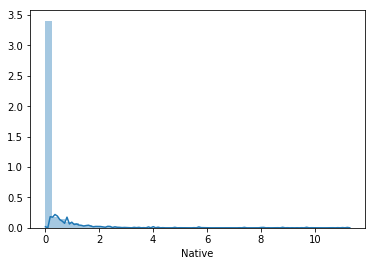

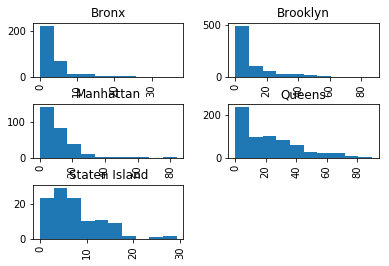

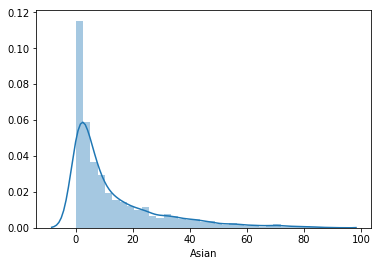

In [64]:
census1.hist("White", "Borough")
plt.show()
sns.distplot(census1['White'])
plt.show()

census1.hist("Black", "Borough")
plt.show()
sns.distplot(census1['Black'])
plt.show()

census1.hist("Hispanic", "Borough")
plt.show()
sns.distplot(census1['Hispanic'])
plt.show()

census1.hist("Native", "Borough")
plt.show()
sns.distplot(census1['Native'])
plt.show()

census1.hist("Asian", "Borough")
plt.show()
sns.distplot(census1['Asian'])
plt.show()

observation: Asian seems to be right skewed,rest of the ethinicity dont seem to have a normal distribution

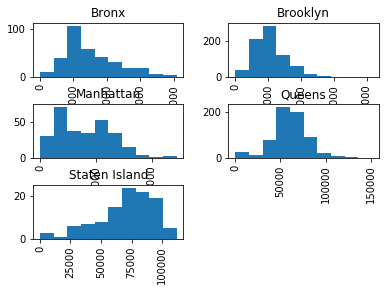

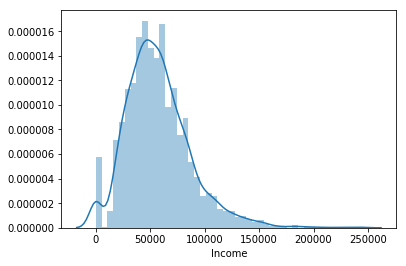

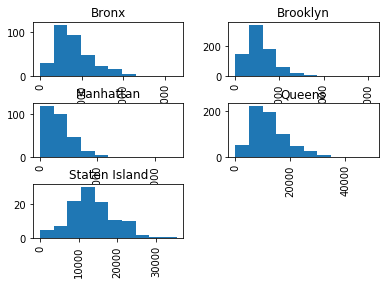

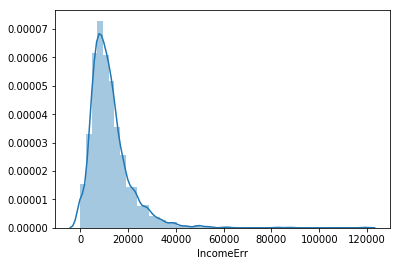

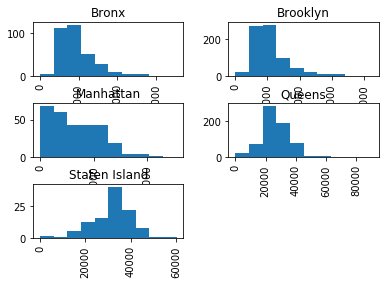

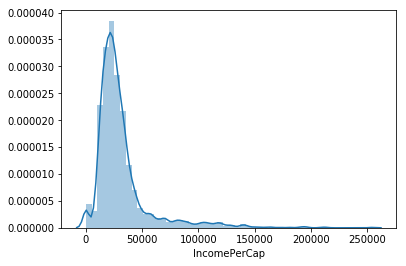

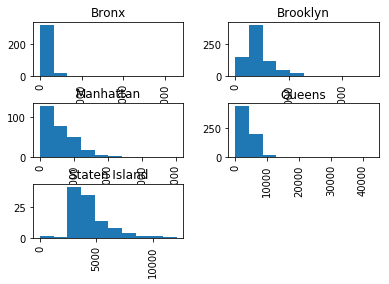

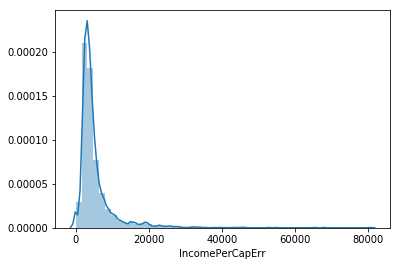

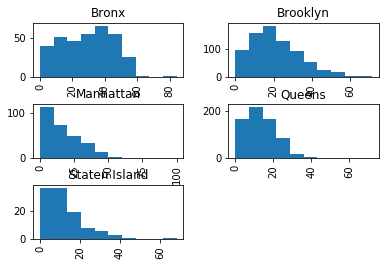

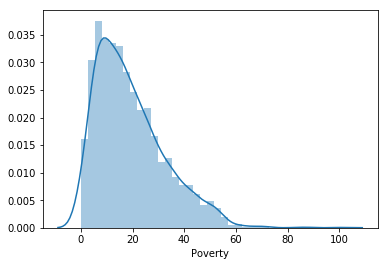

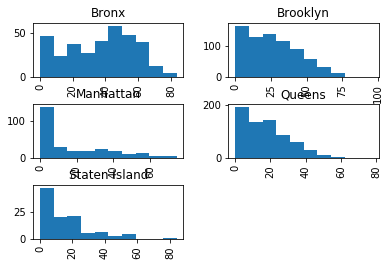

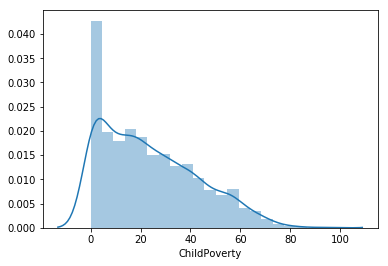

In [65]:
census1.hist("Income", "Borough")
plt.show()
sns.distplot(census1['Income'])
plt.show()

census1.hist("IncomeErr", "Borough")
plt.show()
sns.distplot(census1['IncomeErr'])
plt.show()

census1.hist("IncomePerCap", "Borough")
plt.show()
sns.distplot(census1['IncomePerCap'])
plt.show()

census1.hist("IncomePerCapErr", "Borough")
plt.show()
sns.distplot(census1['IncomePerCapErr'])
plt.show()

census1.hist("Poverty", "Borough")
plt.show()
sns.distplot(census1['Poverty'])
plt.show()

census1.hist("ChildPoverty", "Borough")
plt.show()
sns.distplot(census1['ChildPoverty'])
plt.show()

observation: Every column seem to be right skewed with income somewhat of a normal distribution

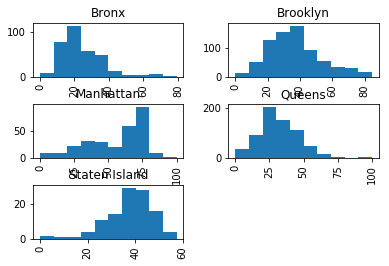

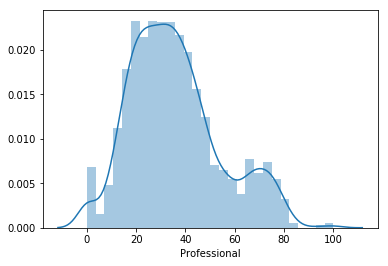

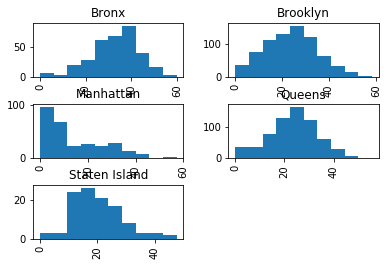

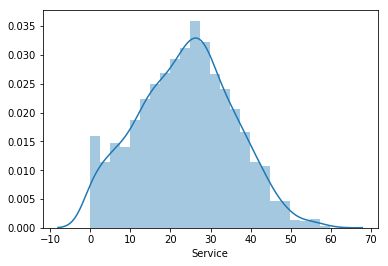

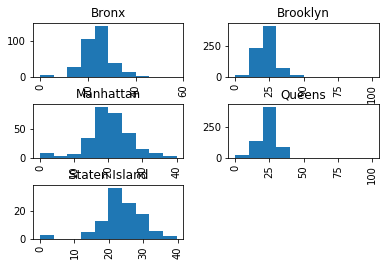

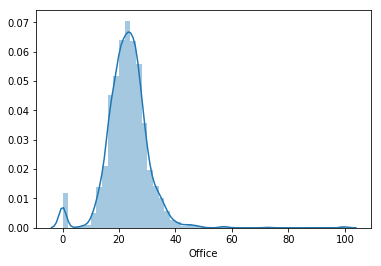

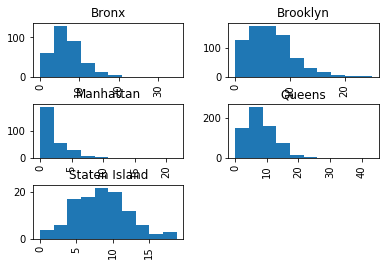

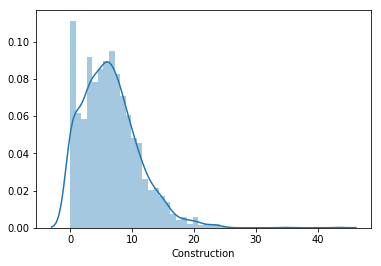

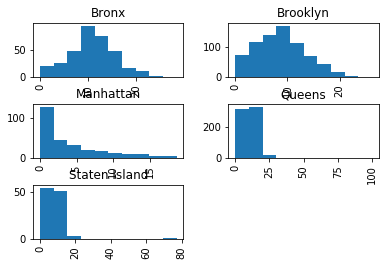

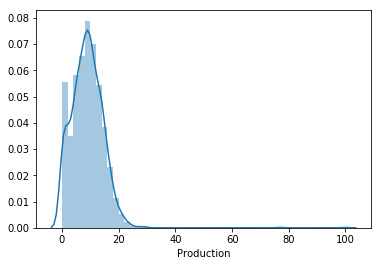

In [66]:
census1.hist("Professional", "Borough")
plt.show()
sns.distplot(census1['Professional'])
plt.show()

census1.hist("Service", "Borough")
plt.show()
sns.distplot(census1['Service'])
plt.show()

census1.hist("Office", "Borough")
plt.show()
sns.distplot(census1['Office'])
plt.show()

census1.hist("Construction", "Borough")
plt.show()
sns.distplot(census1['Construction'])
plt.show()

census1.hist("Production", "Borough")
plt.show()
sns.distplot(census1['Production'])
plt.show()

observation: service seems to have a normal distribution,office does not have a normal distribution, rest all seem to be right skewed

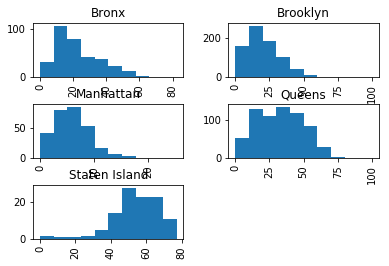

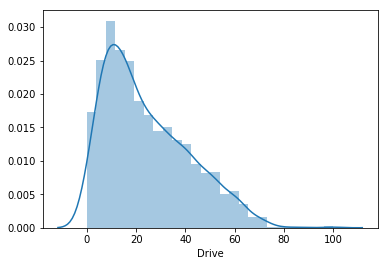

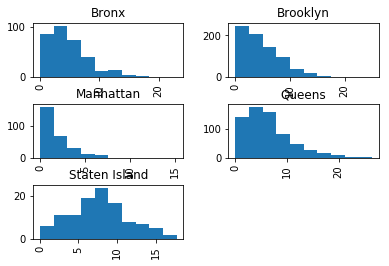

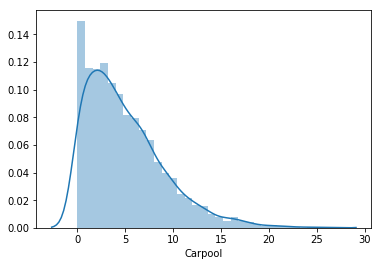

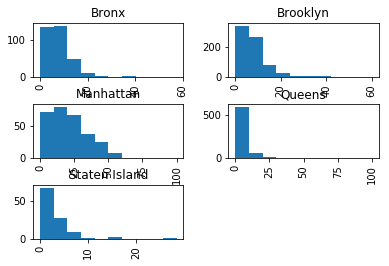

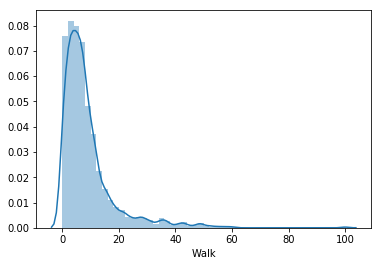

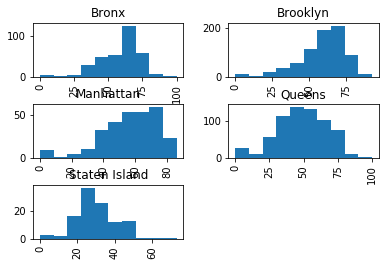

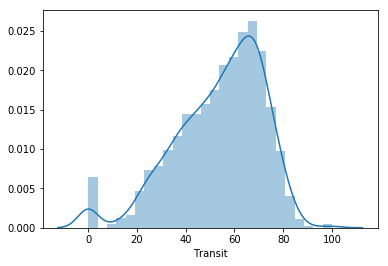

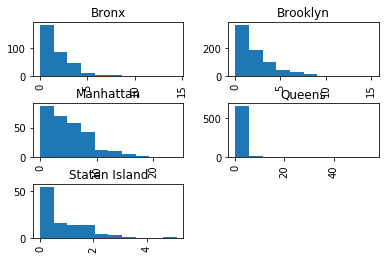

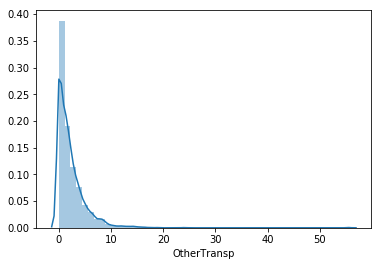

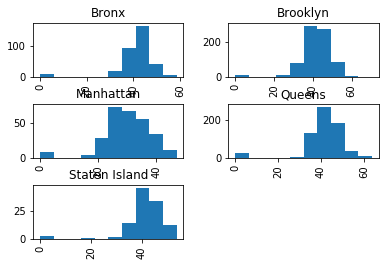

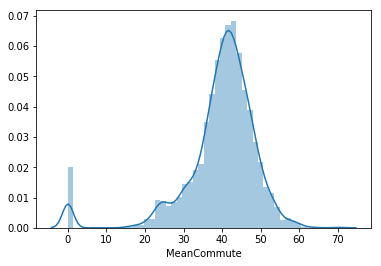

In [69]:
census1.hist("Drive", "Borough")
plt.show()
sns.distplot(census1['Drive'])
plt.show()

census1.hist("Carpool", "Borough")
plt.show()
sns.distplot(census1['Carpool'])
plt.show()

census1.hist("Walk", "Borough")
plt.show()
sns.distplot(census1['Walk'])
plt.show()

census1.hist("Transit", "Borough")
plt.show()
sns.distplot(census1['Transit'])
plt.show()

census1.hist("OtherTransp", "Borough")
plt.show()
sns.distplot(census1['OtherTransp'])
plt.show()

census1.hist("MeanCommute", "Borough")
plt.show()
sns.distplot(census1['MeanCommute'])
plt.show()

observation :Transit seems to be left skewed ,rest seem to be right skewed with mean commute not being a normal distribution

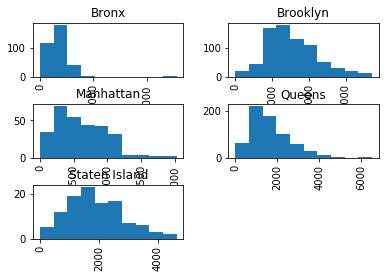

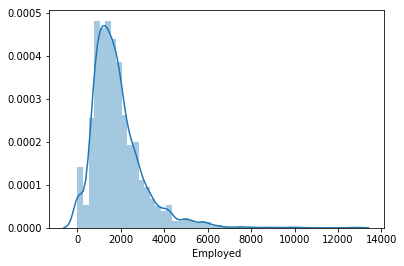

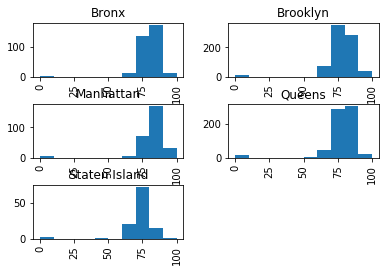

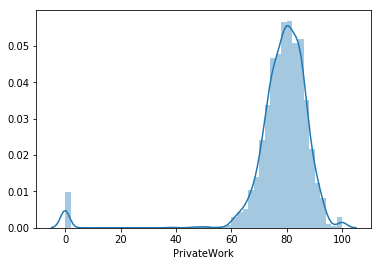

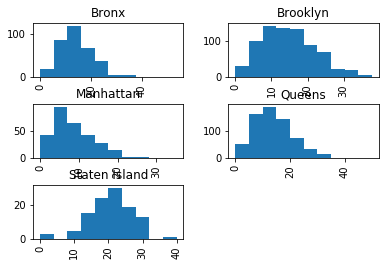

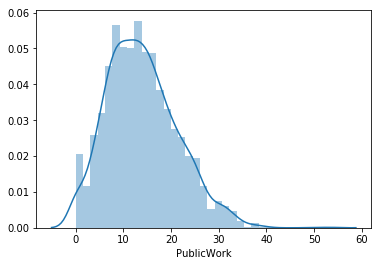

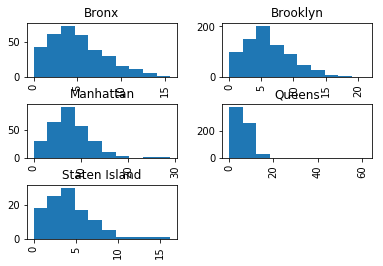

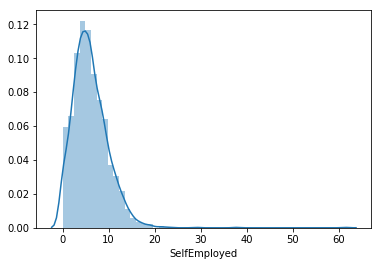

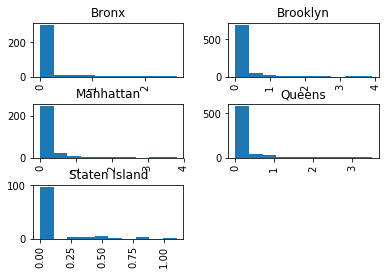

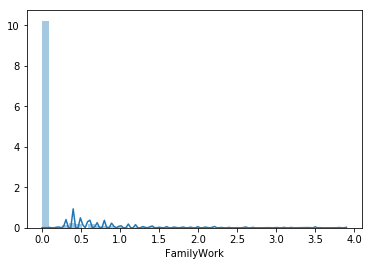

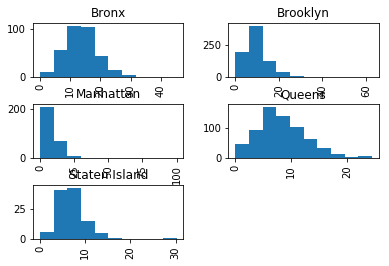

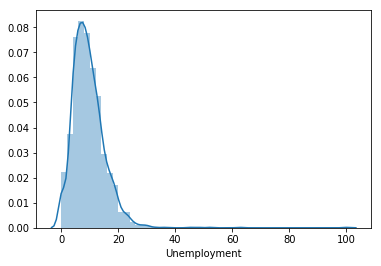

In [70]:
census1.hist("Employed", "Borough")
plt.show()
sns.distplot(census1['Employed'])
plt.show()

census1.hist("PrivateWork", "Borough")
plt.show()
sns.distplot(census1['PrivateWork'])
plt.show()

census1.hist("PublicWork", "Borough")
plt.show()
sns.distplot(census1['PublicWork'])
plt.show()

census1.hist("SelfEmployed", "Borough")
plt.show()
sns.distplot(census1['SelfEmployed'])
plt.show()

census1.hist("FamilyWork", "Borough")
plt.show()
sns.distplot(census1['FamilyWork'])
plt.show()

census1.hist("Unemployment", "Borough")
plt.show()
sns.distplot(census1['Unemployment'])
plt.show()

observation: employeed,publicwork,selfEmployed,Unemployement seem to be right skewed,Familywork and private work do not have a normal distribution

Numerical Summary:

In [71]:
census1.describe()

CensusTract      TotalPop           Men         Women     Hispanic  \
count  2.167000e+03   2167.000000   2167.000000   2167.000000  2167.000000   
mean   3.605476e+10   3888.667743   1852.812183   2035.855561    26.145501   
std    2.594875e+07   2240.050968   1063.921420   1212.765249    22.734508   
min    3.600500e+10      0.000000      0.000000      0.000000     0.000000   
25%    3.604703e+10   2359.500000   1113.000000   1224.500000     8.600000   
50%    3.604712e+10   3550.000000   1699.000000   1848.000000    18.000000   
75%    3.608103e+10   4957.500000   2360.500000   2571.500000    39.250000   
max    3.608599e+10  28926.000000  13460.000000  15466.000000   100.000000   

             White        Black       Native        Asian       Citizen  \
count  2167.000000  2167.000000  2167.000000  2167.000000   2167.000000   
mean     32.460914    23.519751     0.195016    13.200692   2436.468389   
std      30.465099    29.383285     0.694586    16.395272   1538.399585   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       3.700000     1.400000     0.000000     1.900000   1446.000000   
50%      21.100000     7.400000     0.000000     6.400000   2140.000000   
75%      59.650000    38.050000     0.000000    18.650000   2976.000000   
max     100.000000   100.000000    11.300000    89.800000  22905.000000   

           ...              Walk  OtherTransp   WorkAtHome  MeanCommute  \
count      ...       2167.000000  2167.000000  2167.000000  2167.000000   
mean       ...          8.868528     2.261144     3.674712    39.682187   
std        ...          9.611118     2.861994     4.544872     9.731564   
min        ...          0.000000     0.000000     0.000000     0.000000   
25%        ...          3.100000     0.400000     1.200000    36.700000   
50%        ...          6.300000     1.500000     2.700000    41.200000   
75%        ...         10.700000     3.100000     5.000000    45.100000   
max        ...        100.000000    55.600000   100.000000    70.500000   

           Employed  PrivateWork   PublicWork  SelfEmployed  FamilyWork  \
count   2167.000000  2167.000000  2167.000000   2167.000000  2167.00000   
mean    1813.498385    77.957960    13.911906      6.029211     0.11629   
std     1180.593180    13.041599     7.428133      3.908765     0.38801   
min        0.000000     0.000000     0.000000      0.000000     0.00000   
25%     1052.500000    74.700000     8.500000      3.400000     0.00000   
50%     1579.000000    79.700000    13.100000      5.500000     0.00000   
75%     2273.500000    84.300000    18.550000      8.100000     0.00000   
max    12780.000000   100.000000    53.700000     61.400000     3.90000   

       Unemployment  
count   2167.000000  
mean       9.568666  
std        5.886415  
min        0.000000  
25%        5.700000  
50%        8.700000  
75%       12.500000  
max      100.000000  

[8 rows x 34 columns]

BoxPlot and Whisker plots:

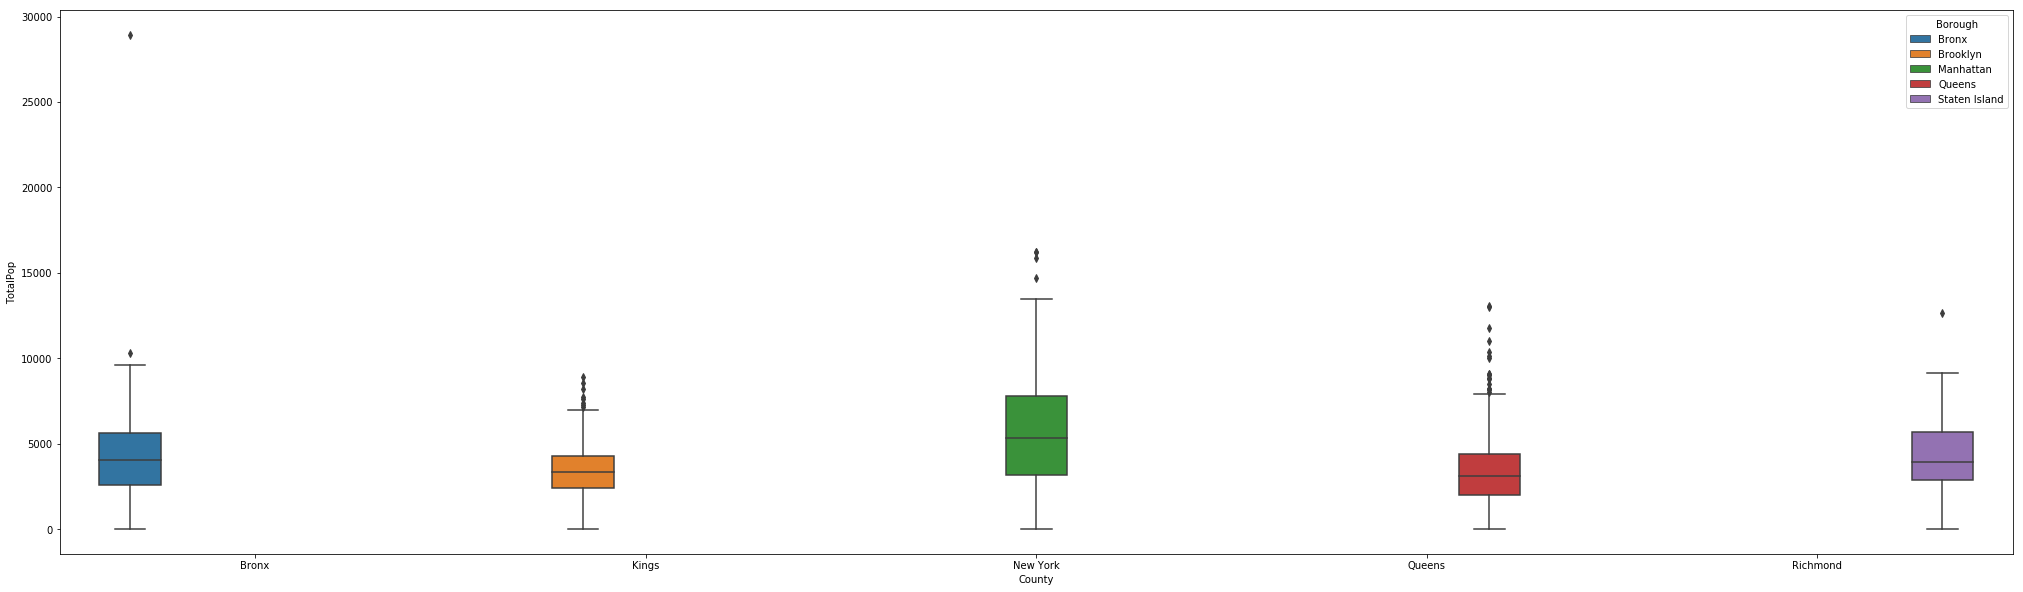

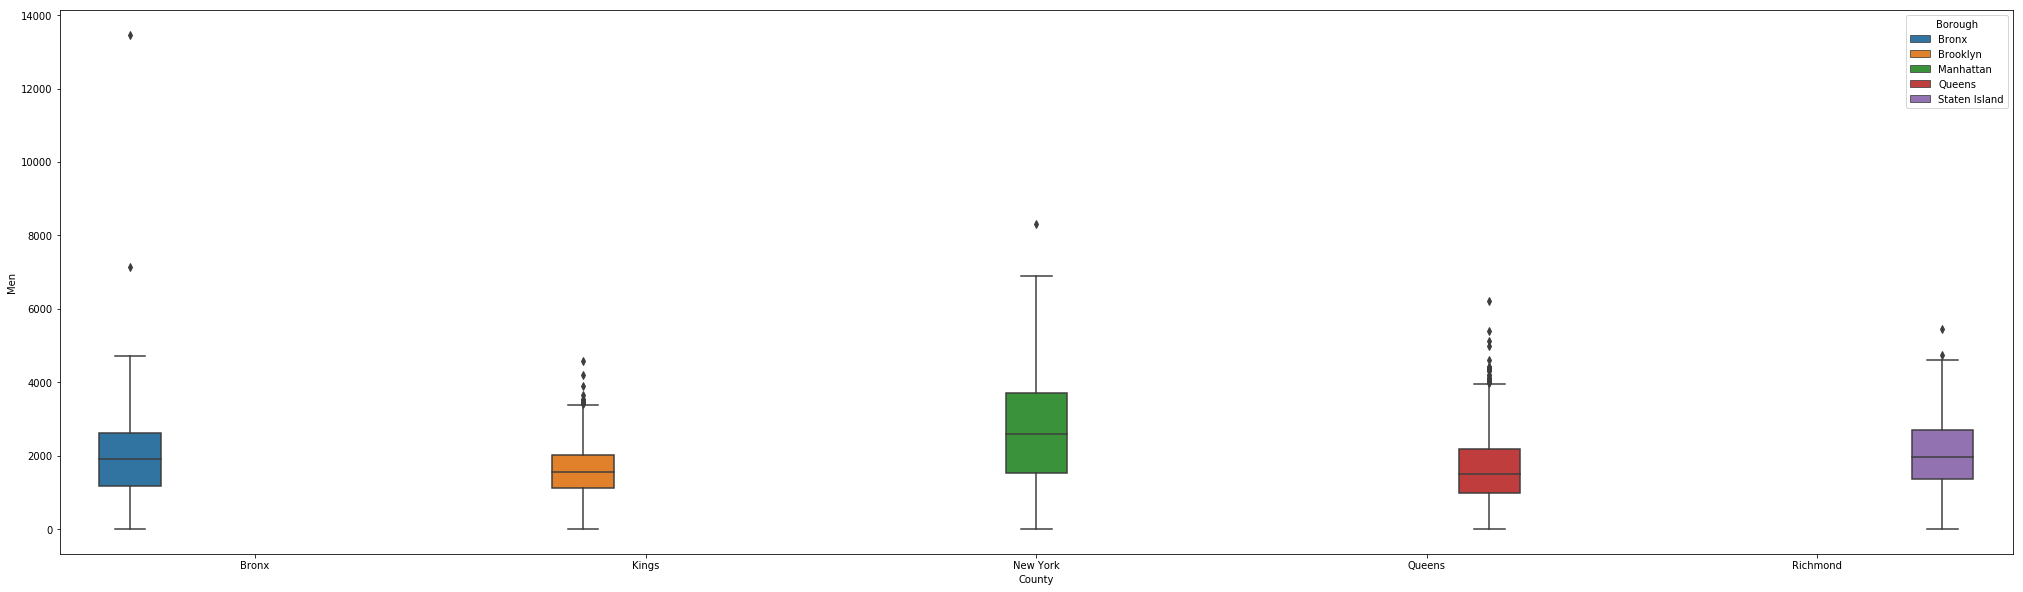

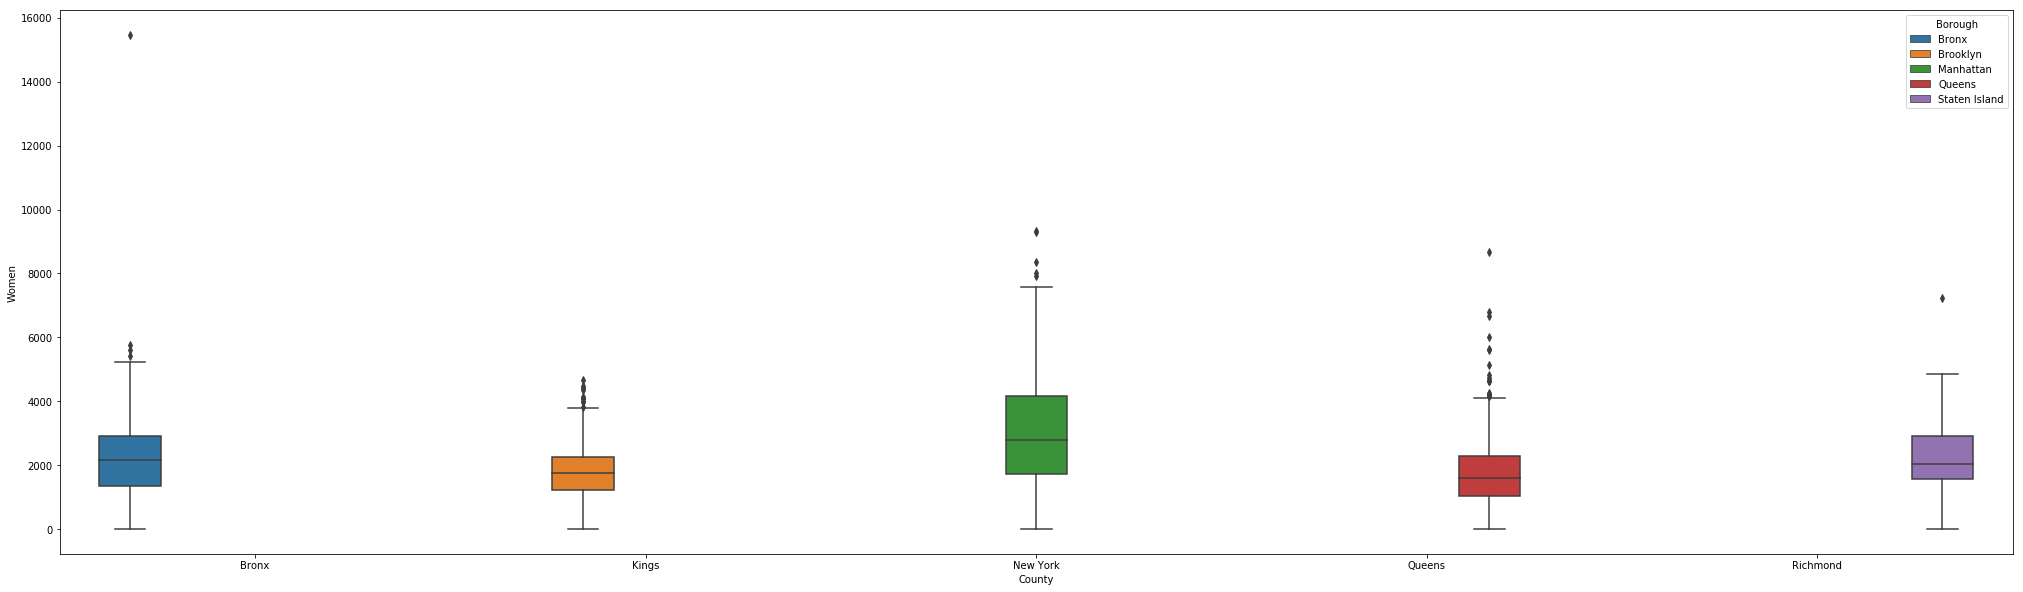

In [77]:
sns.boxplot(y="TotalPop",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Men",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Women",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))




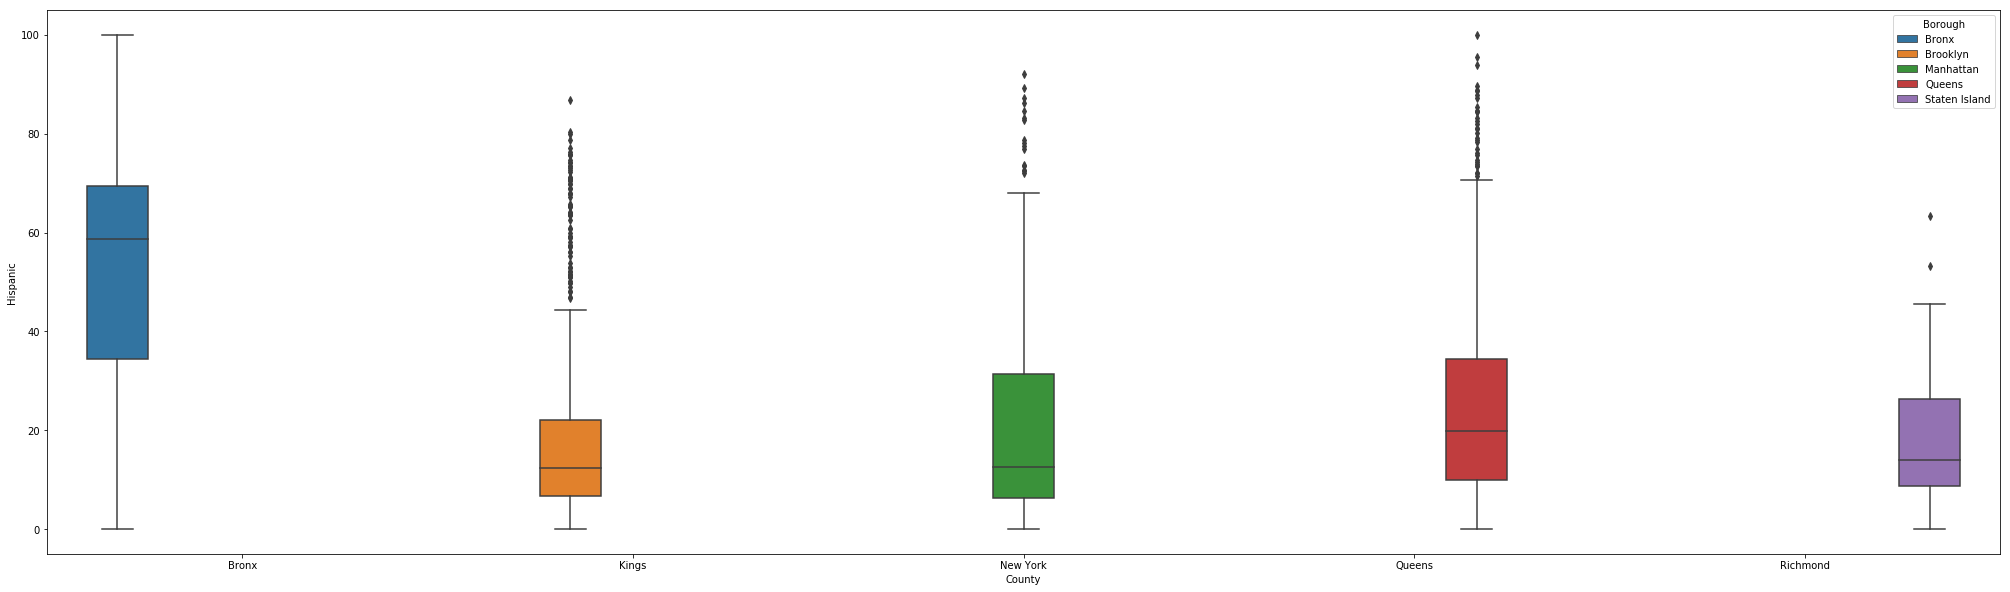

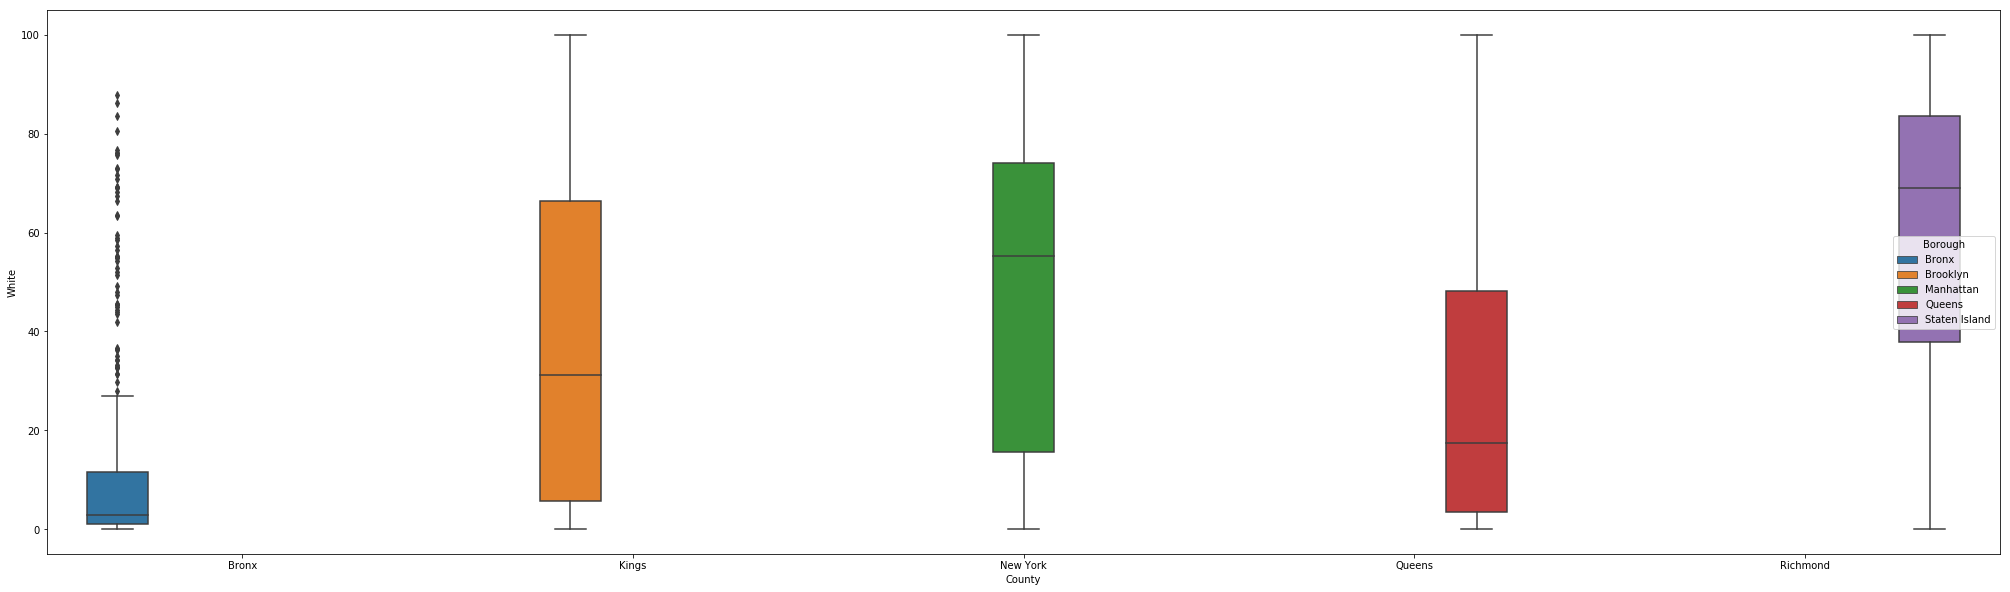

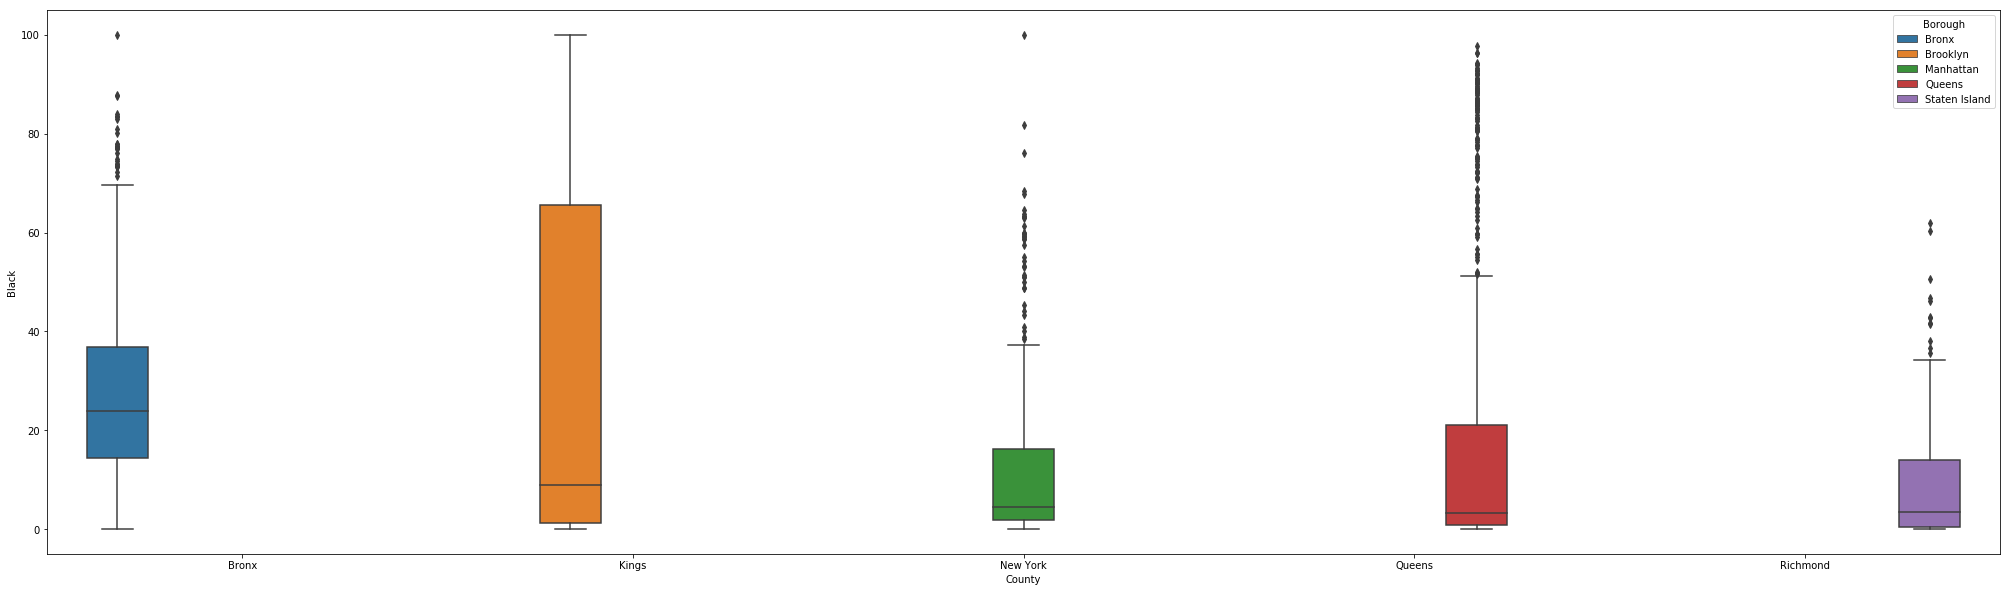

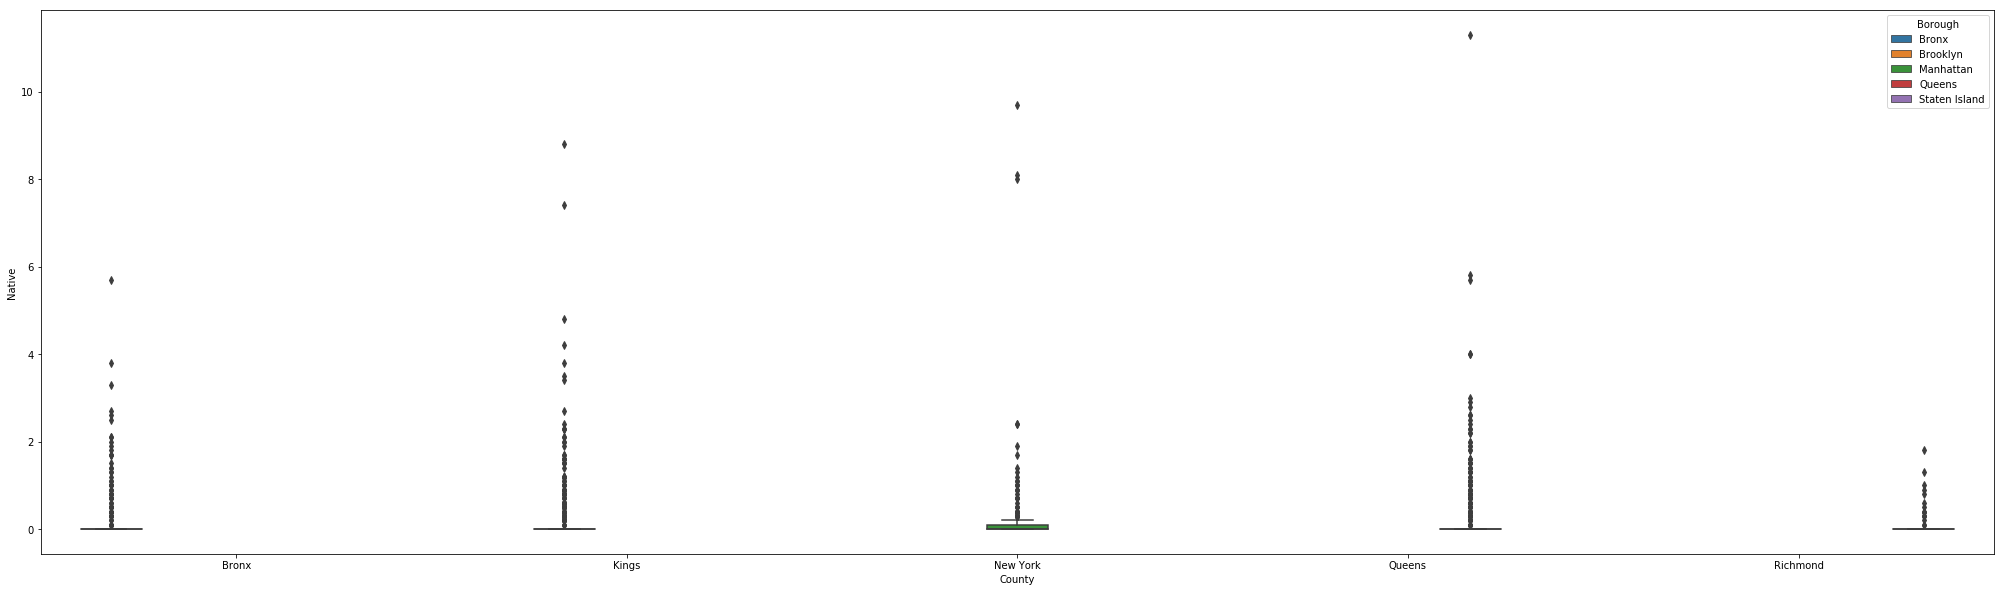

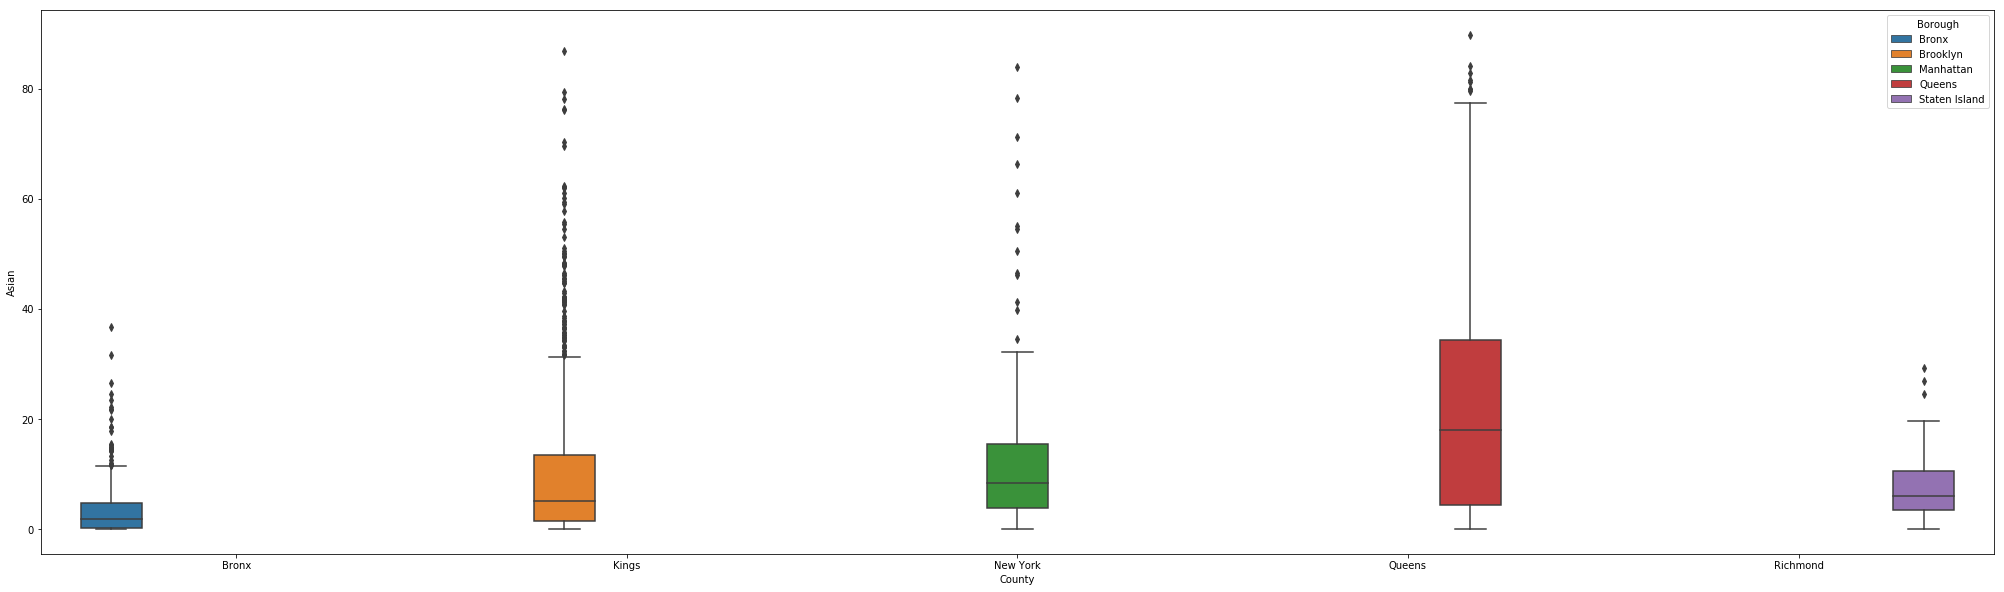

In [81]:
sns.boxplot(y="Hispanic",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="White",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Black",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Native",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Asian",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))


obsevation: There are most hispanic in bronx, there are most white people in manhattan and brooklyn,there are most black people in brooklyn,there are more asian in queens

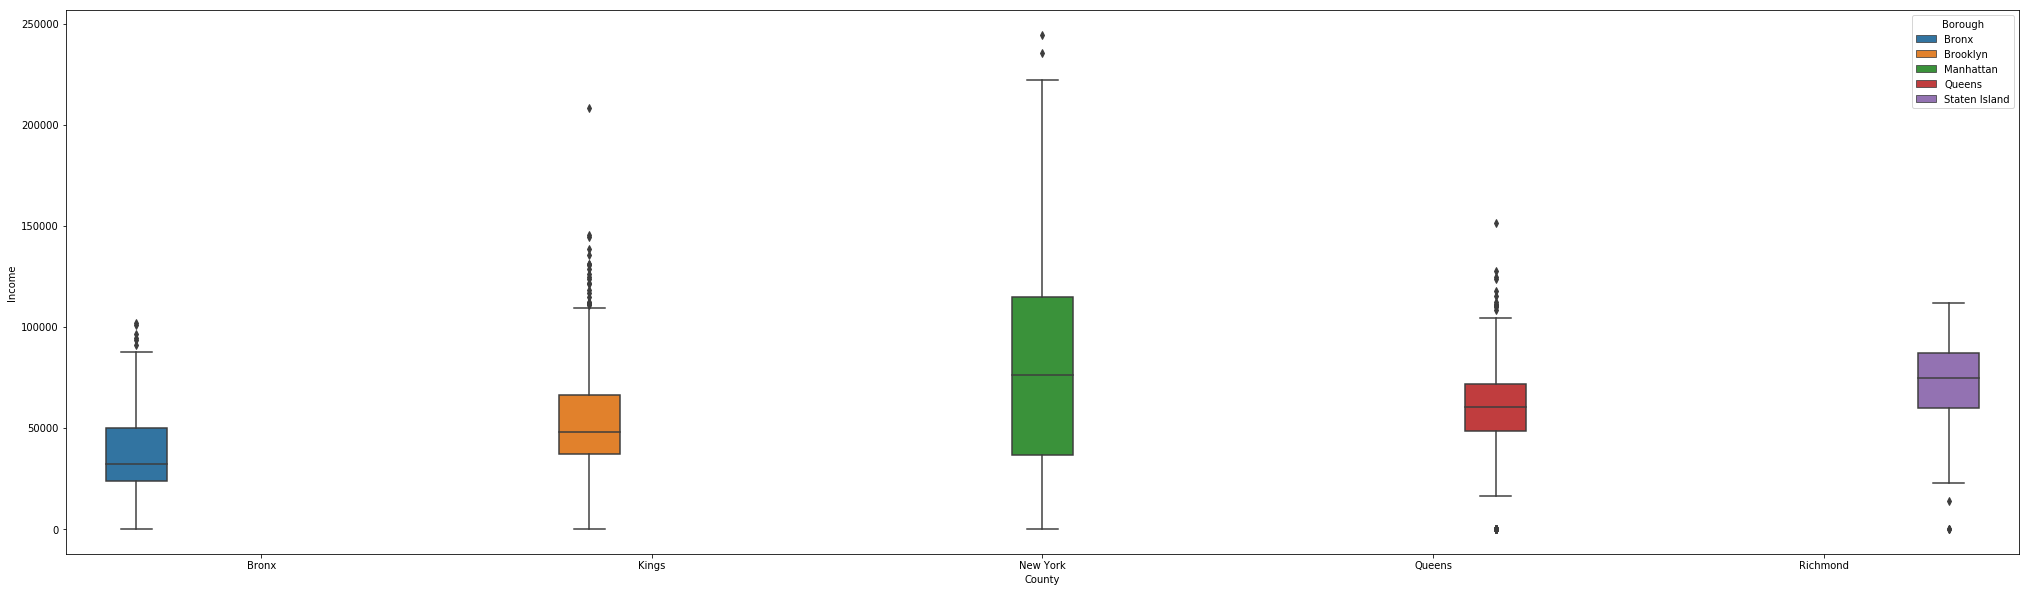

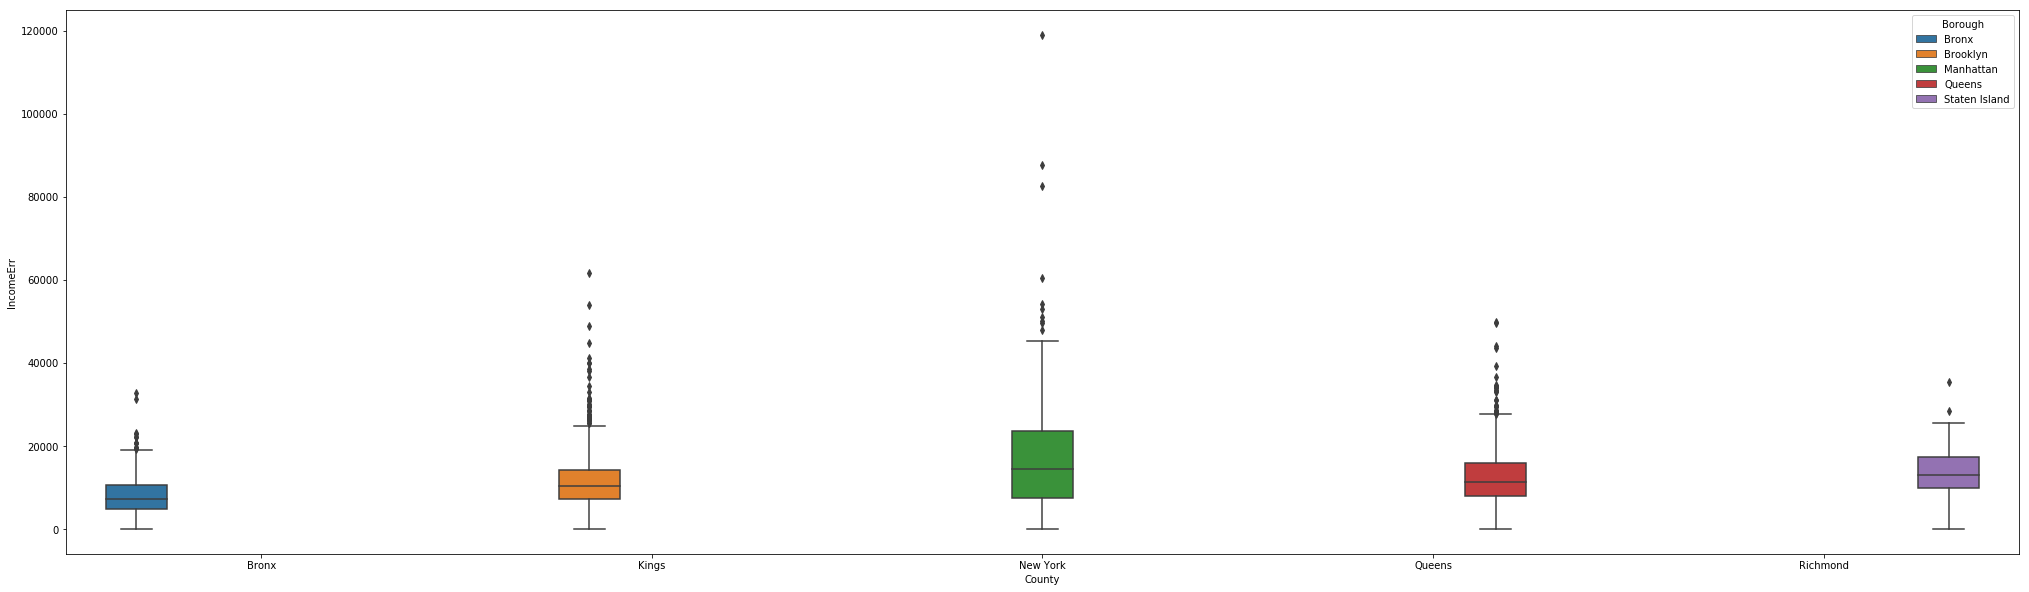

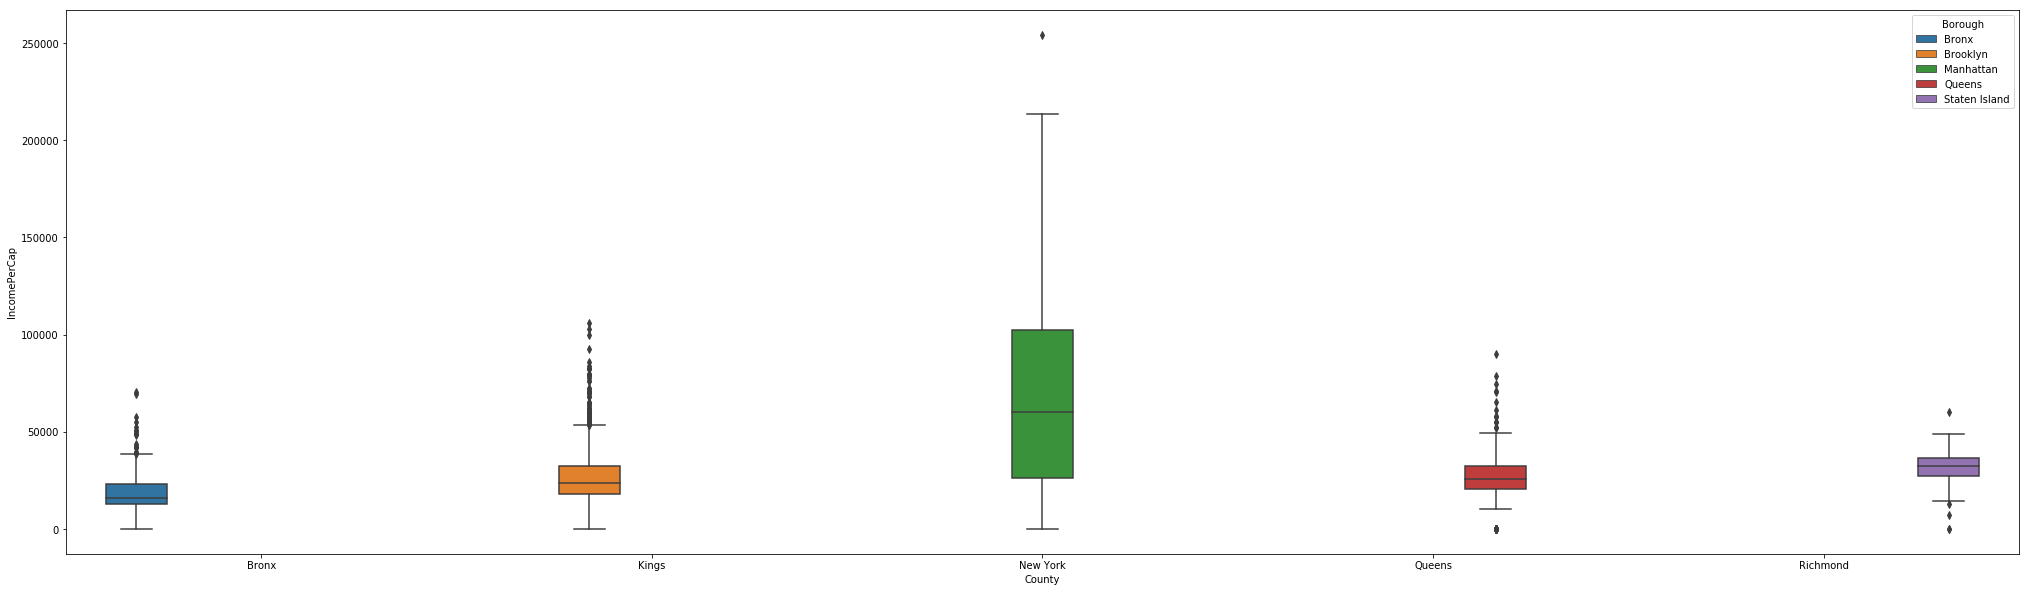

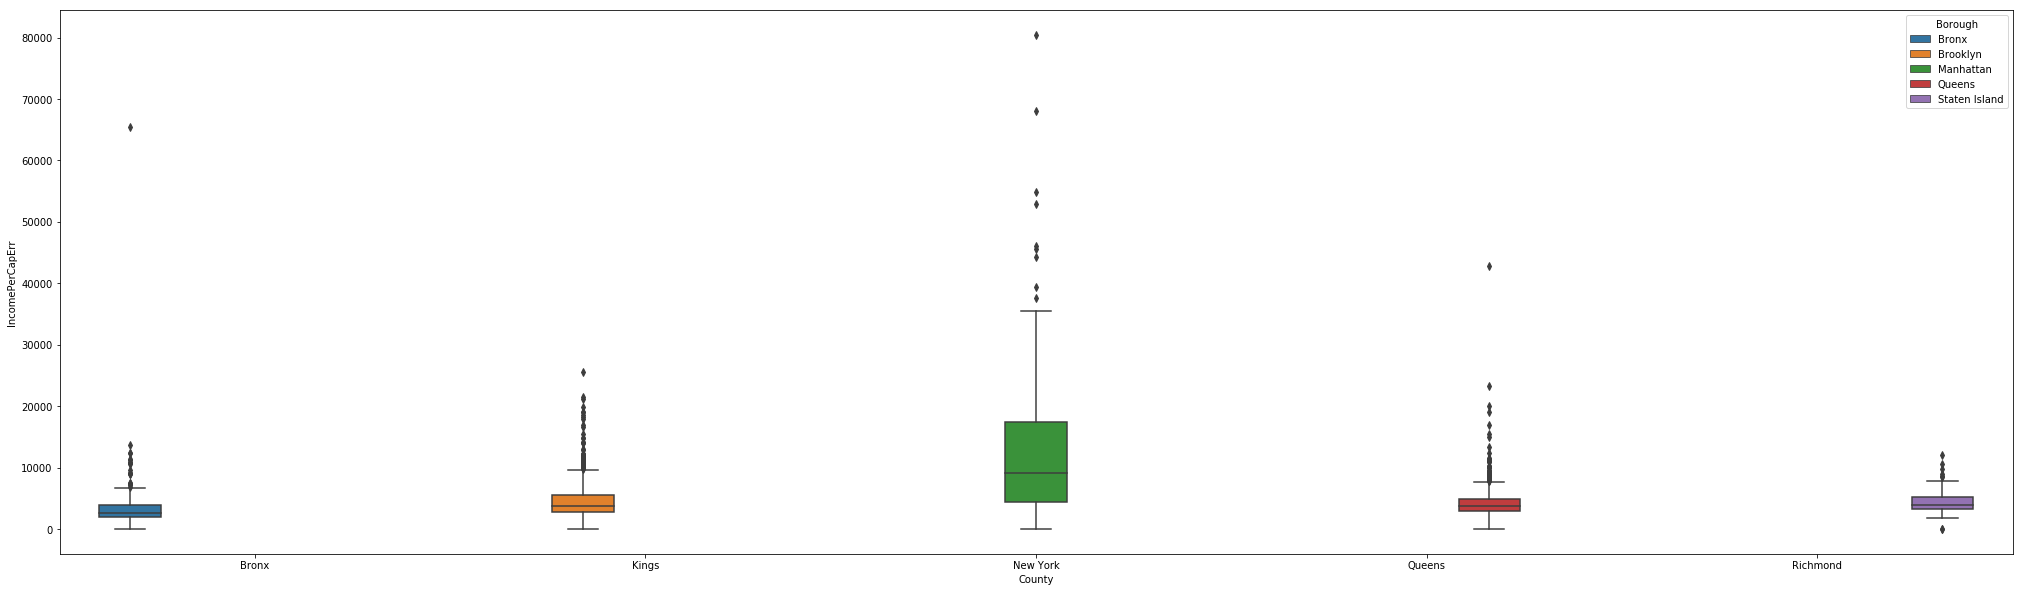

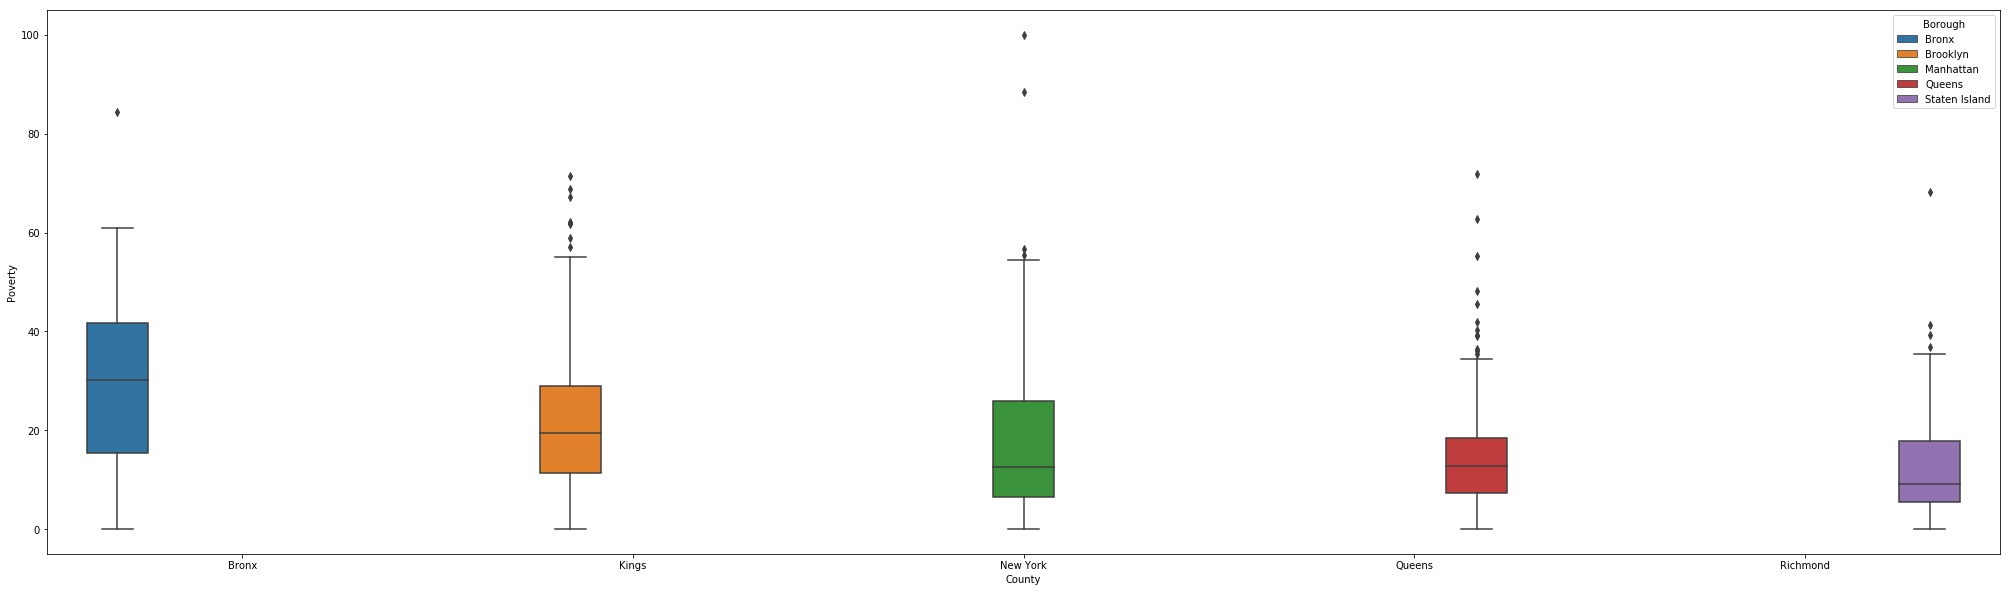

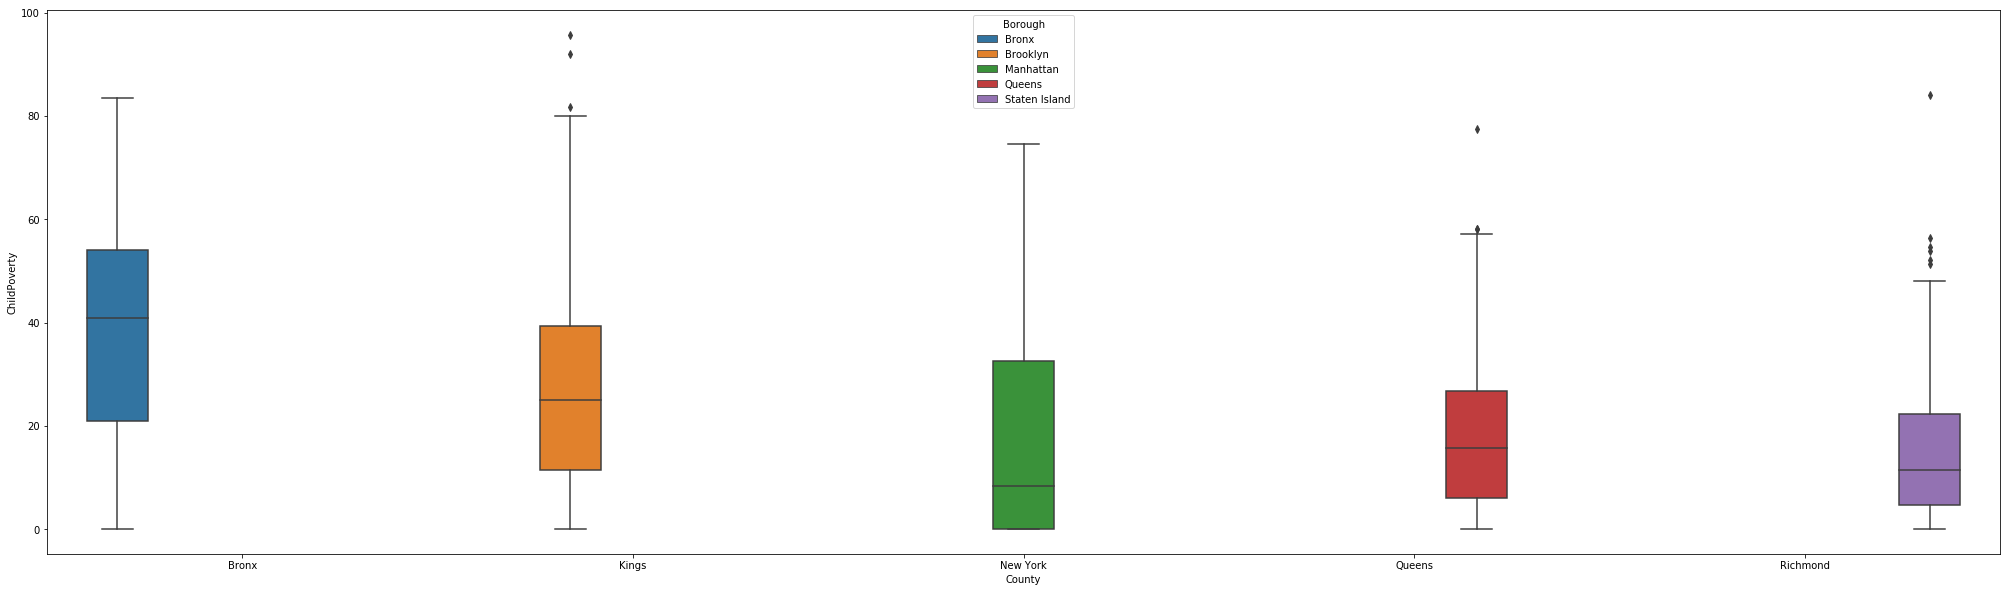

In [82]:
sns.boxplot(y="Income",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="IncomeErr",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="IncomePerCap",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="IncomePerCapErr",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Poverty",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="ChildPoverty",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

observation: people living in Manhattan have most income and also income per capital therefore there is most error in income in manhattan.There is more poverty and child poverty in bronx

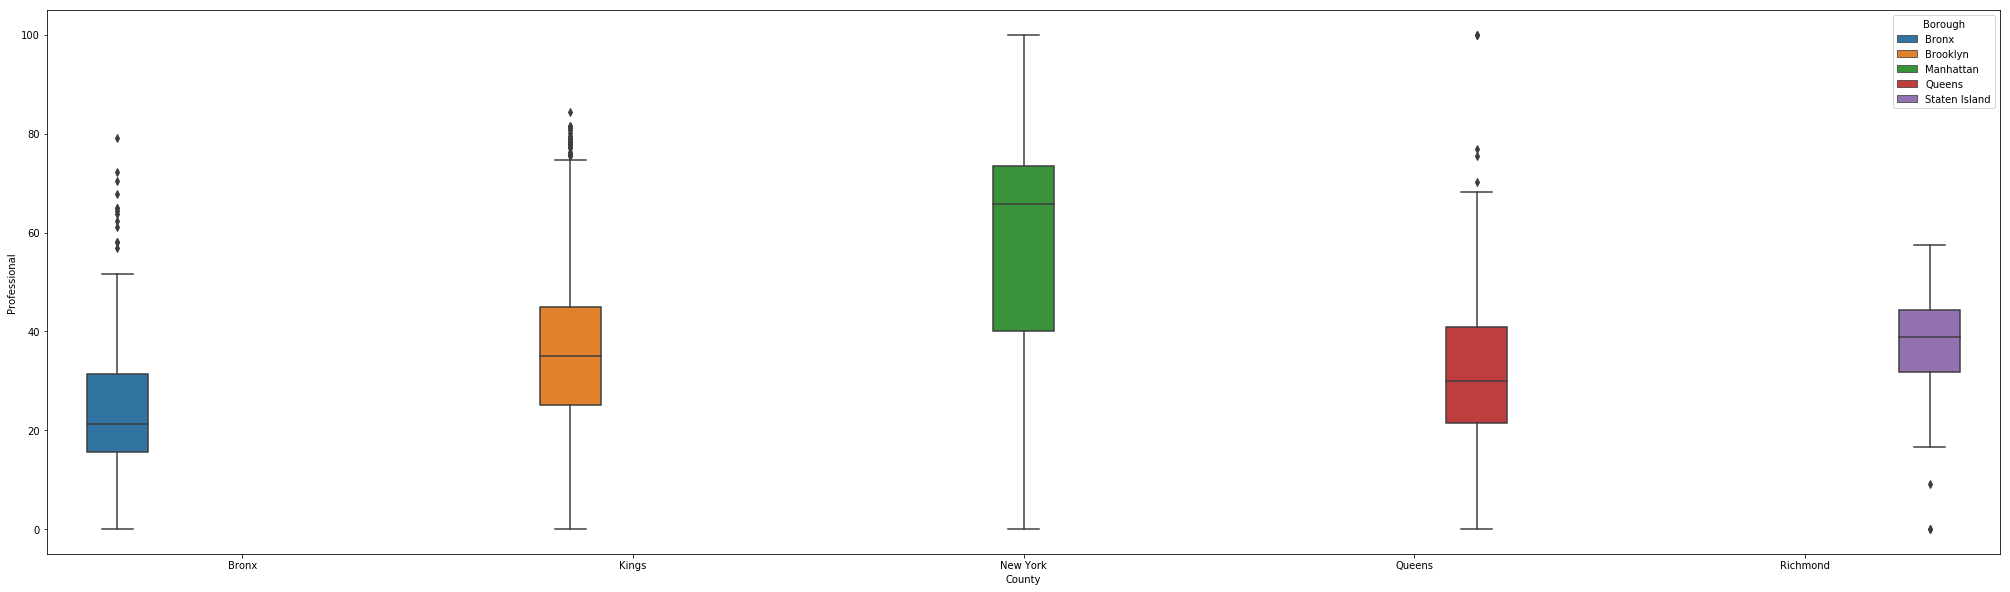

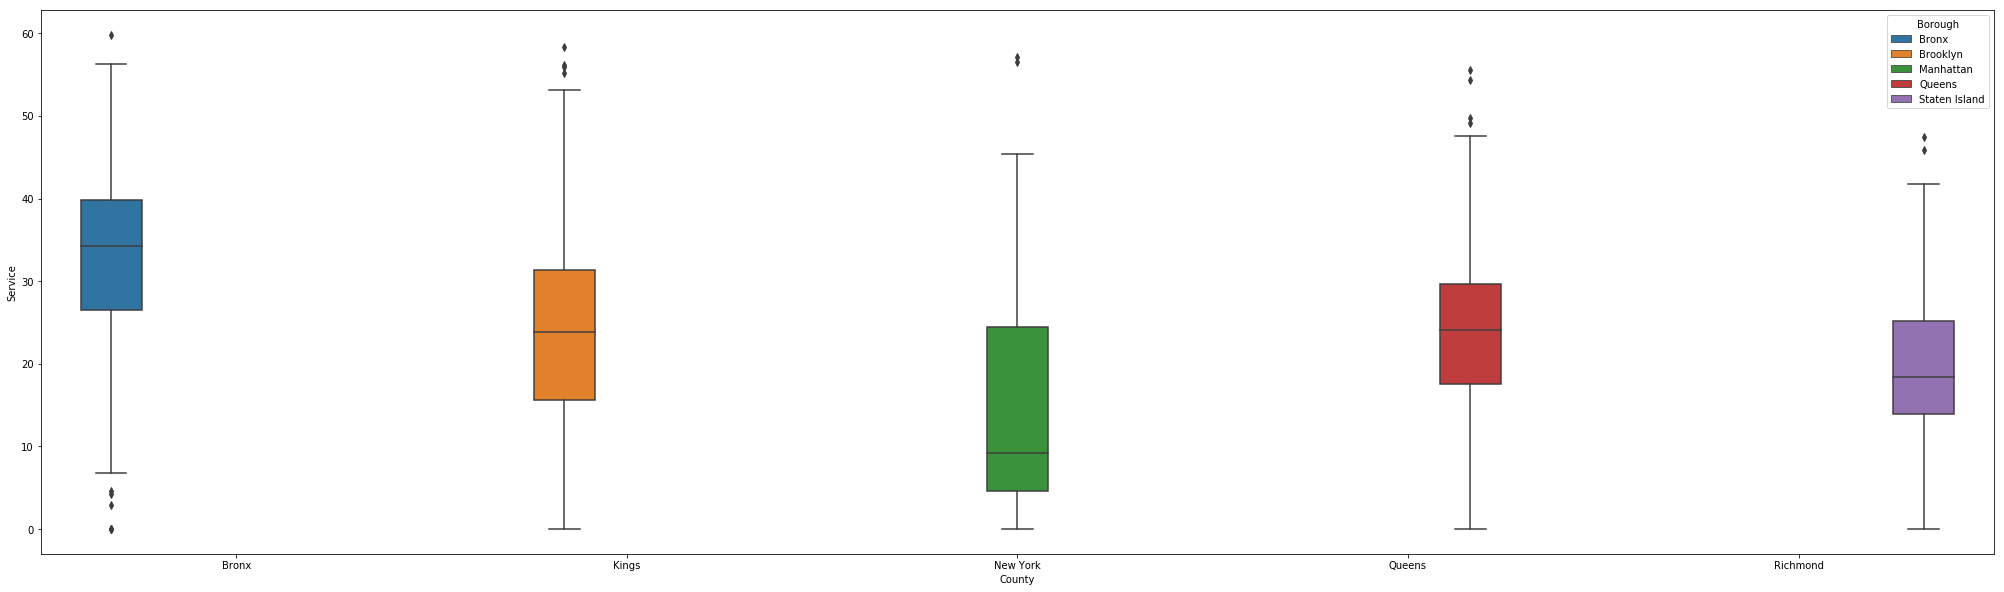

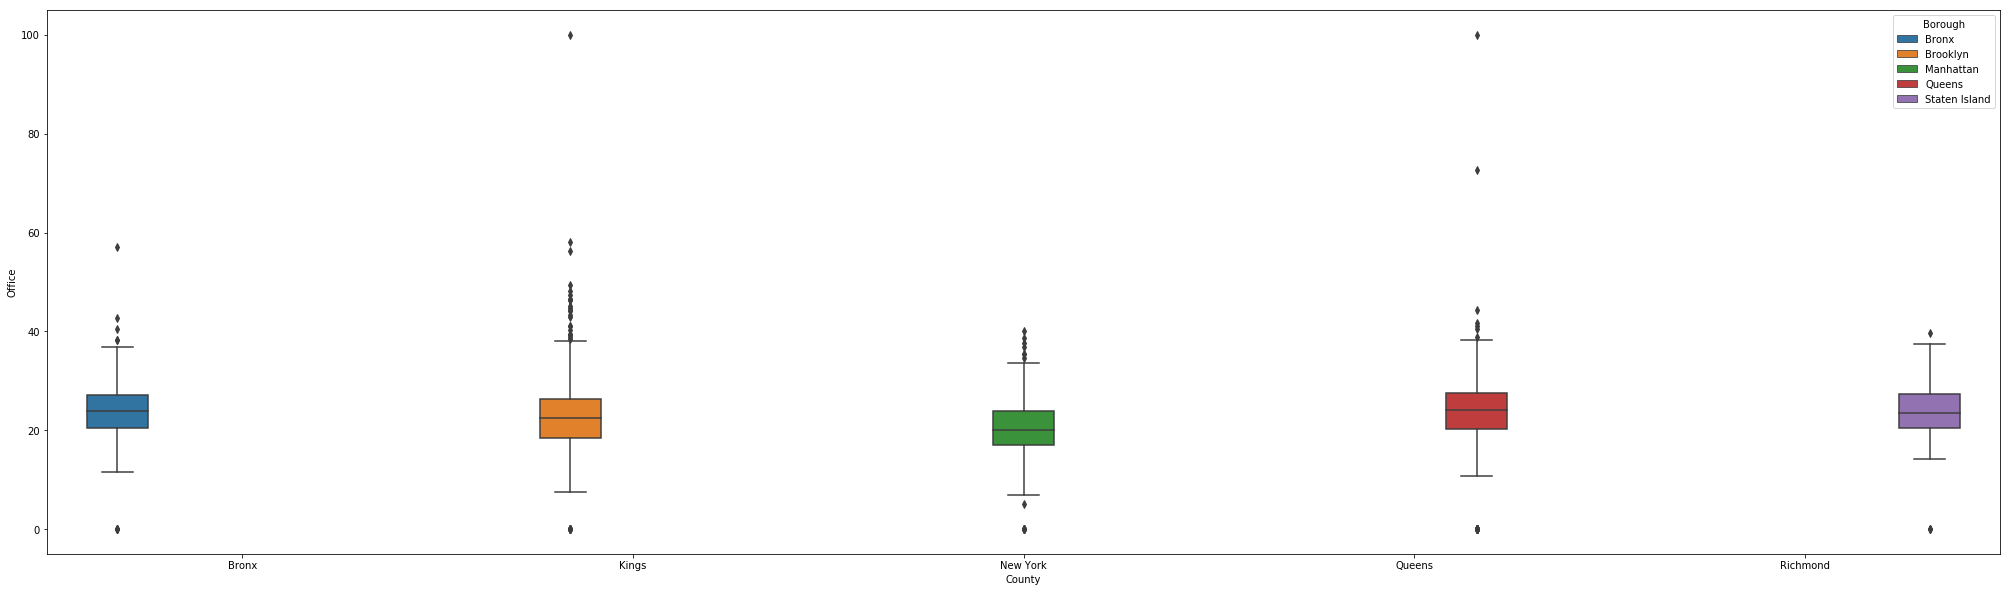

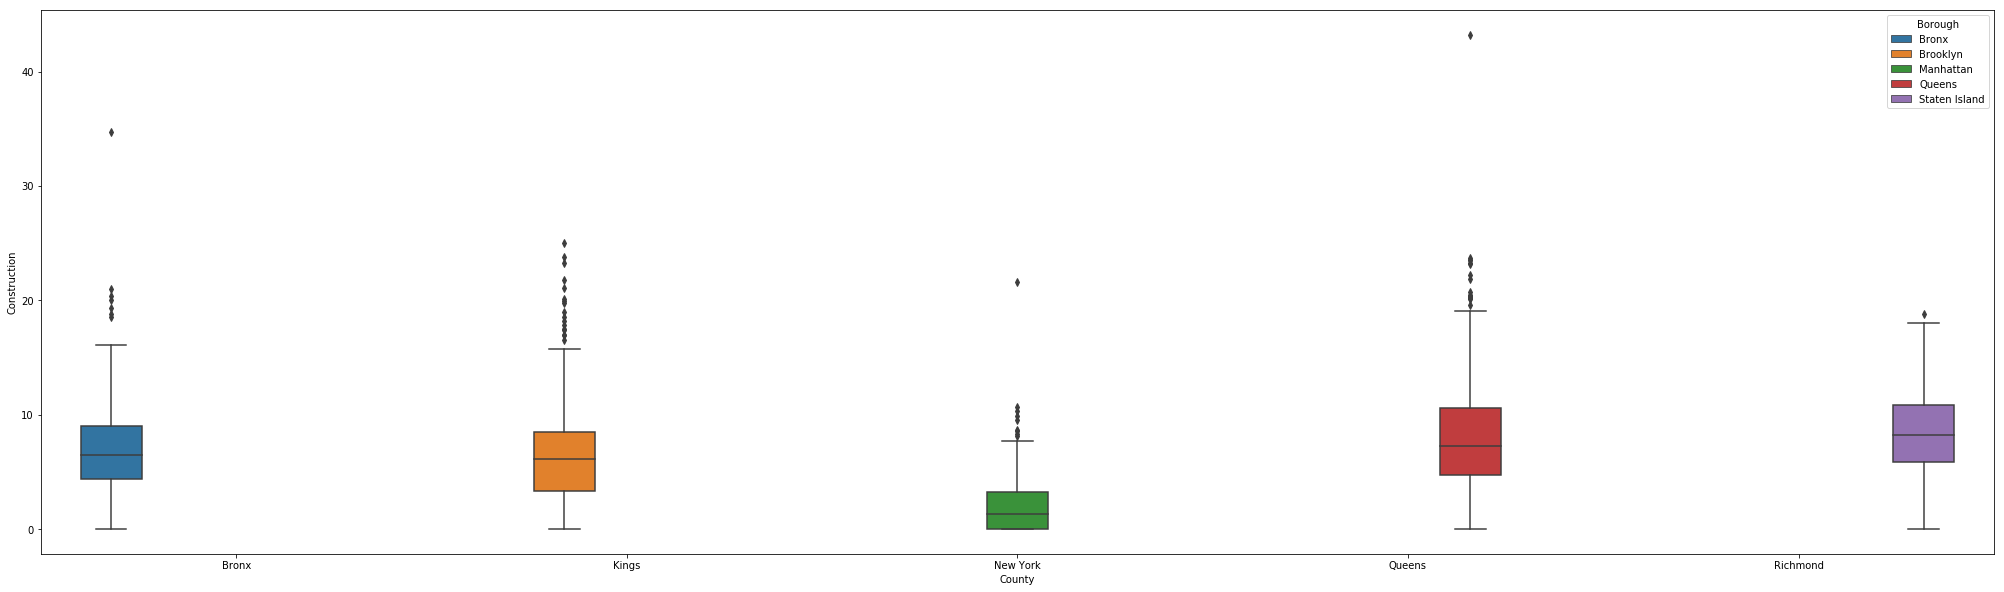

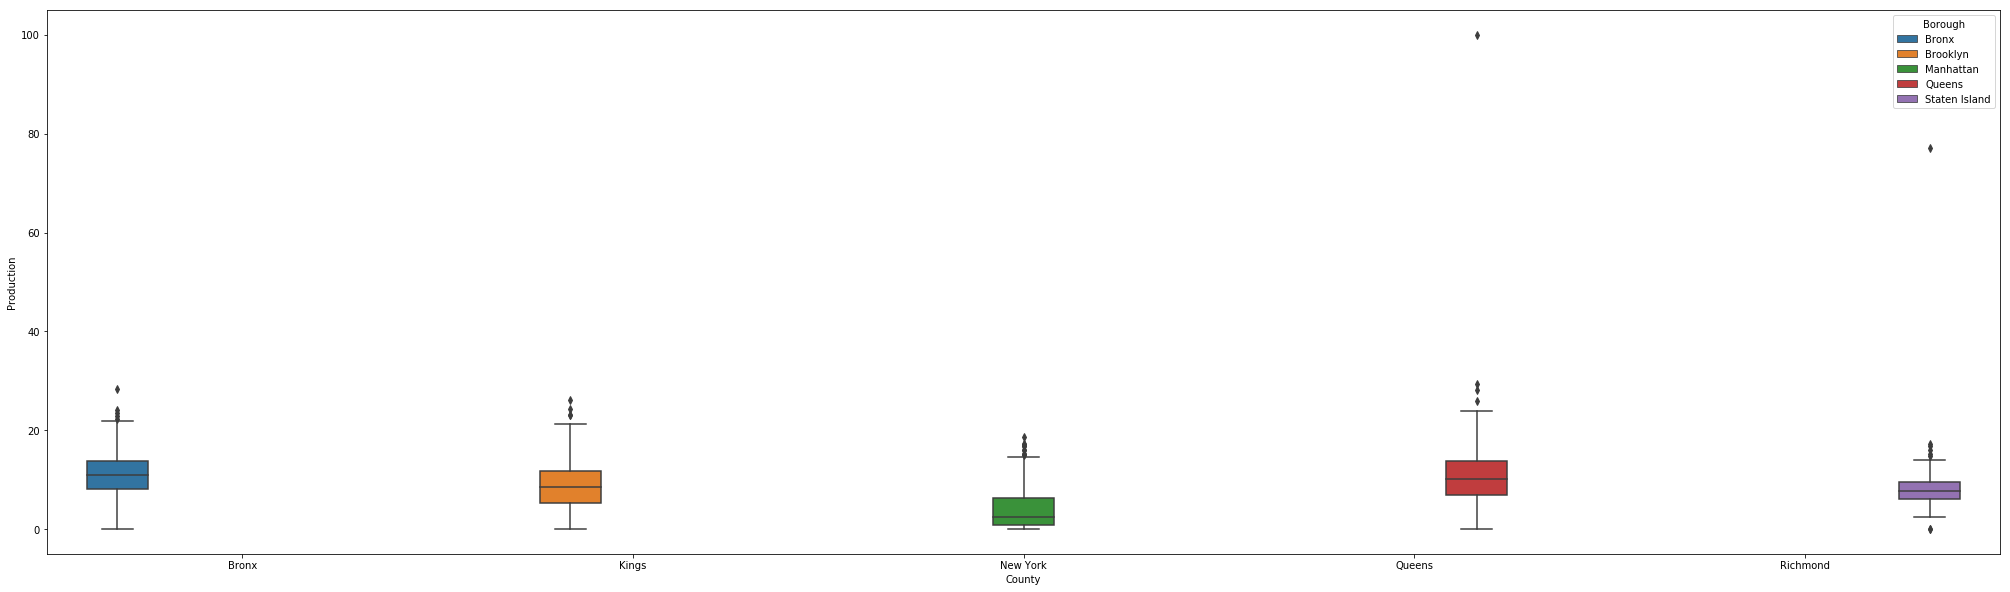

In [84]:
sns.boxplot(y="Professional",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Service",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Office",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Construction",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Production",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

observation: most number of people from professional are from manhattan,most of the people from service are from bronx,most number of people from office are evenly distributed,least number of the people from construction are from Manhattan,most number of people from Production are evenly distributed

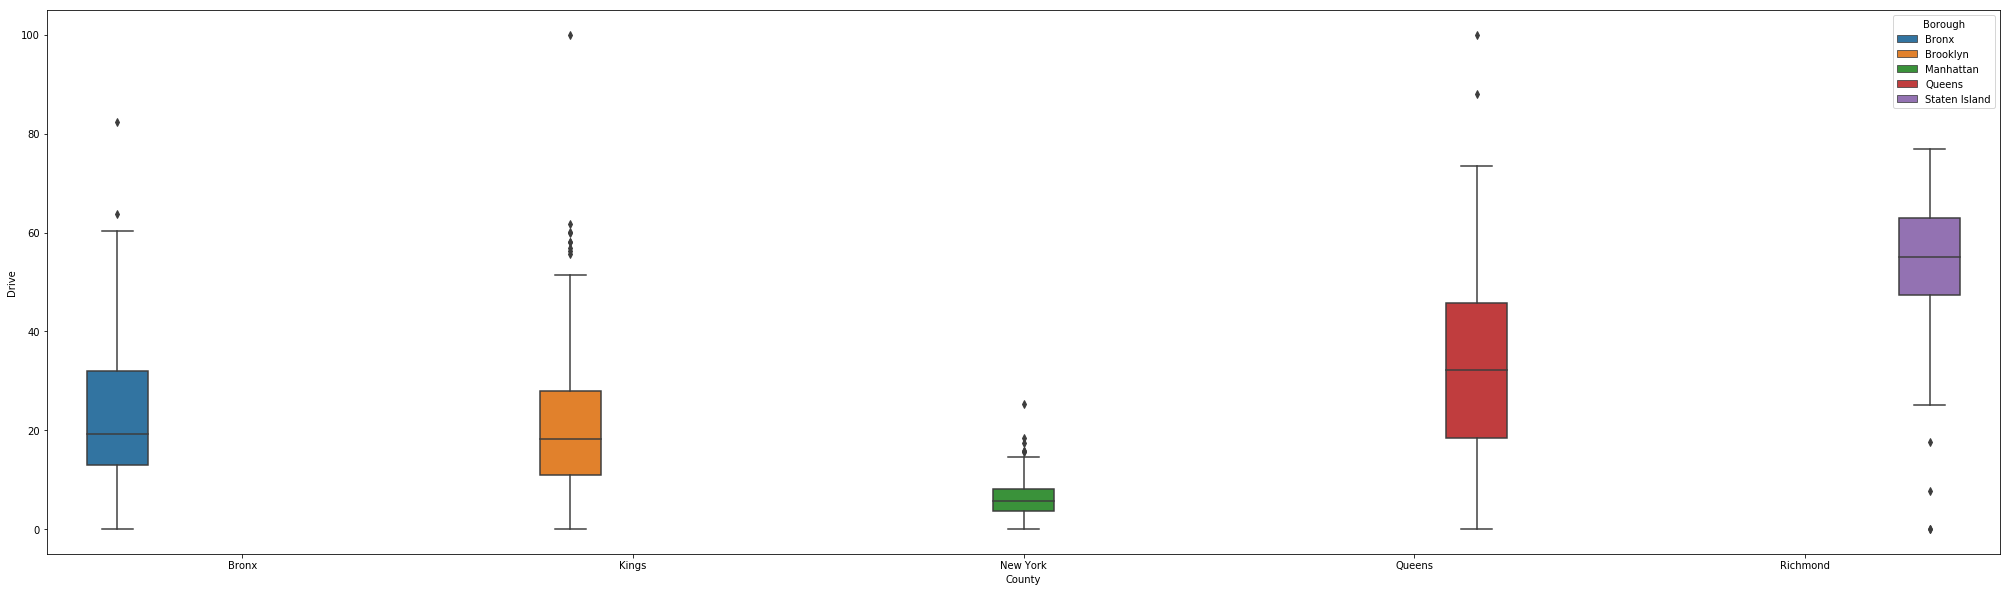

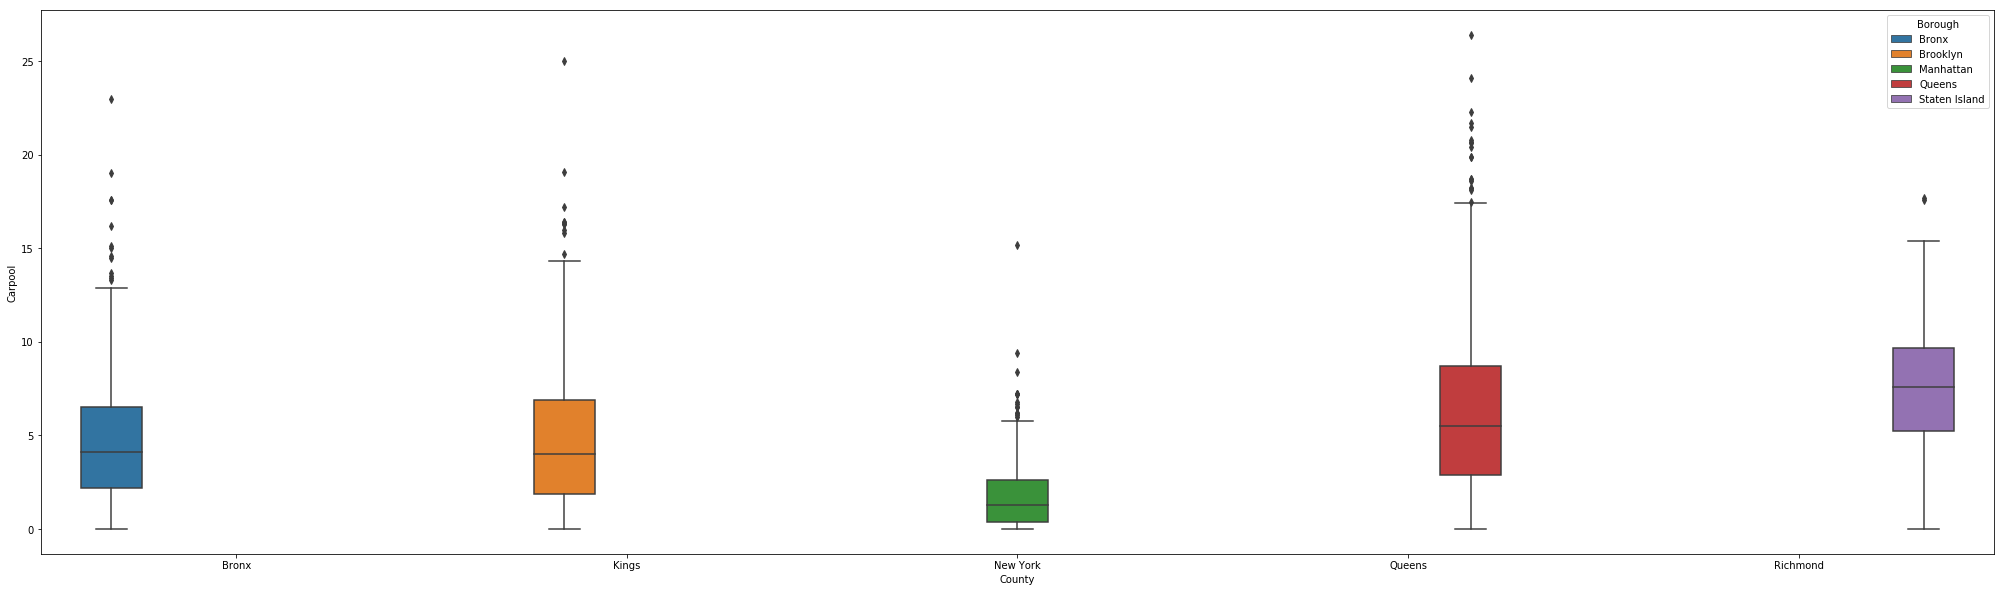

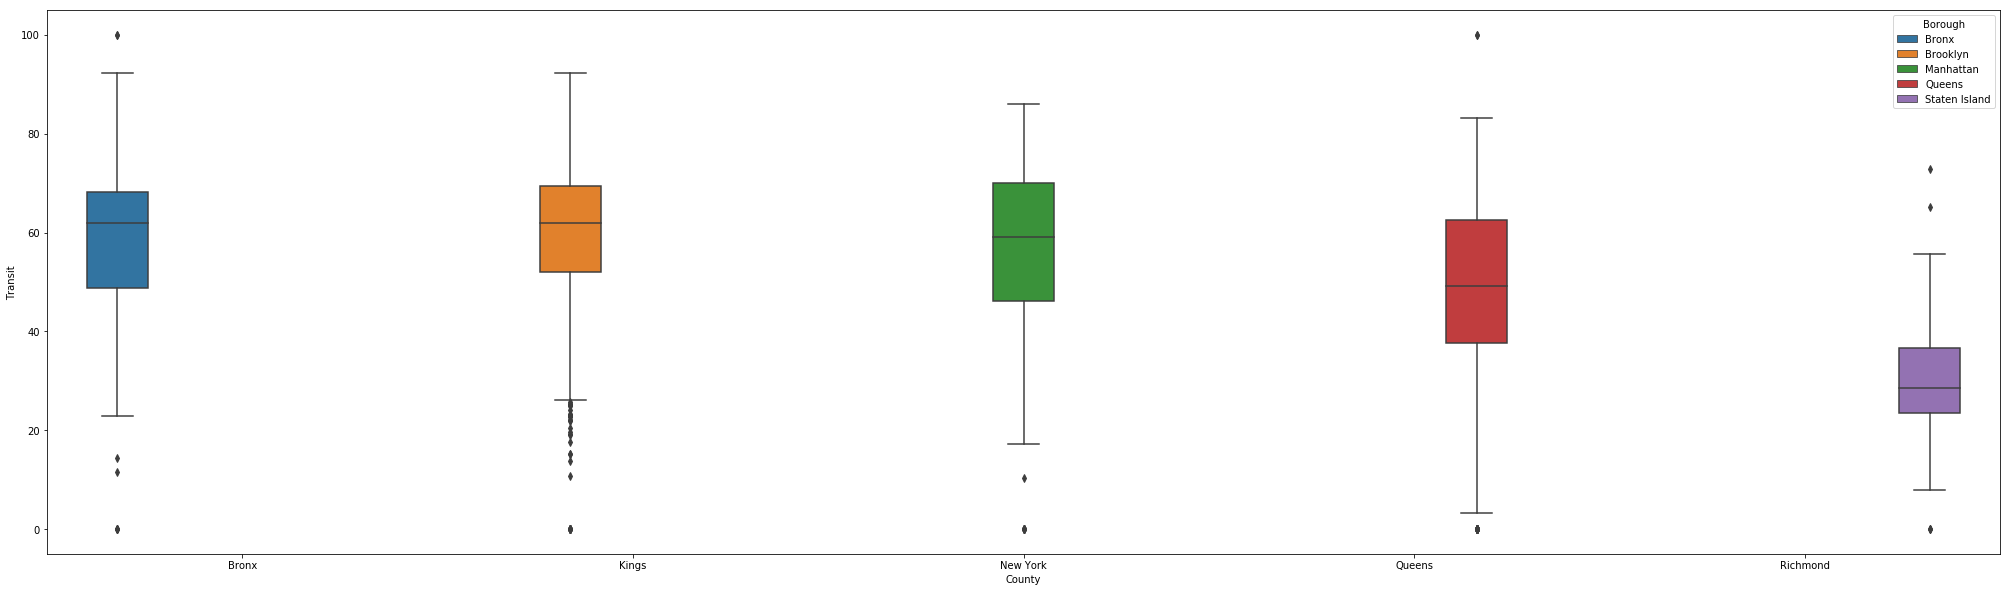

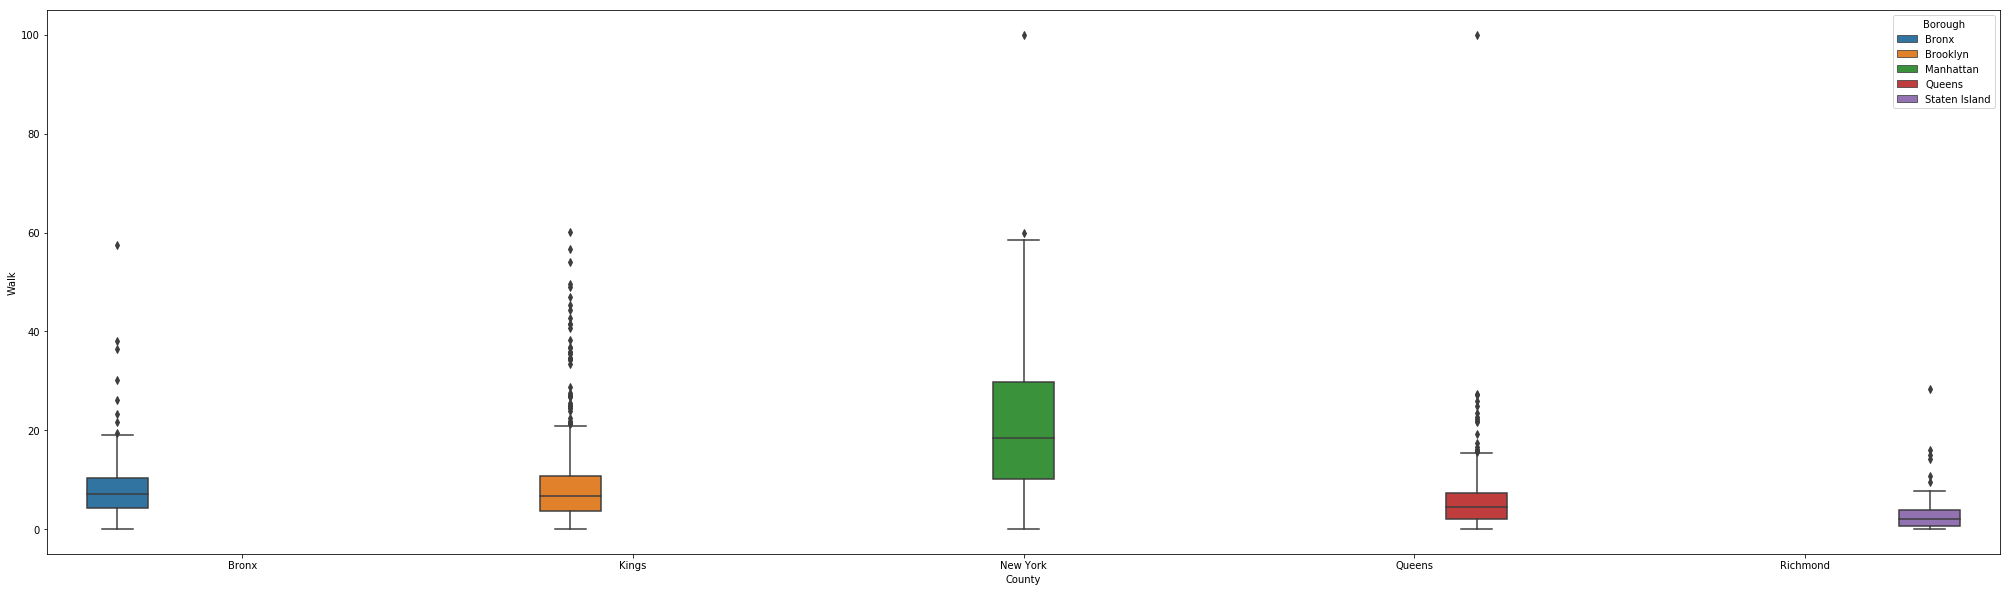

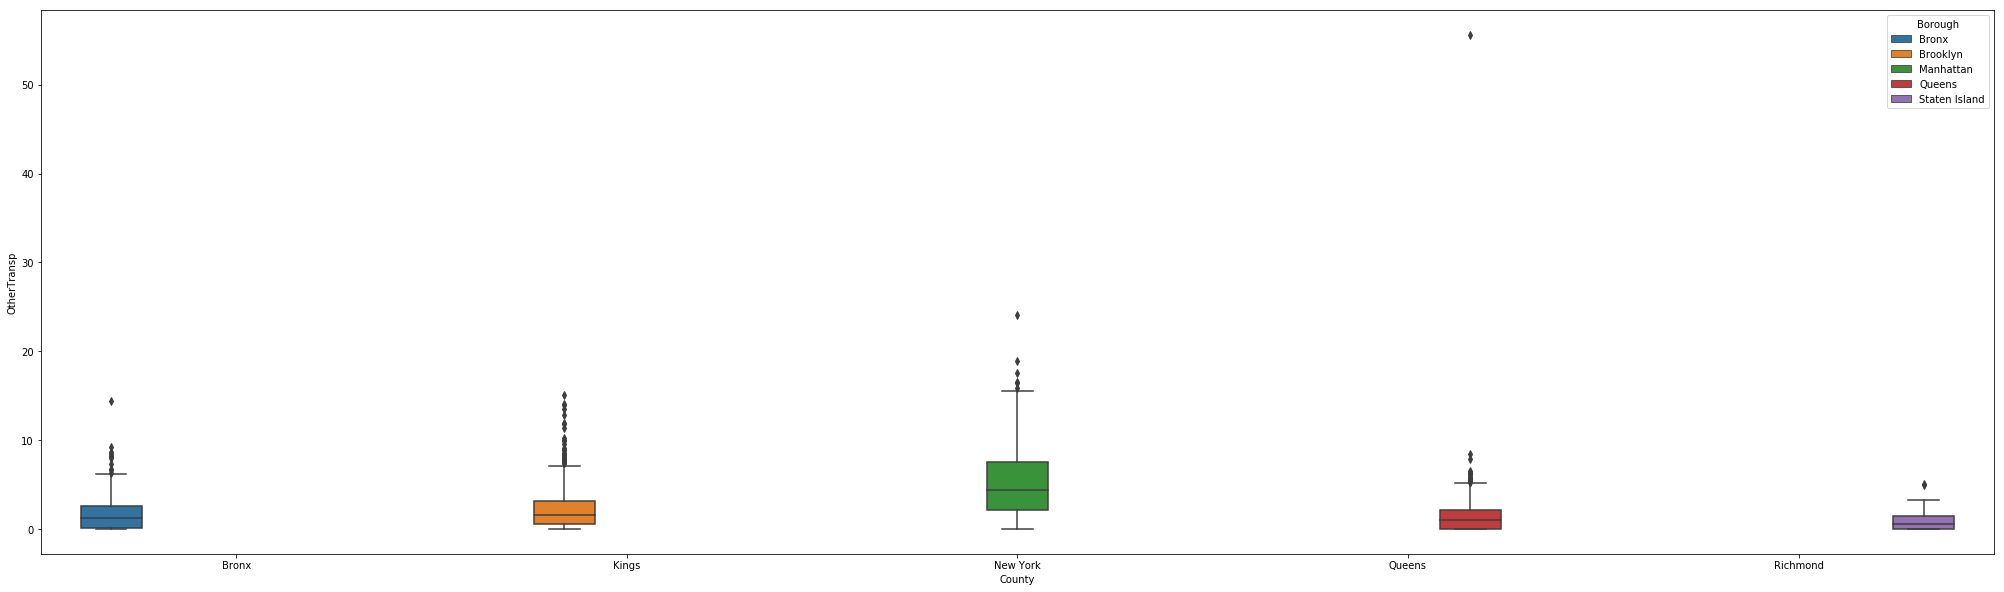

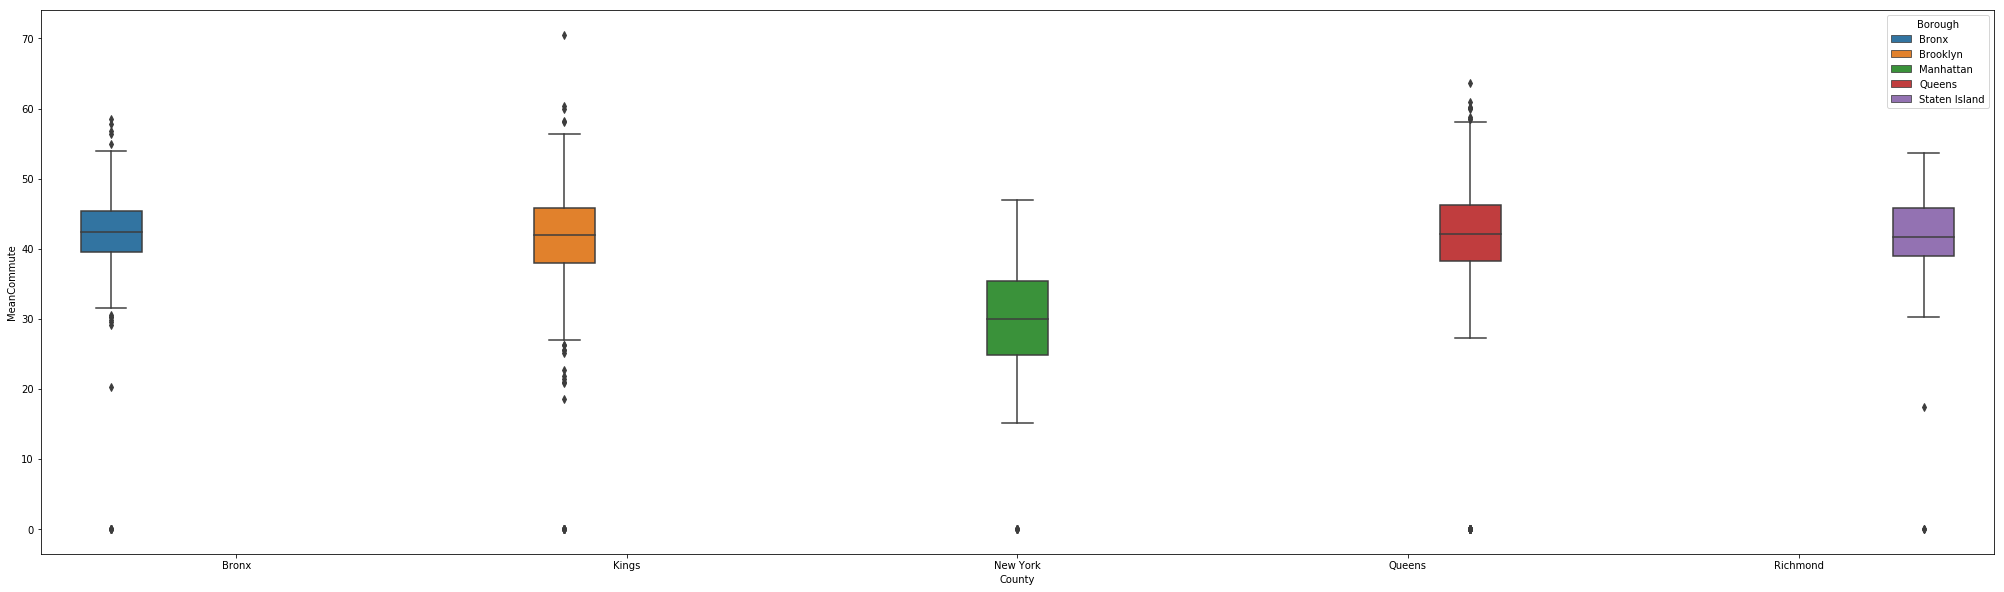

In [85]:
sns.boxplot(y="Drive",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Carpool",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Transit",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Walk",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="OtherTransp",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="MeanCommute",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

observation: most of the people in staten island drive,carpooling is more used in queens and staten island,people in staten island uses least amount of transit,people in manhattan walk the most,very few people use other transit,on average people take 45mins to commute except people living in manhattan who take on average about 30 mins to commute

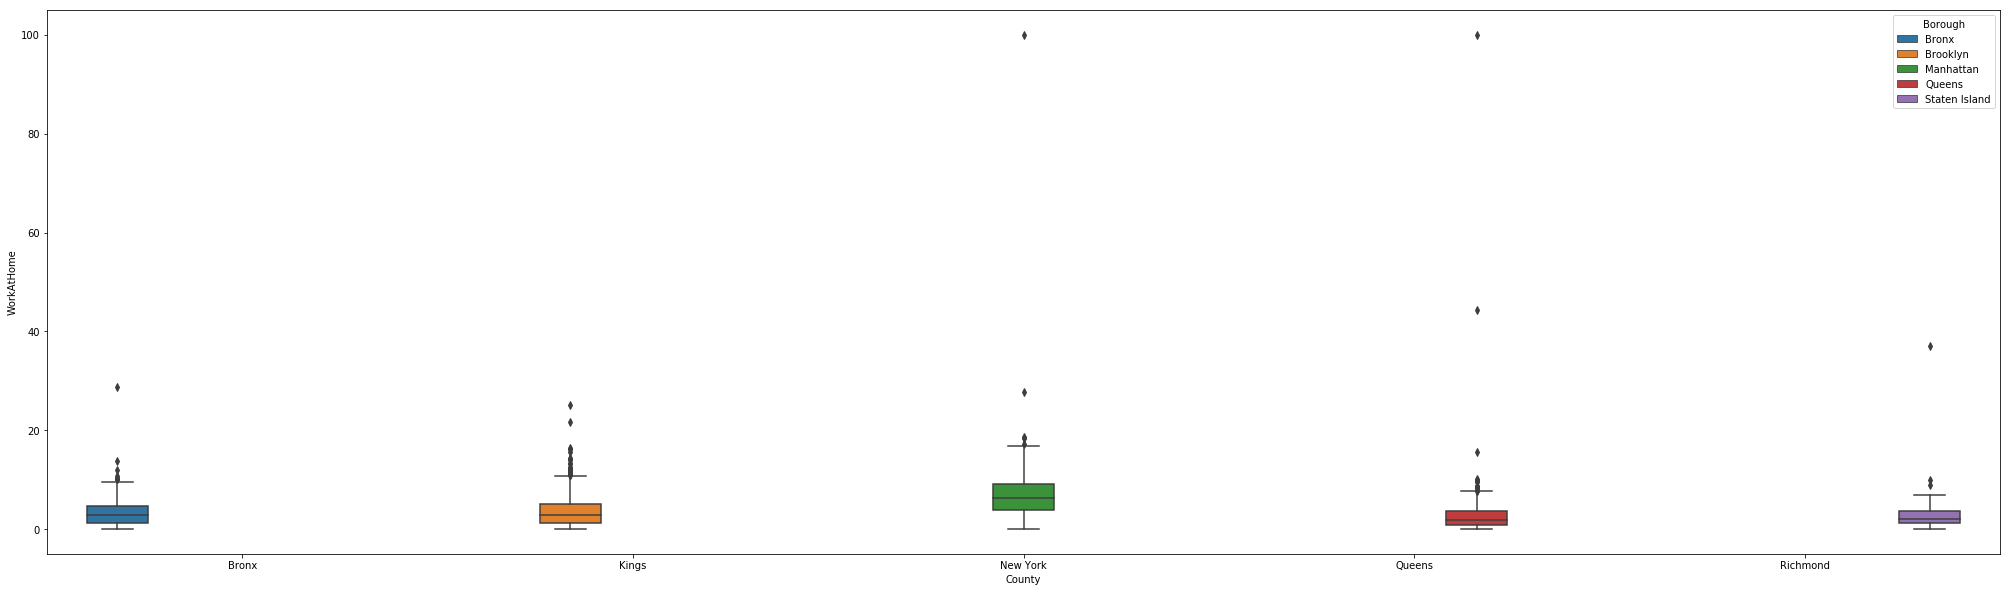

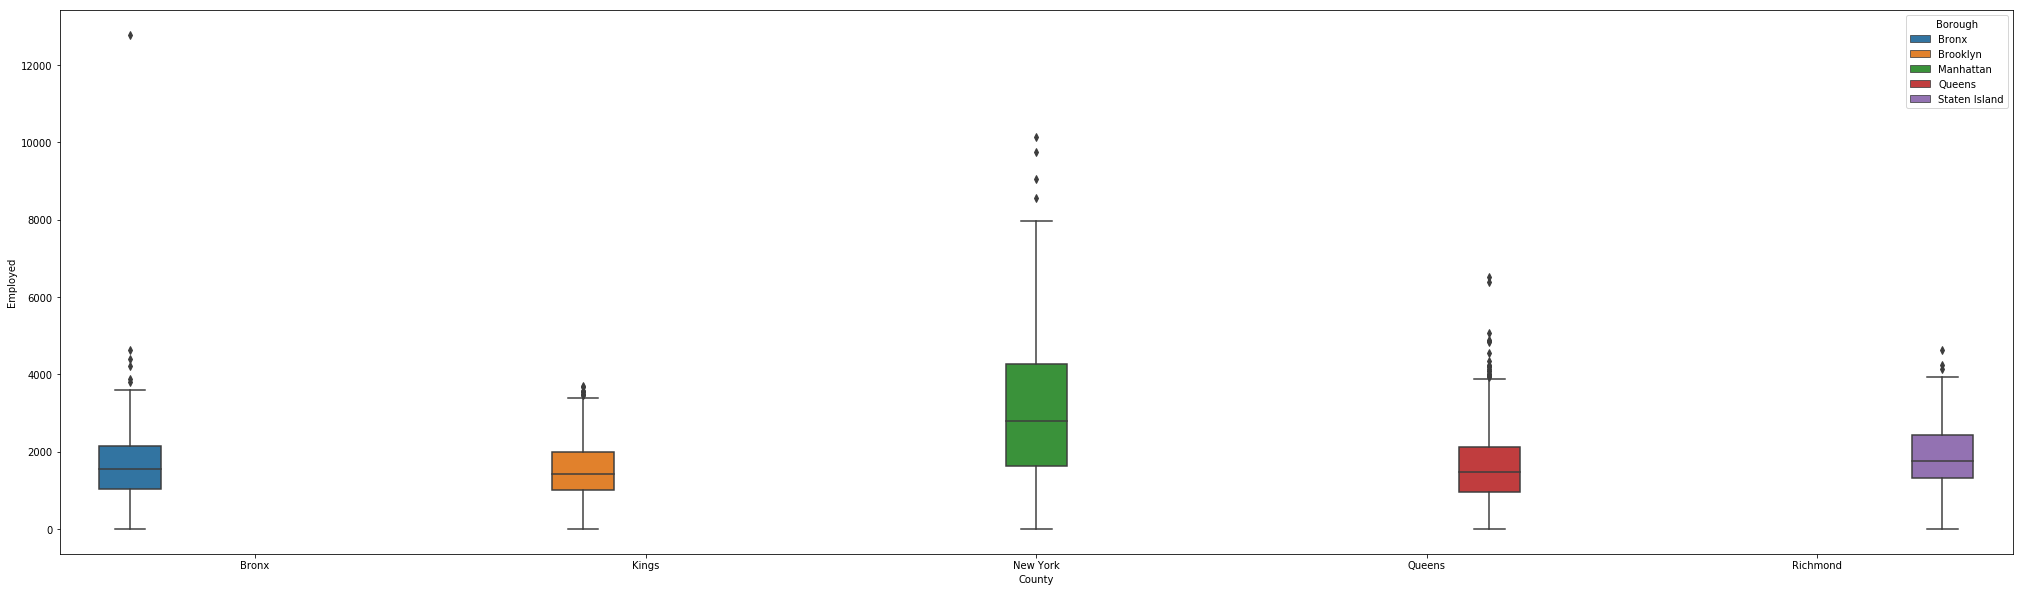

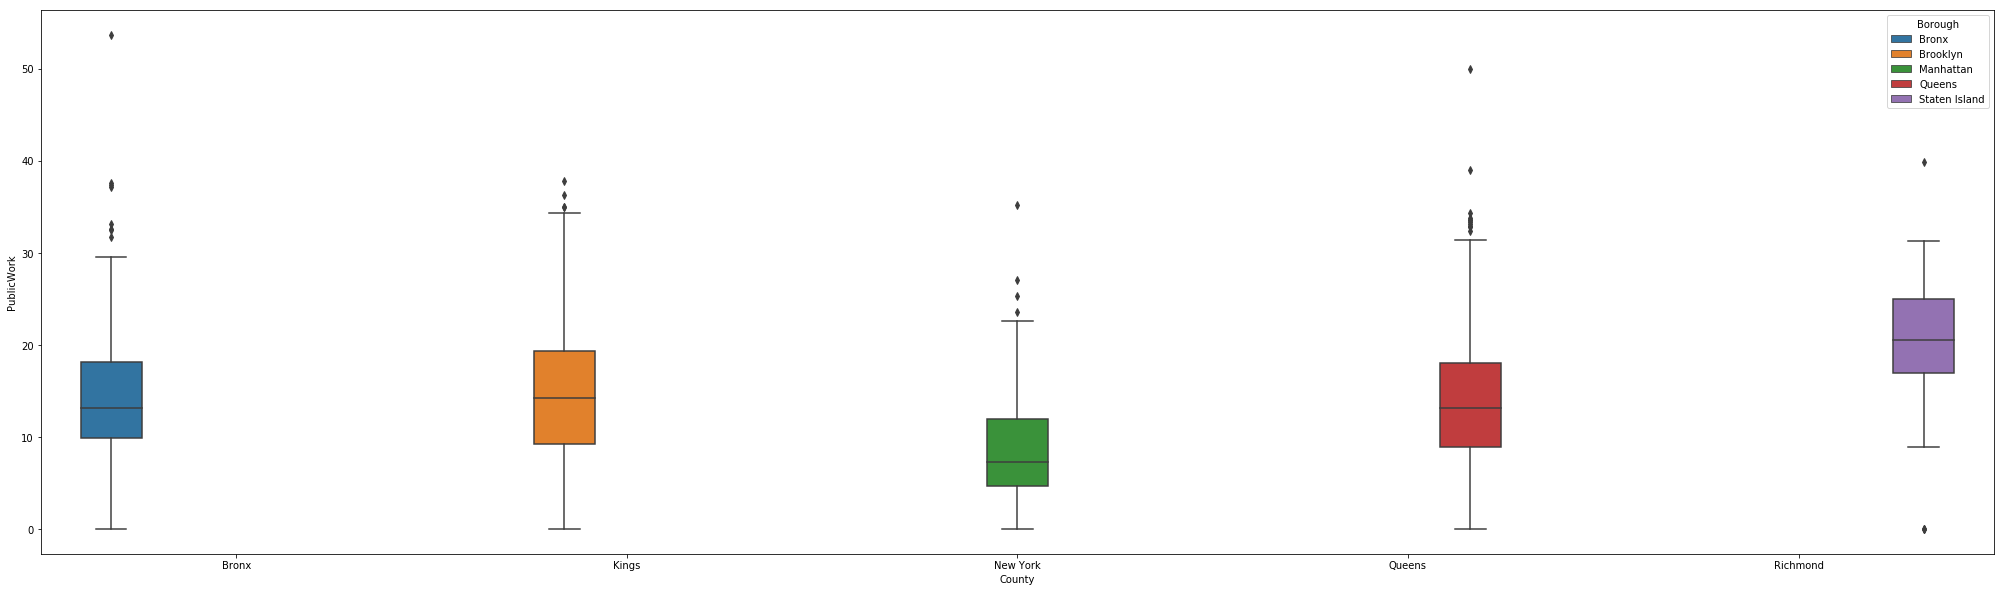

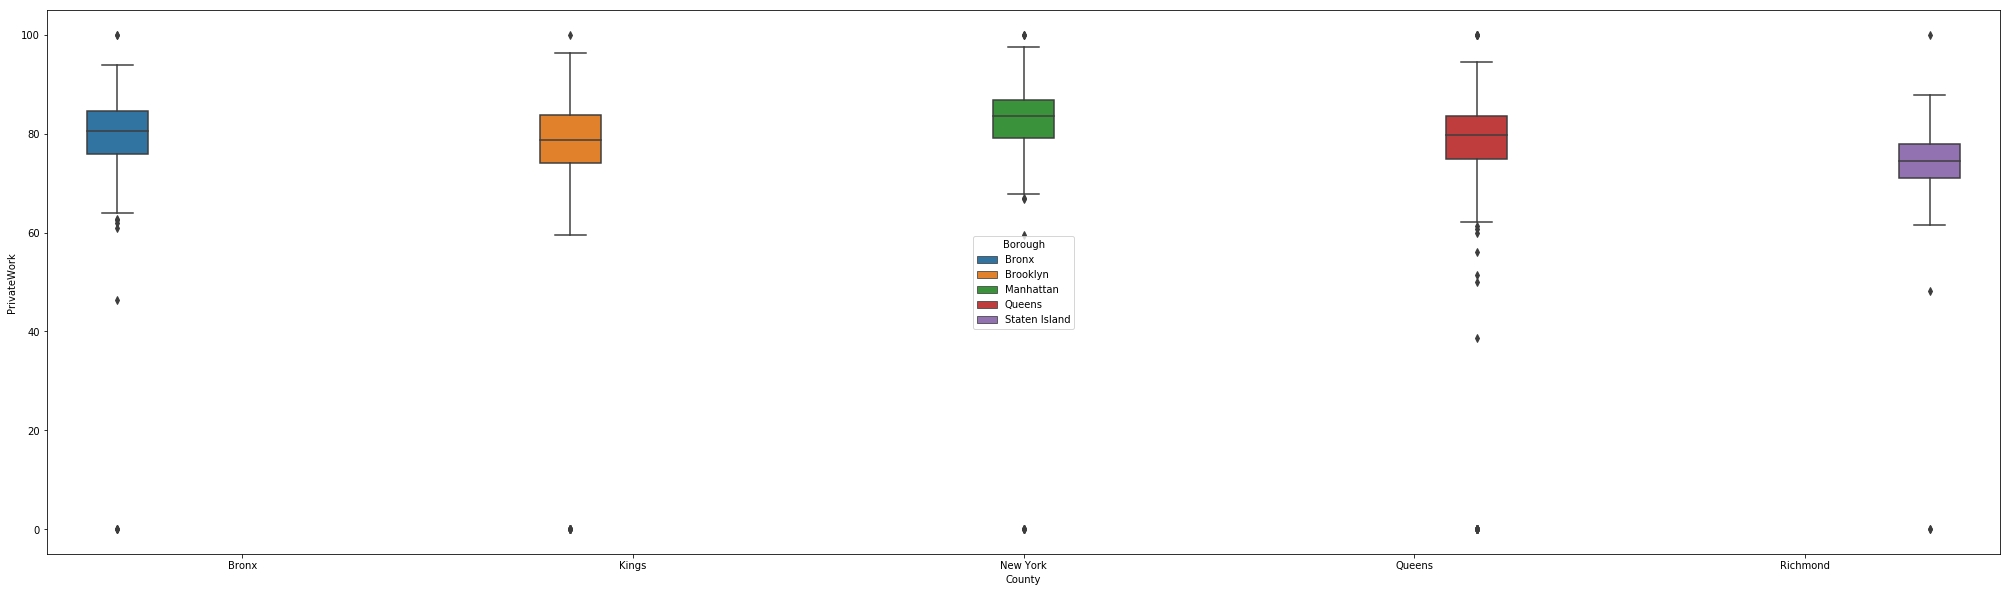

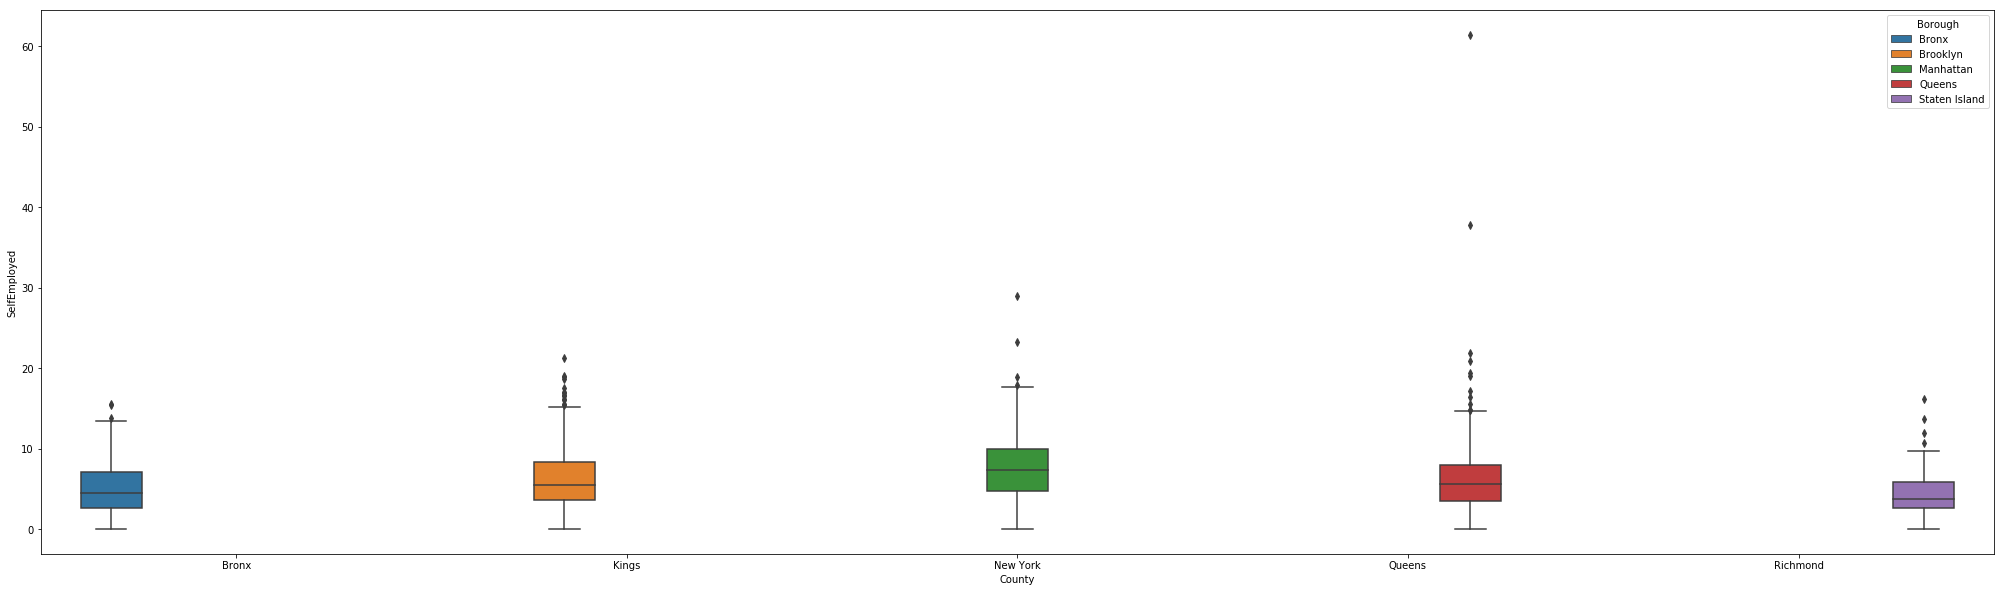

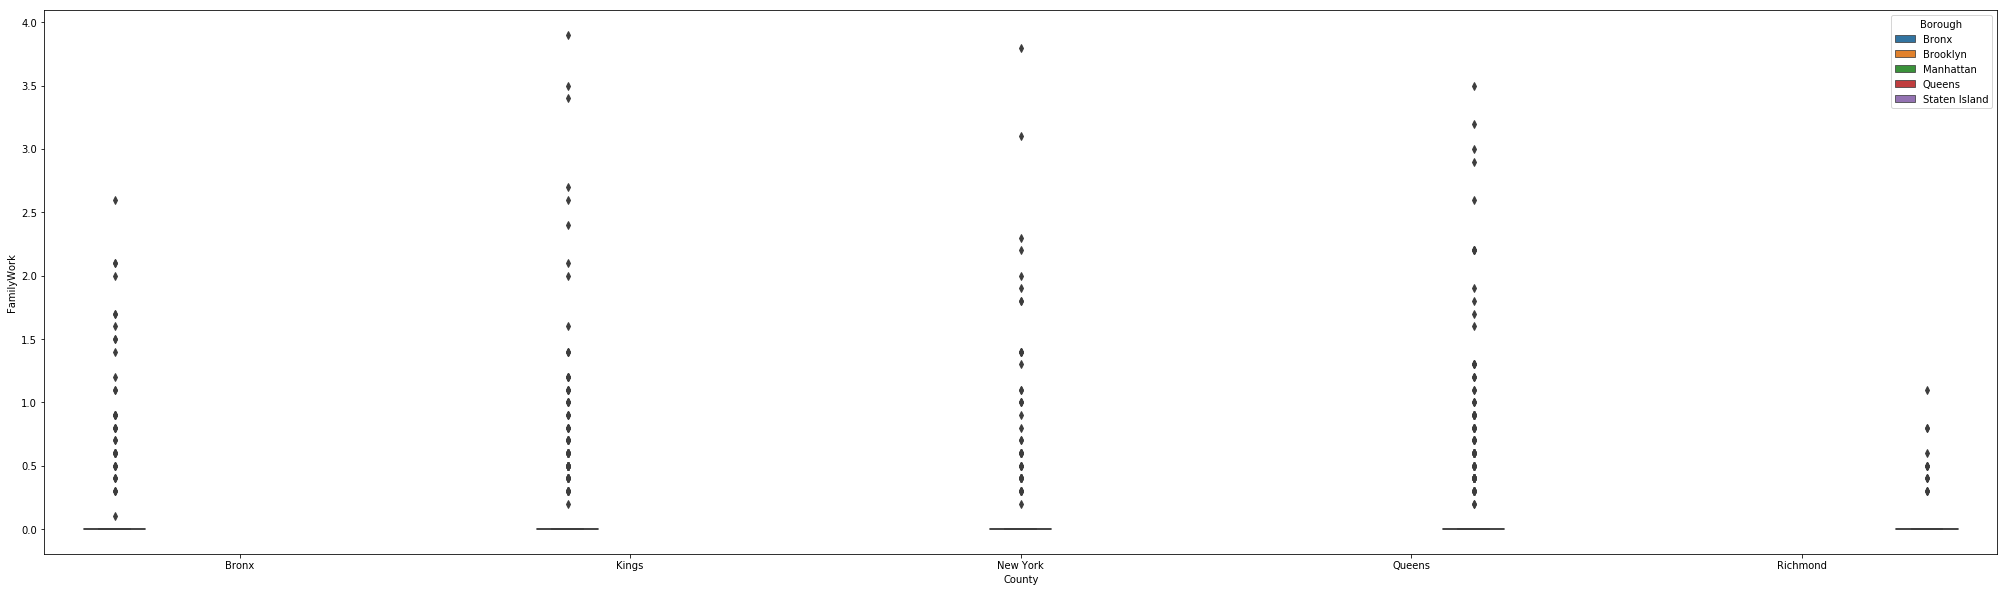

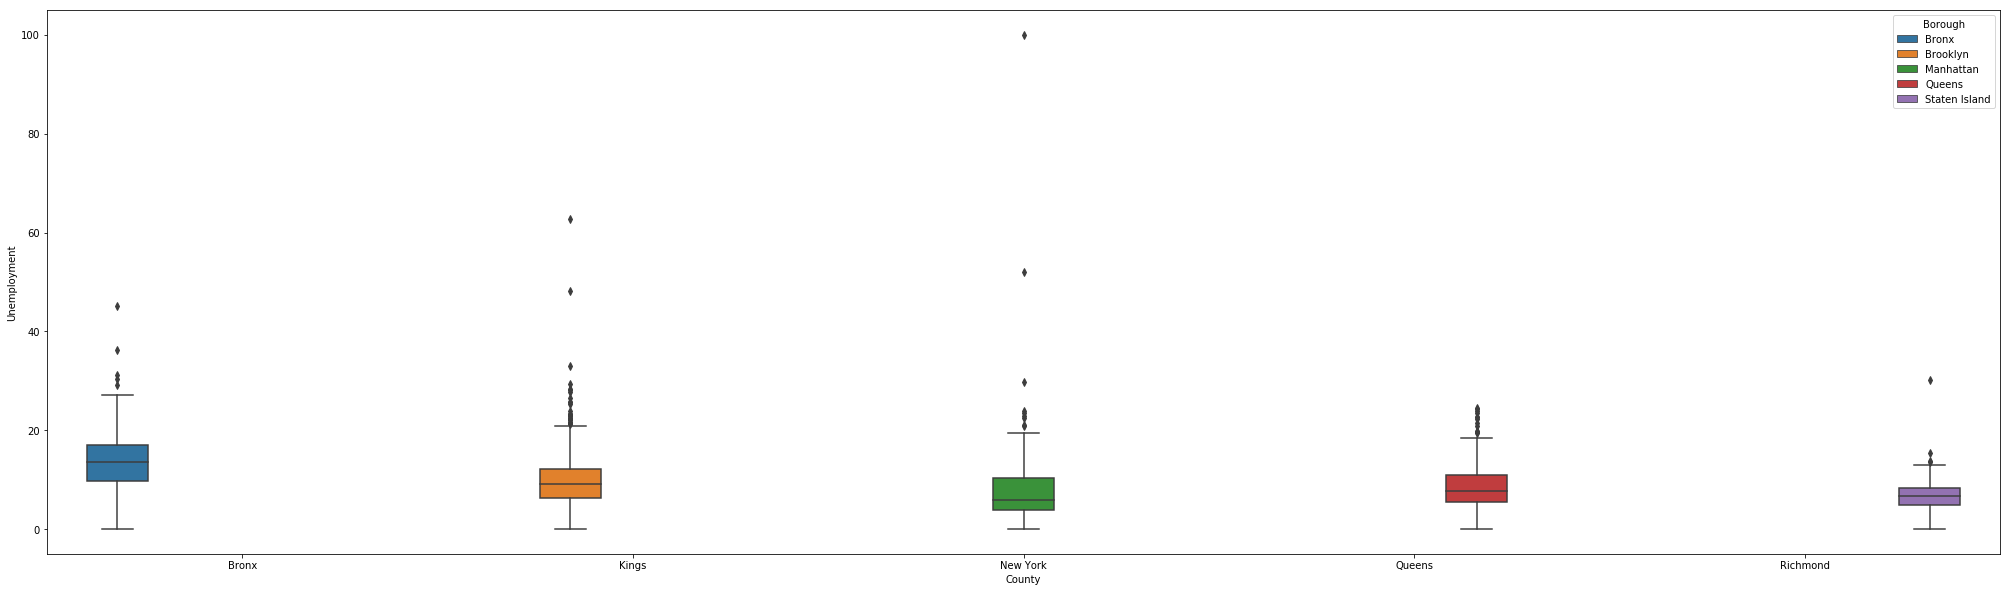

In [87]:
sns.boxplot(y="WorkAtHome",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Employed",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="PublicWork",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="PrivateWork",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="SelfEmployed",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="FamilyWork",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

sns.boxplot(y="Unemployment",x="County", hue="Borough" ,data= census1, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

observation: most people from manhattan are employed,most people from staten island are in public work,most of the people everywhere in newyork are from private sector, few people are self employed,and very few people are in family work,there is overall very less people with unemployement in newyork

Boxplot:

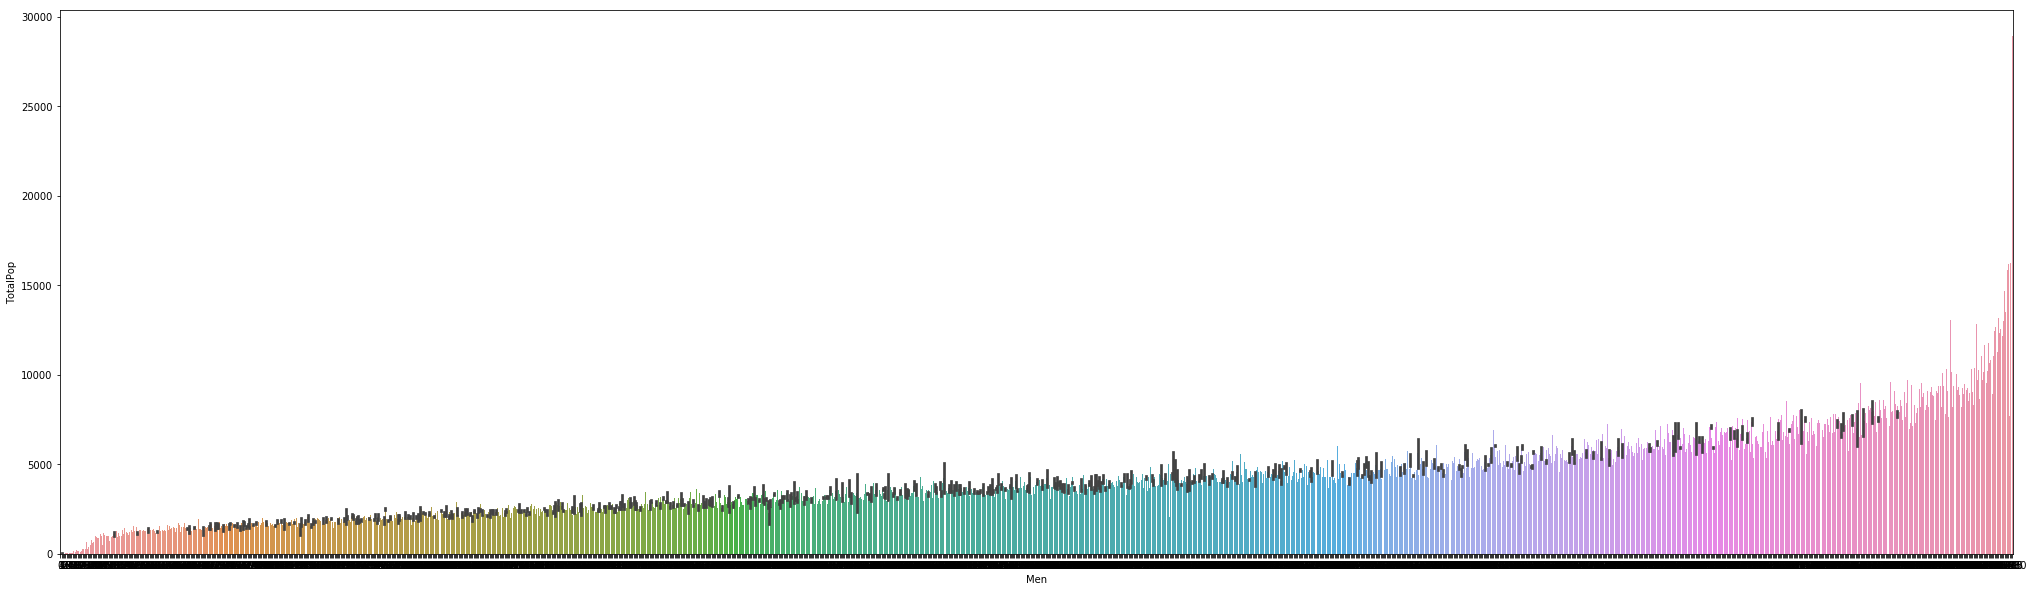

In [74]:
sns.barplot(y="TotalPop",x="Men", data=census1)
plt.show()
plt.figure(figsize=(35,10))

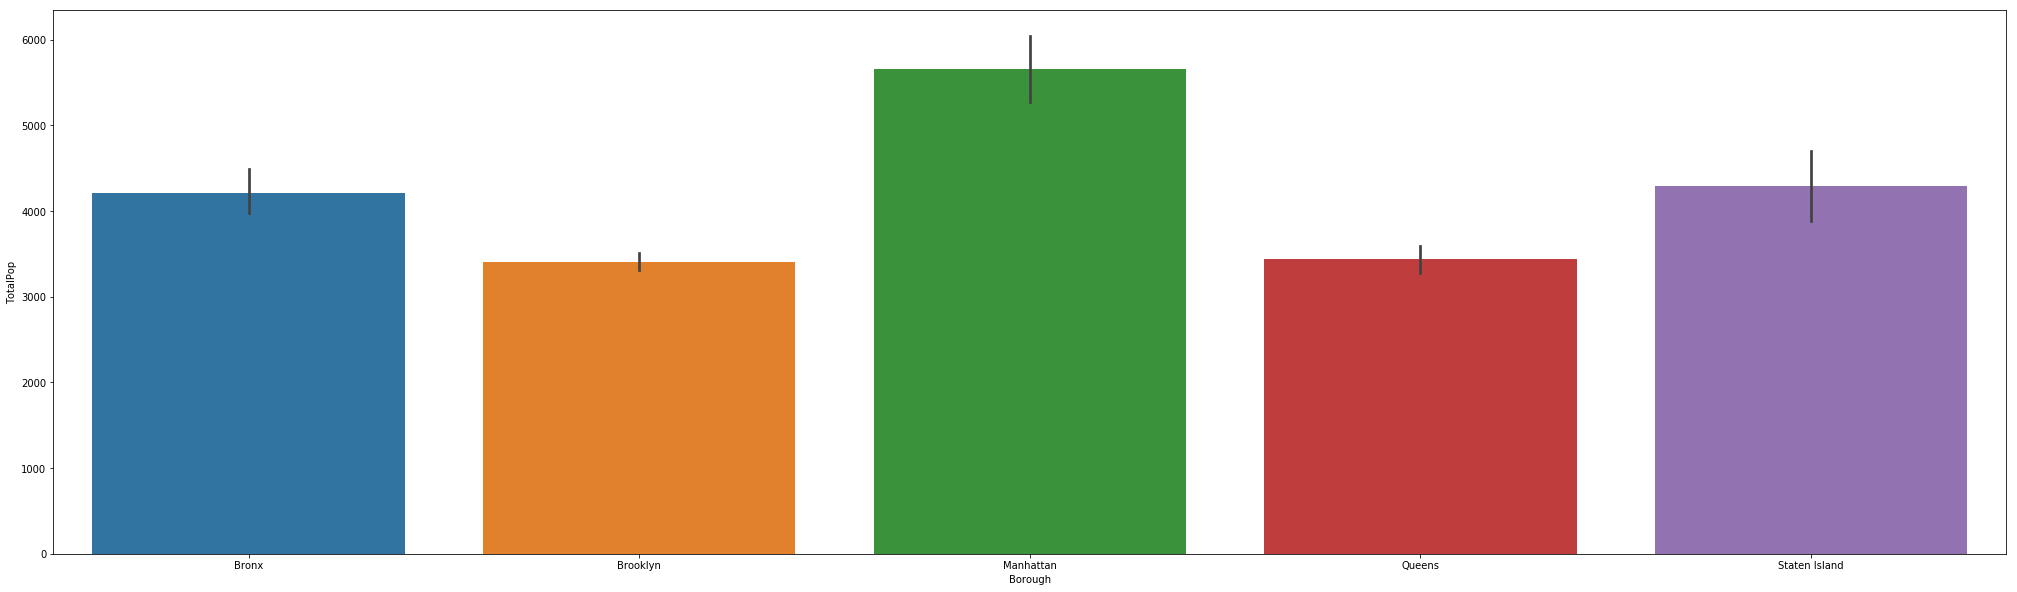

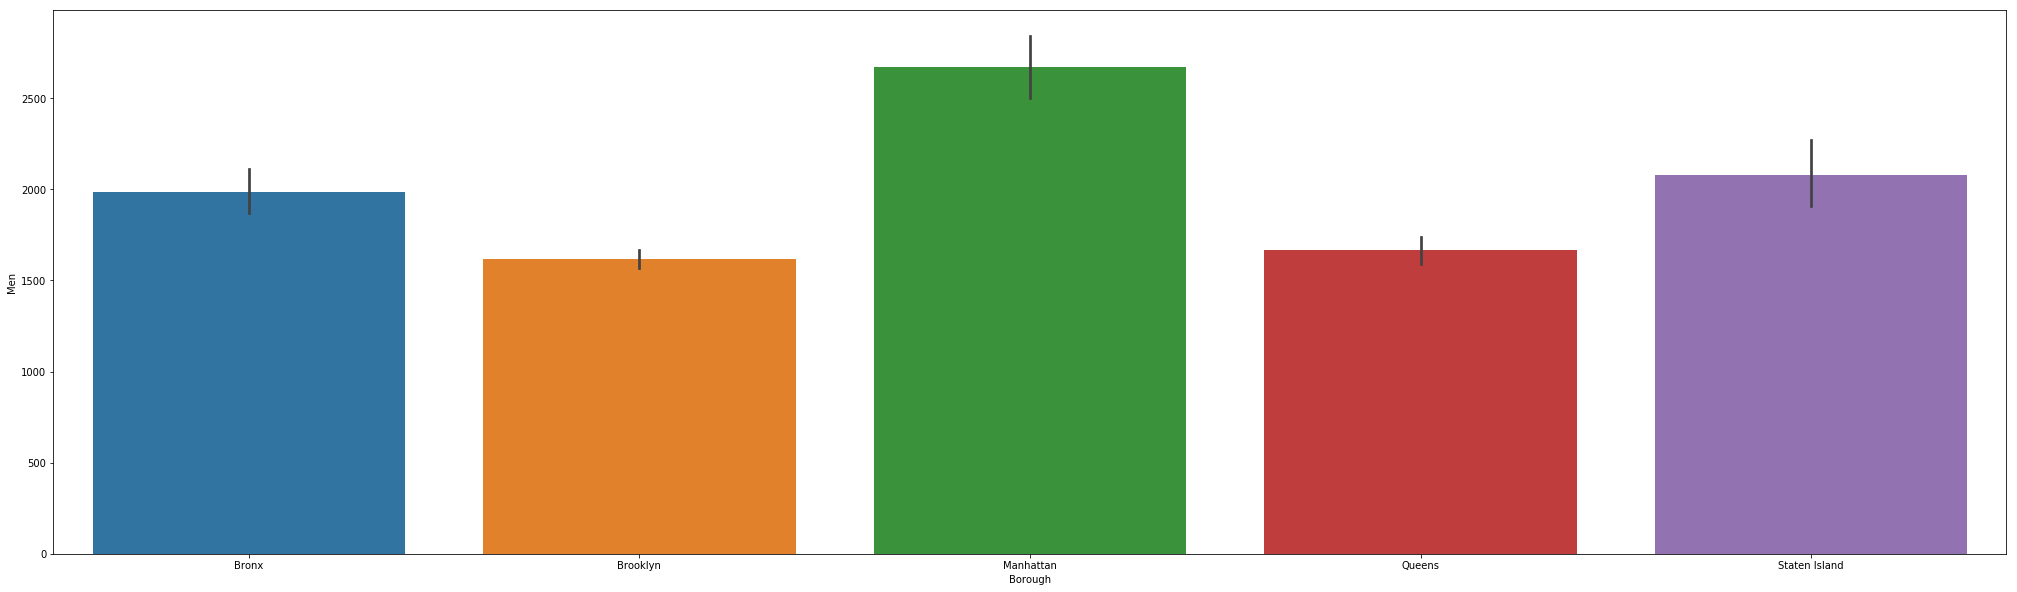

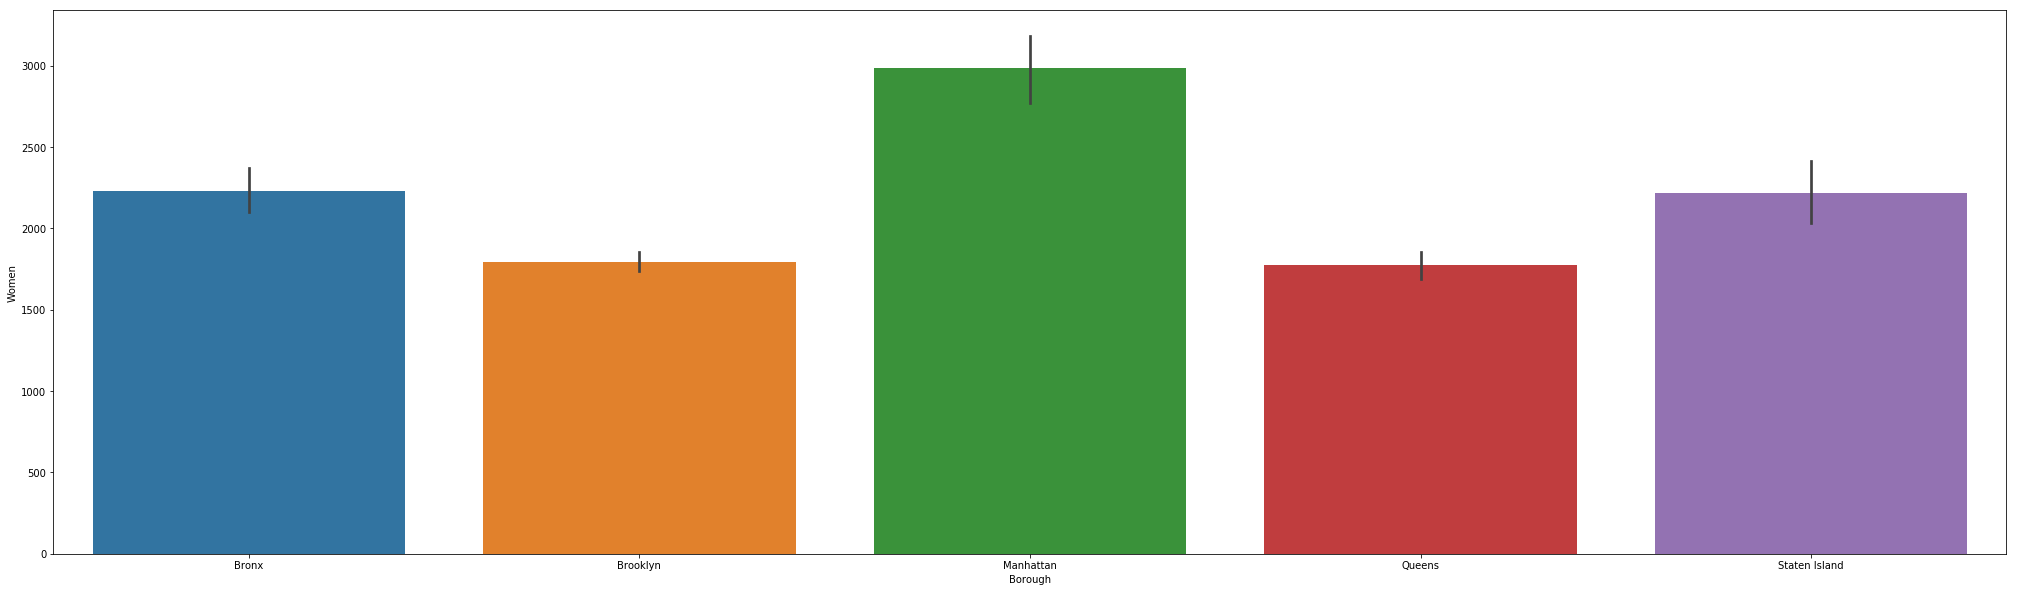

In [88]:
sns.barplot(y="TotalPop",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Men",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Women",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

observation: population is most in Manhattan followed by bronx and staten island

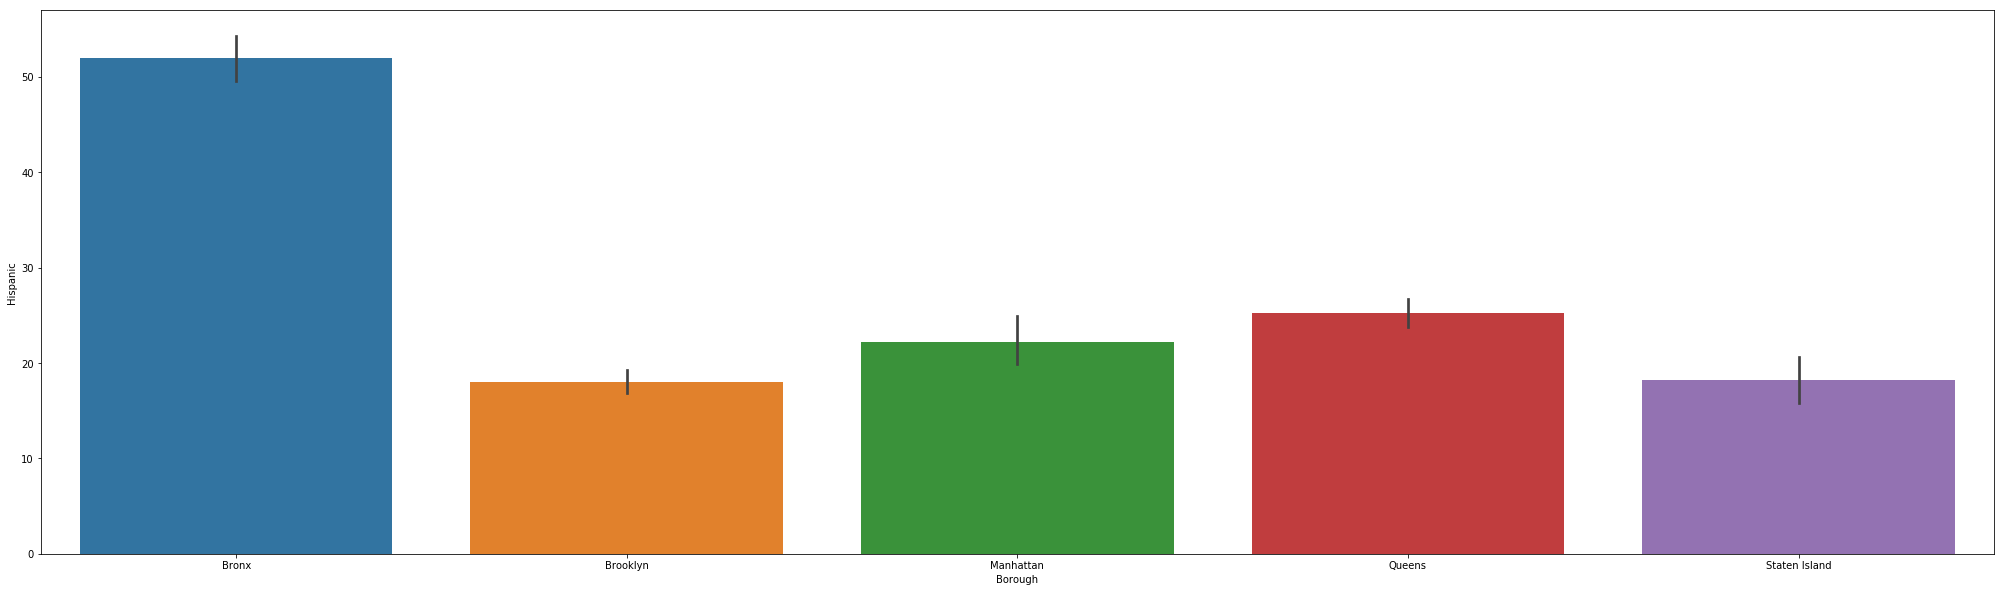

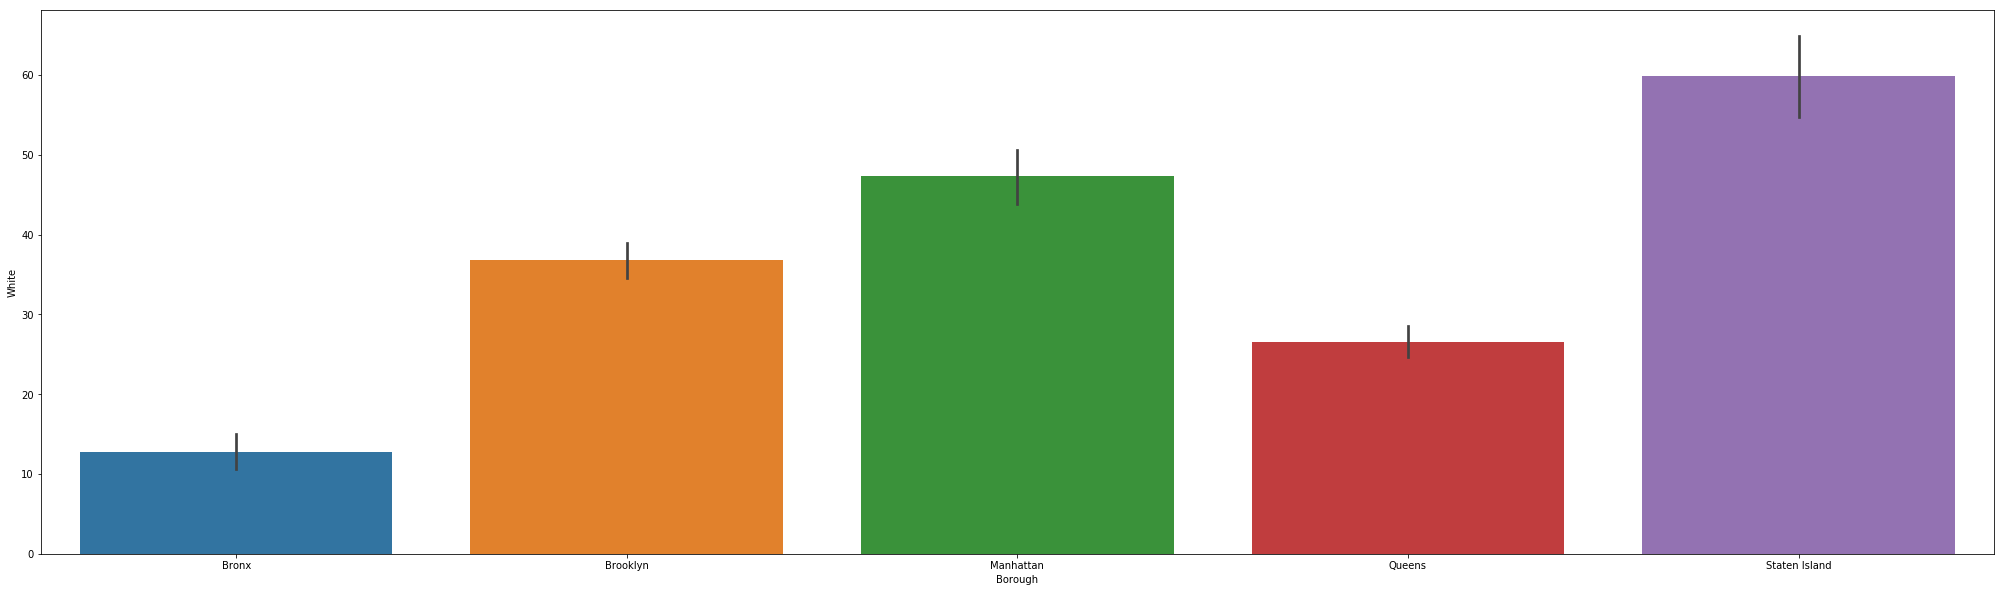

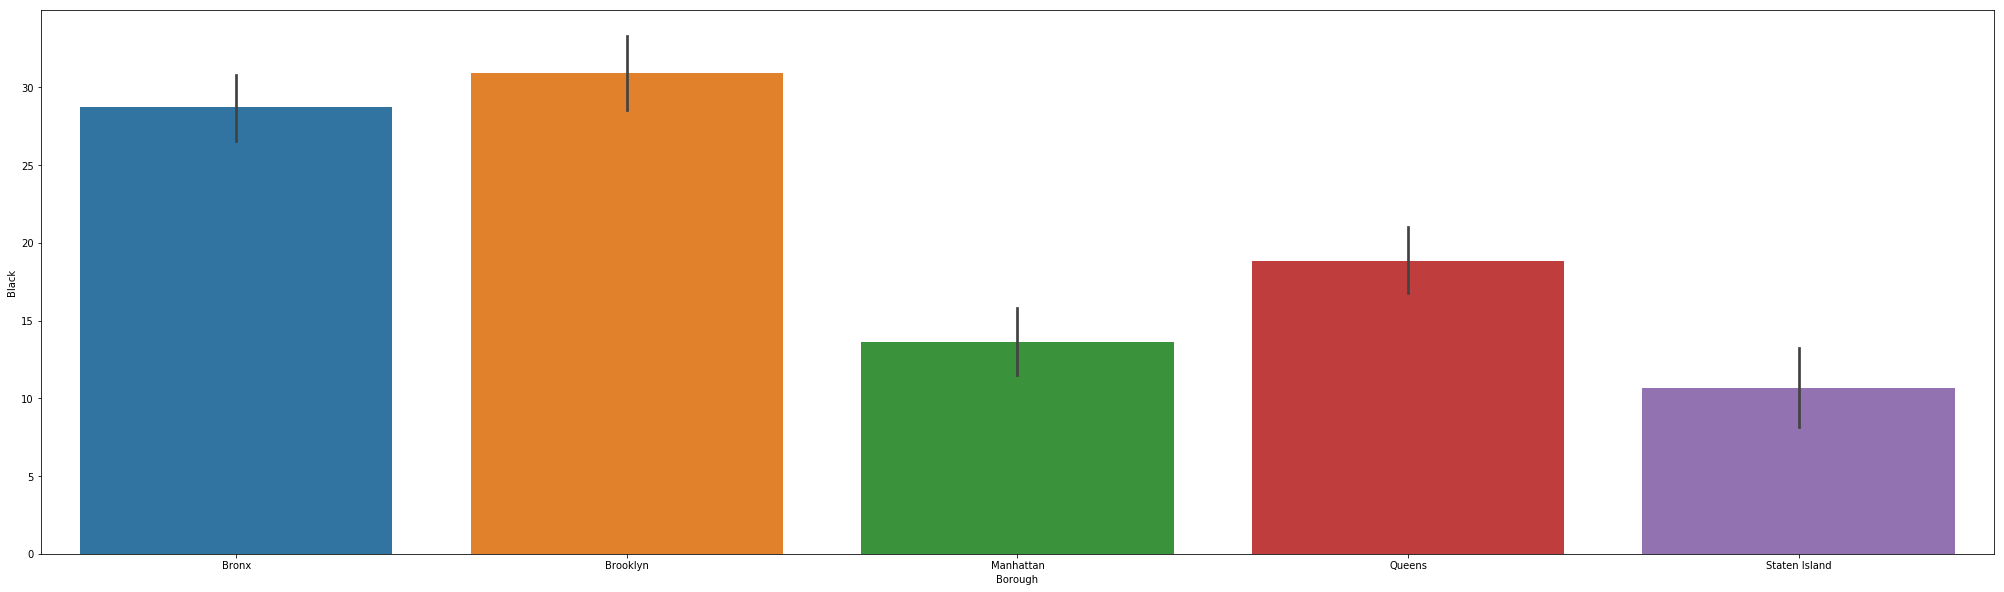

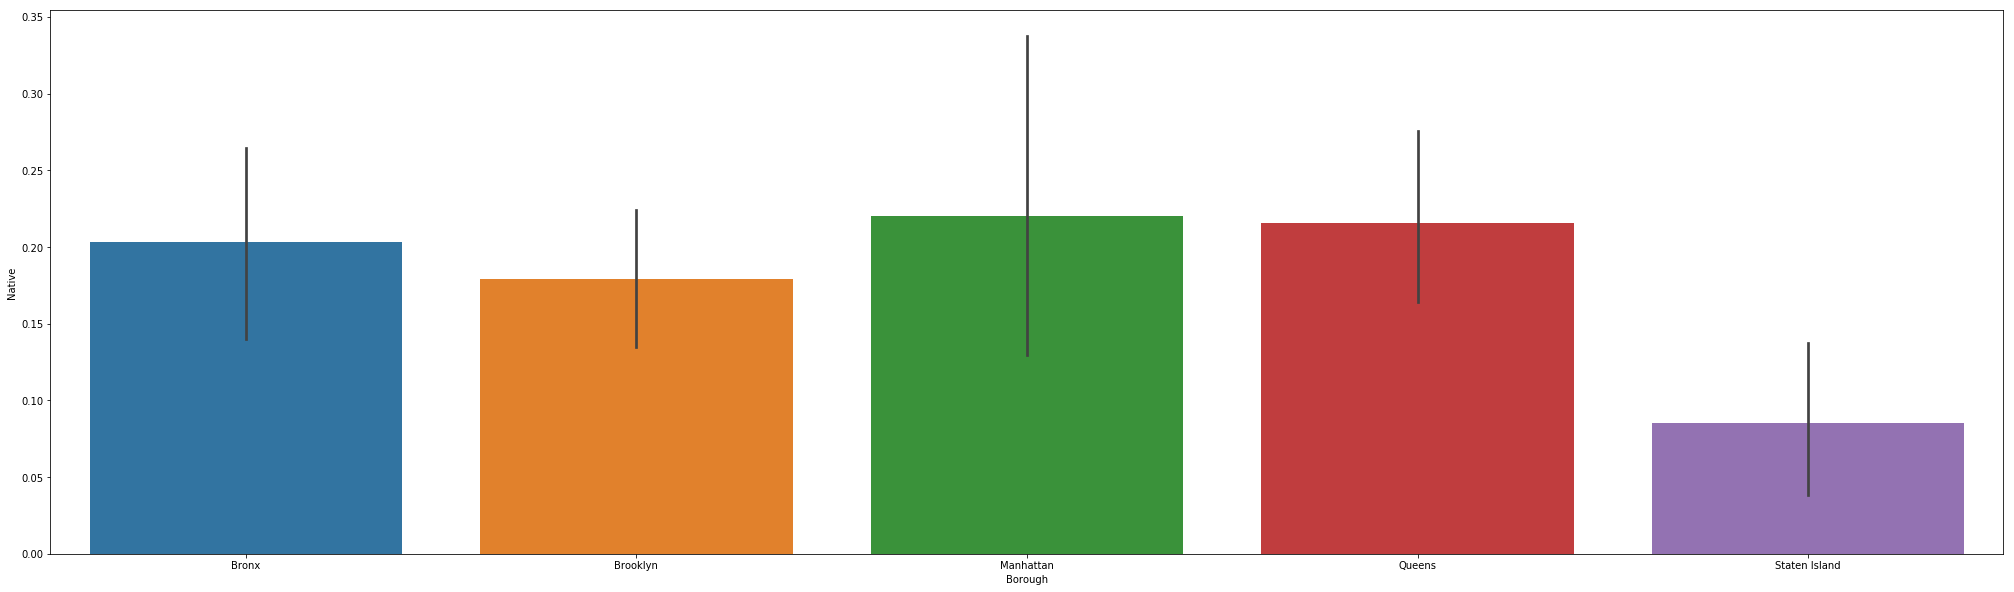

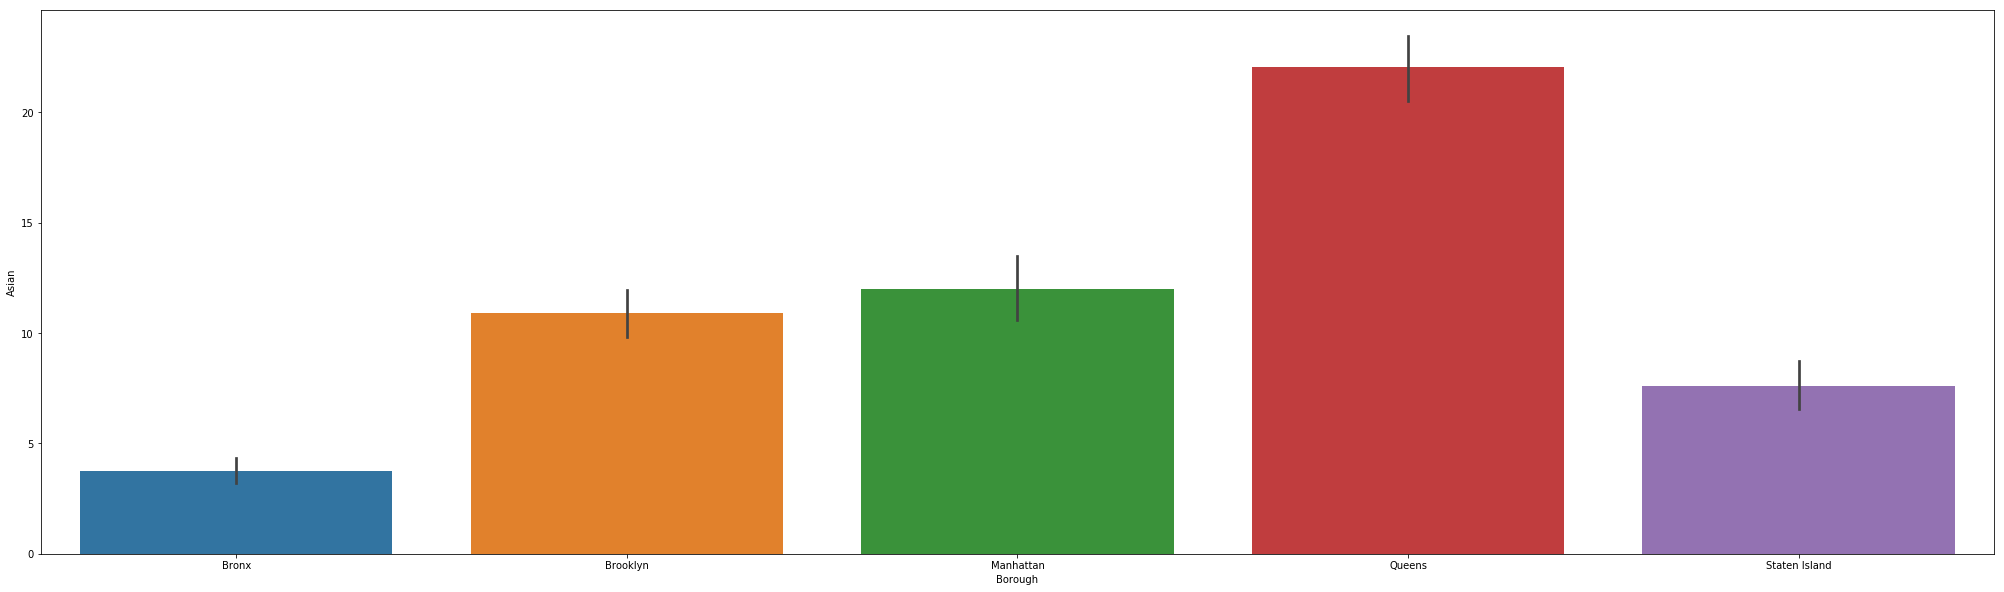

In [90]:
sns.barplot(y="Hispanic",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="White",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Black",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Native",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Asian",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

observation: Bronx has most hispanic people,Staten island has most white people,Bronx and Brooklyn has the most black people,Queens has the most Asian people

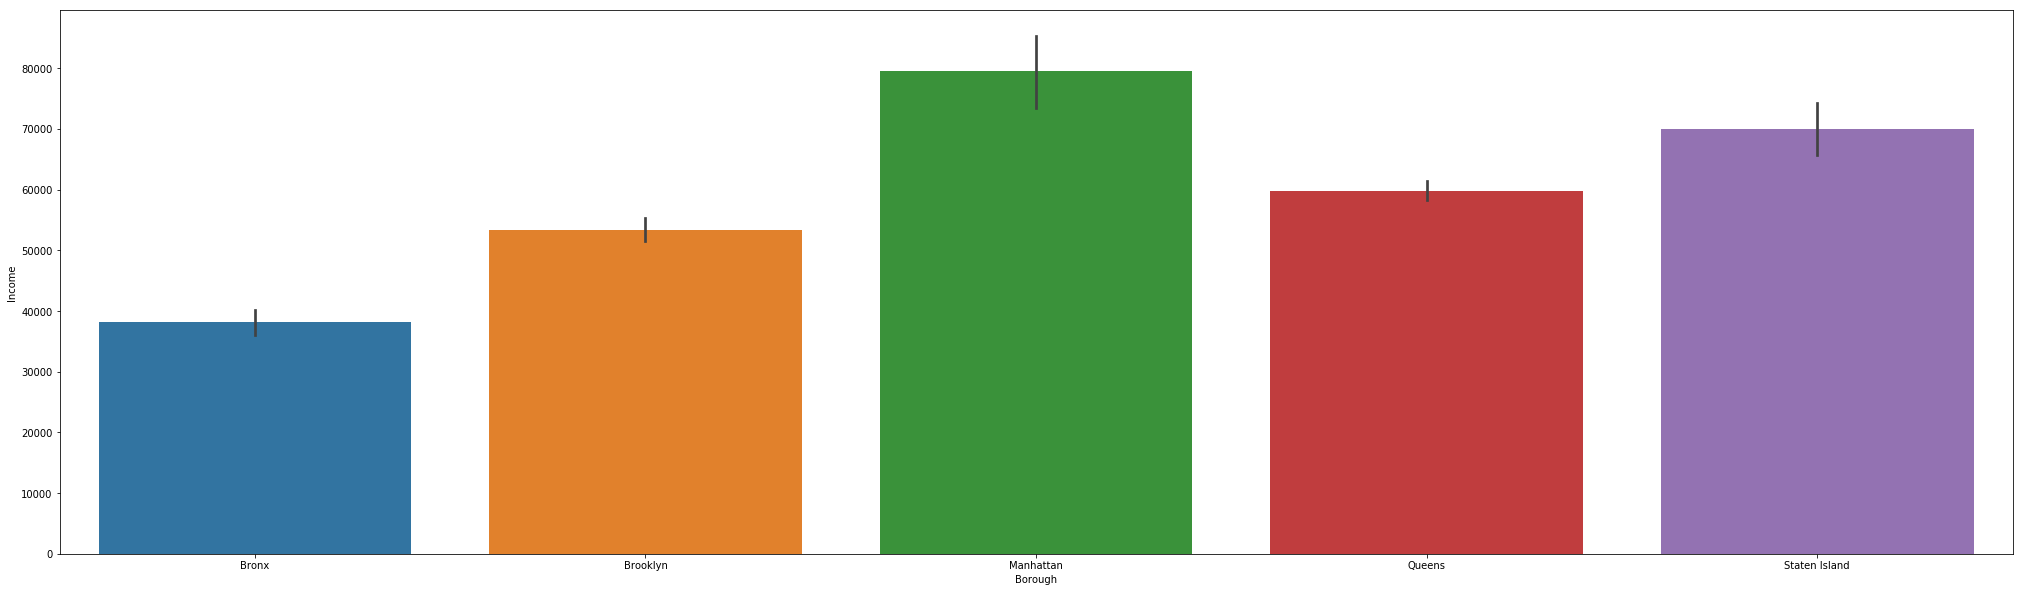

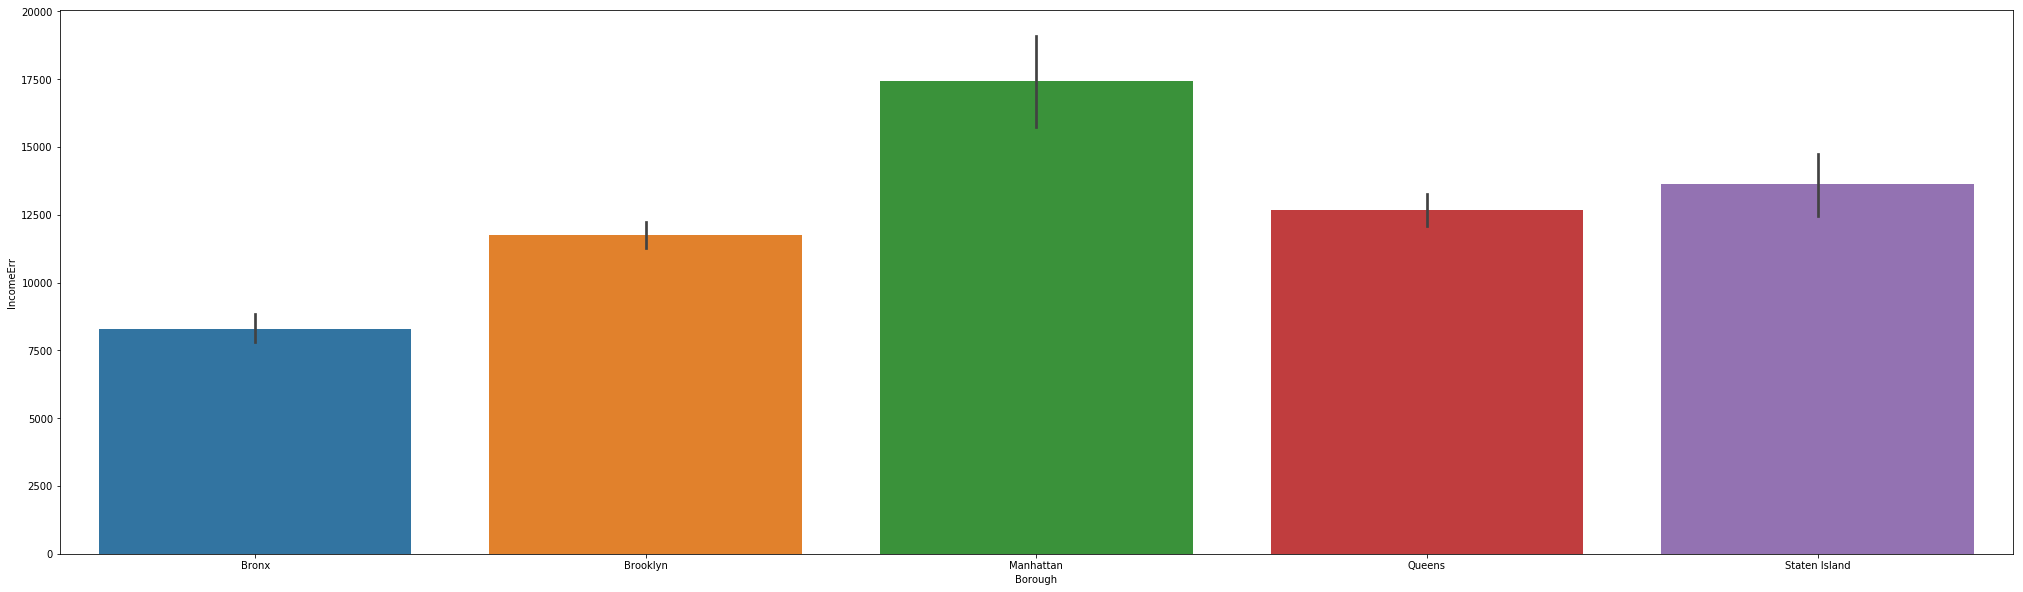

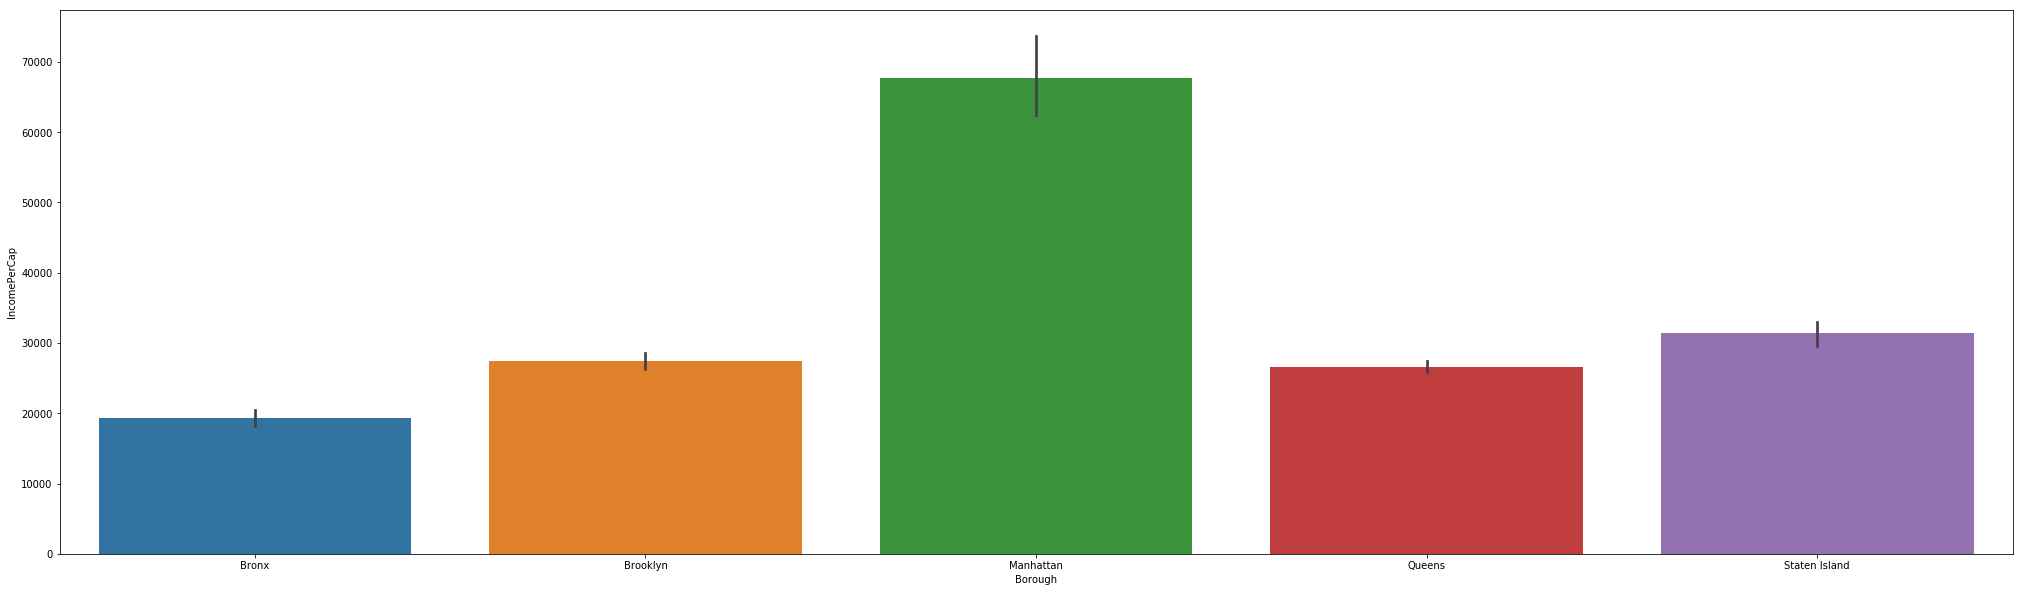

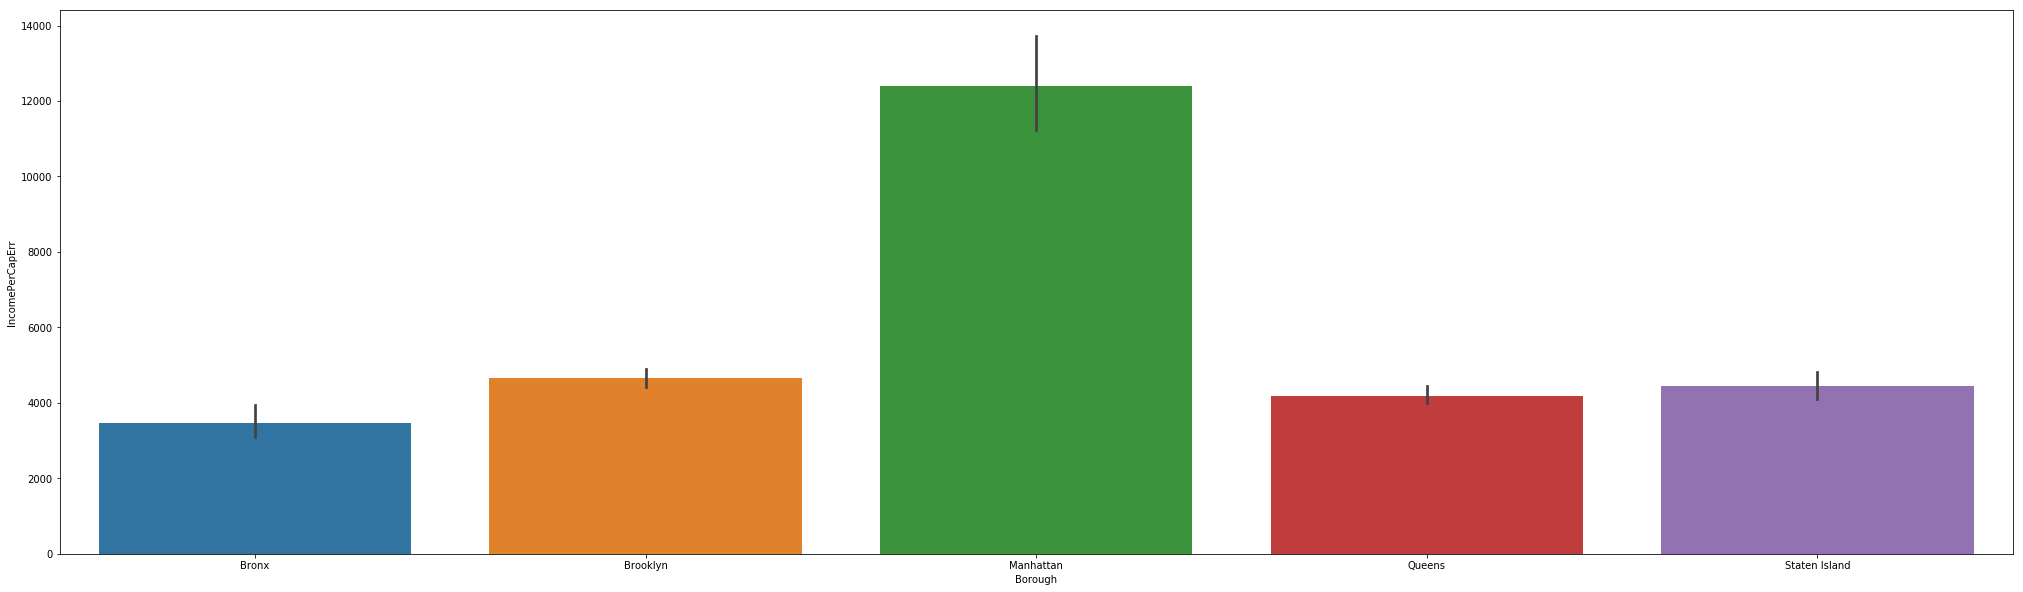

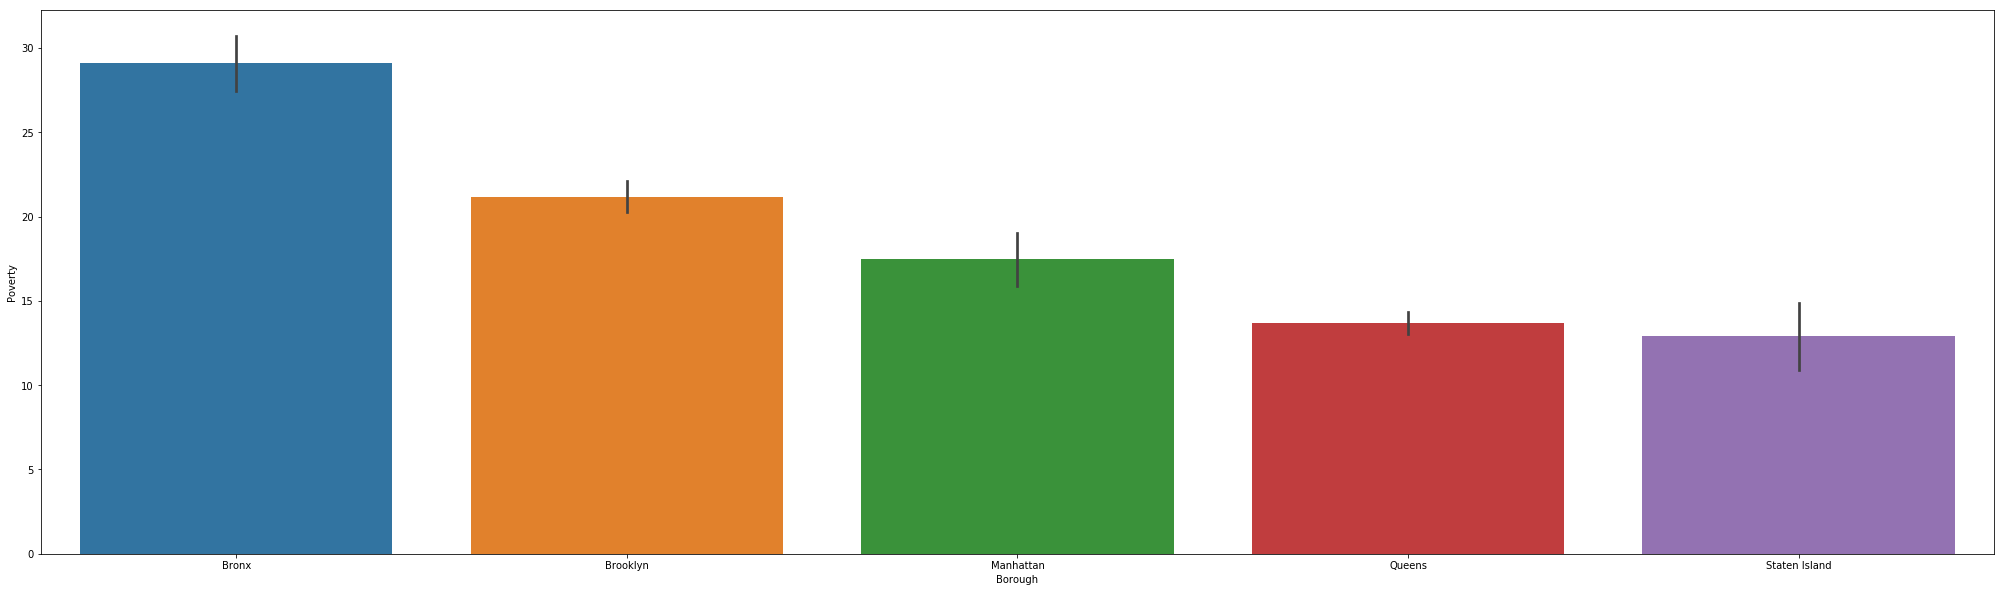

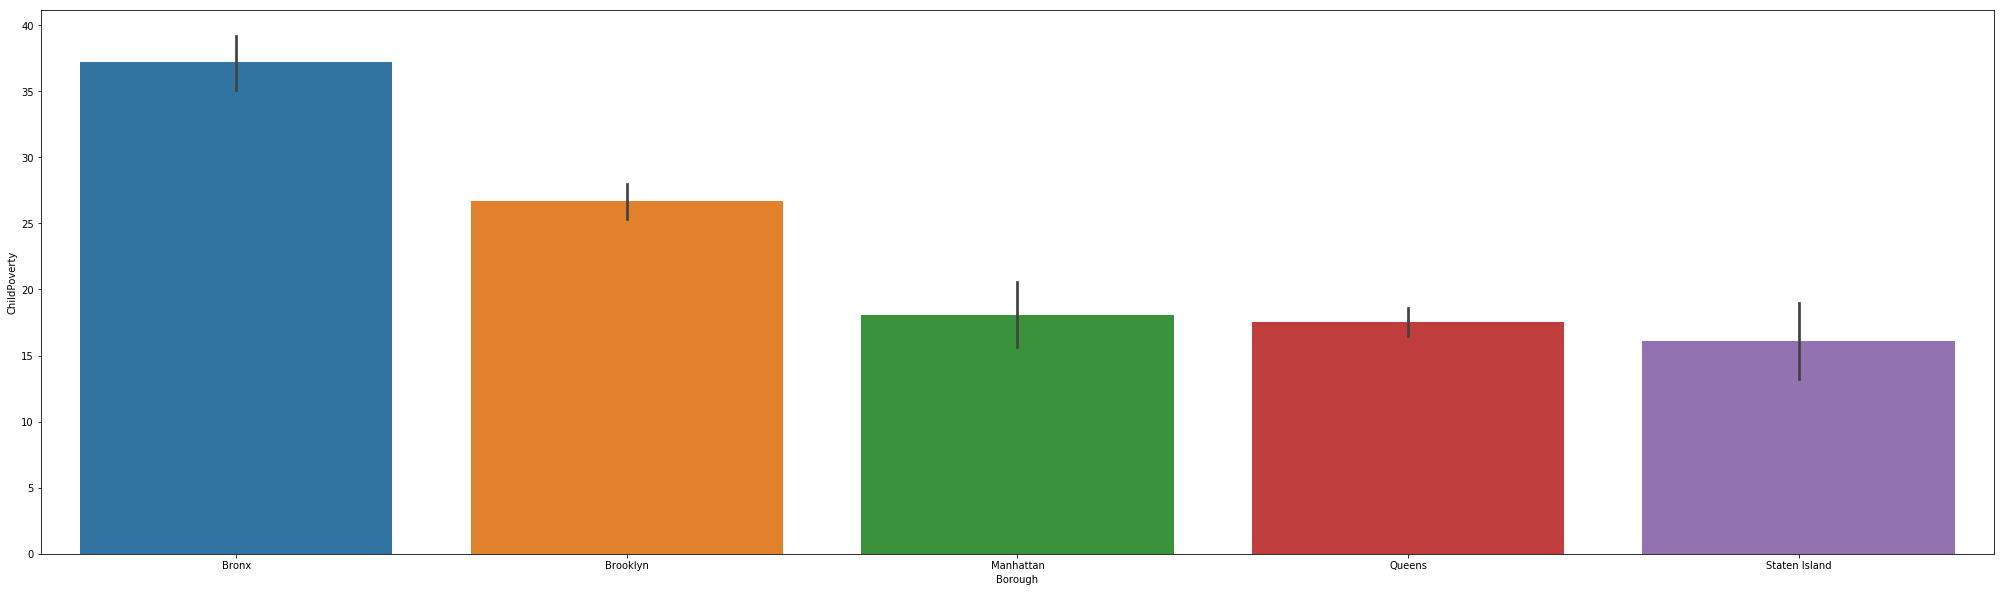

In [91]:
sns.barplot(y="Income",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="IncomeErr",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="IncomePerCap",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="IncomePerCapErr",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Poverty",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="ChildPoverty",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

observation : Avg Income and Income per capita is the most in manhattan therefor the error is also most over there, Poverty is most in bronx

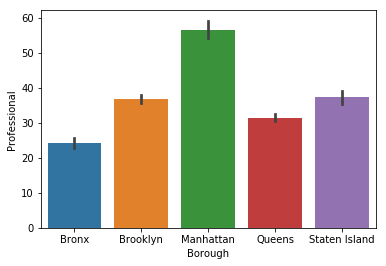

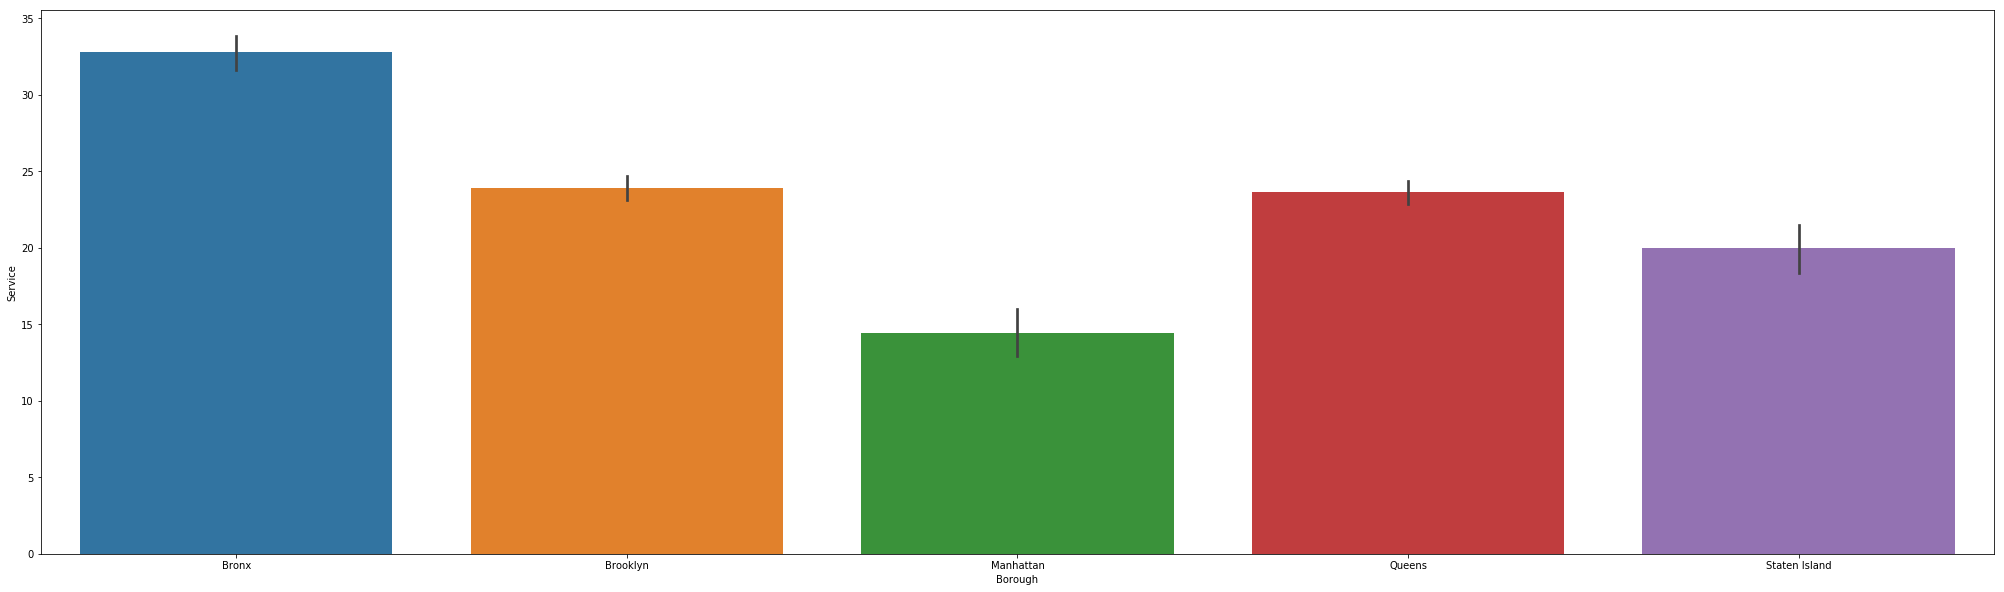

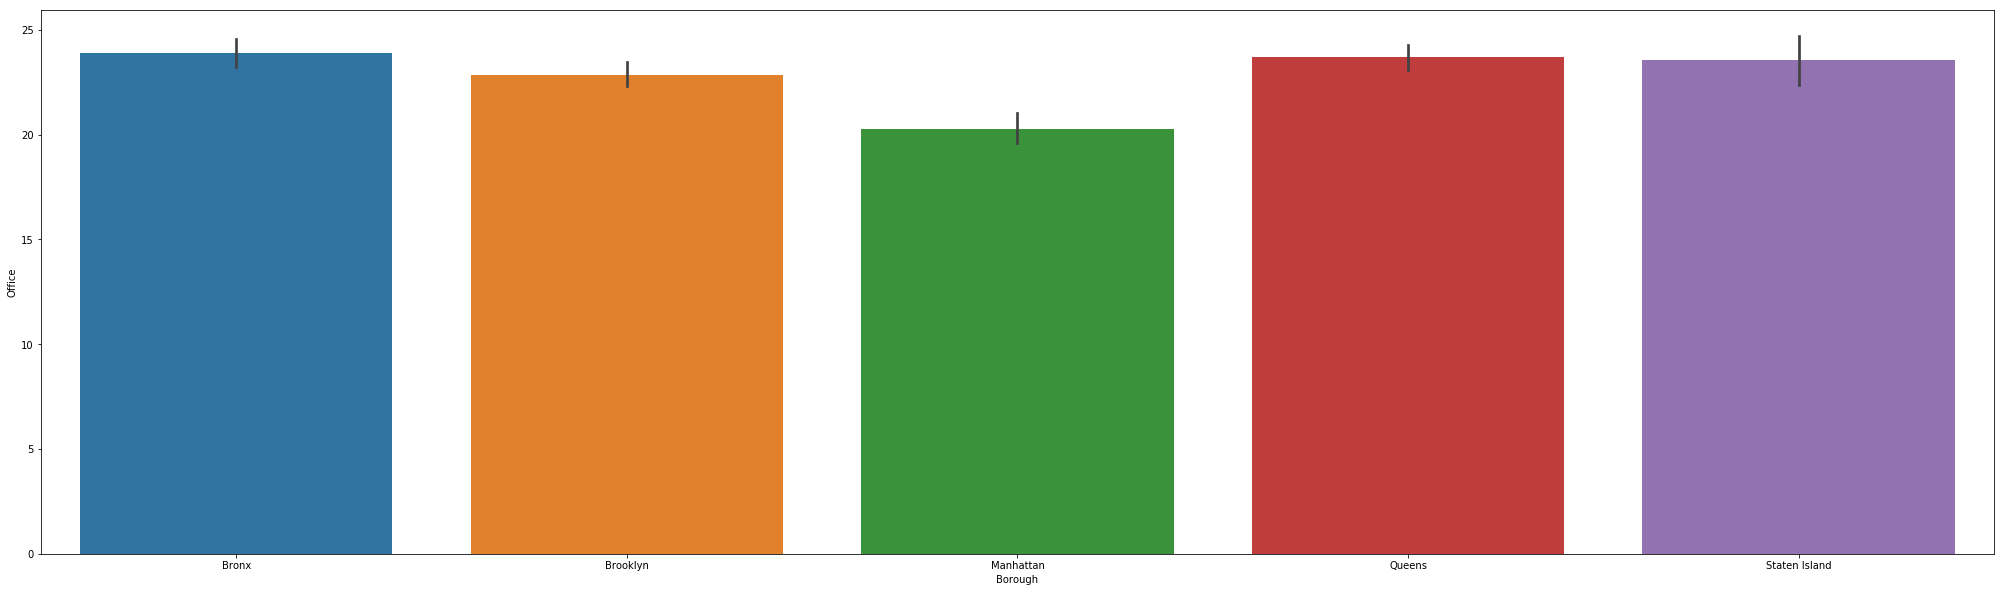

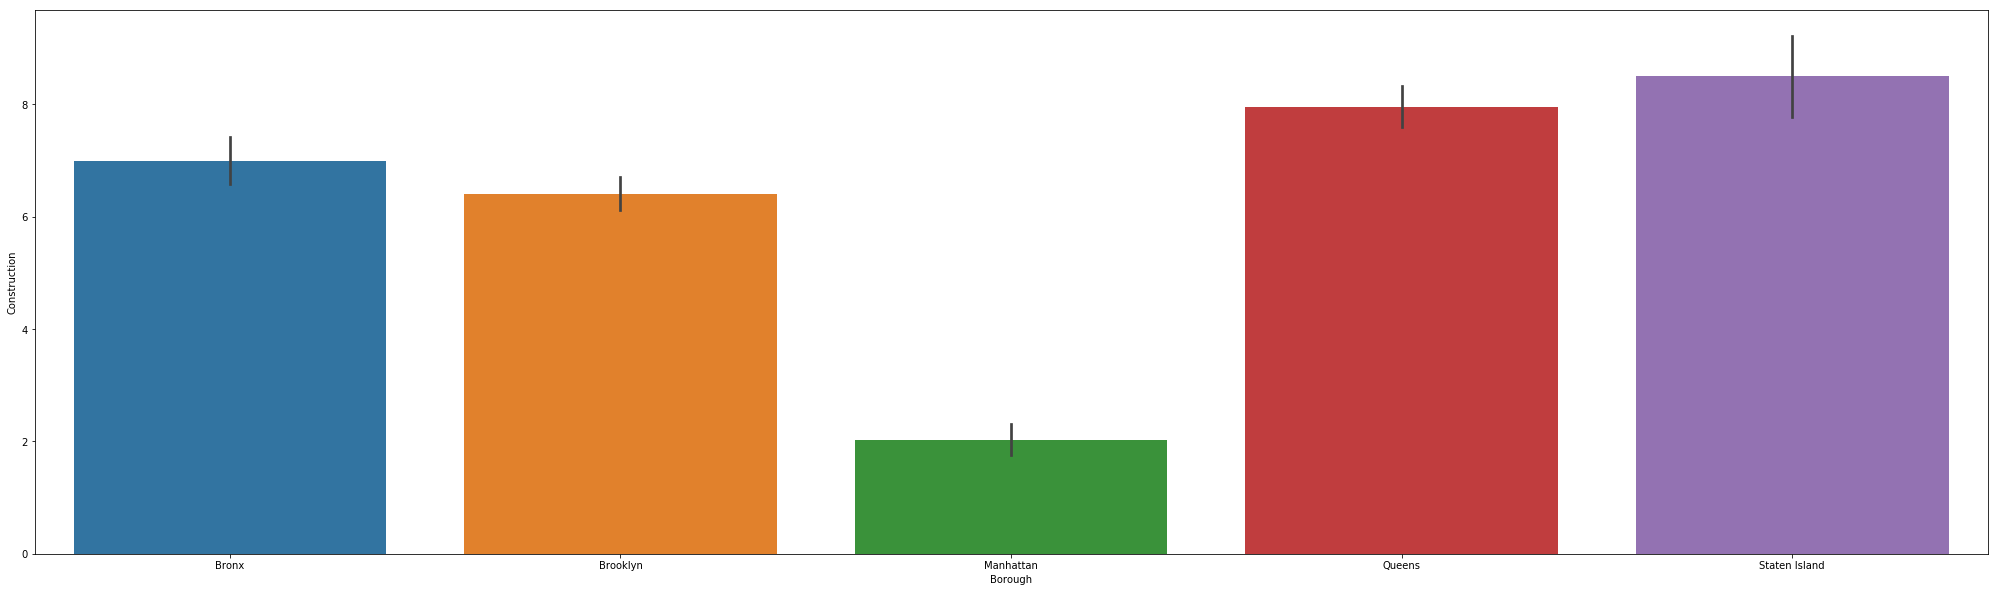

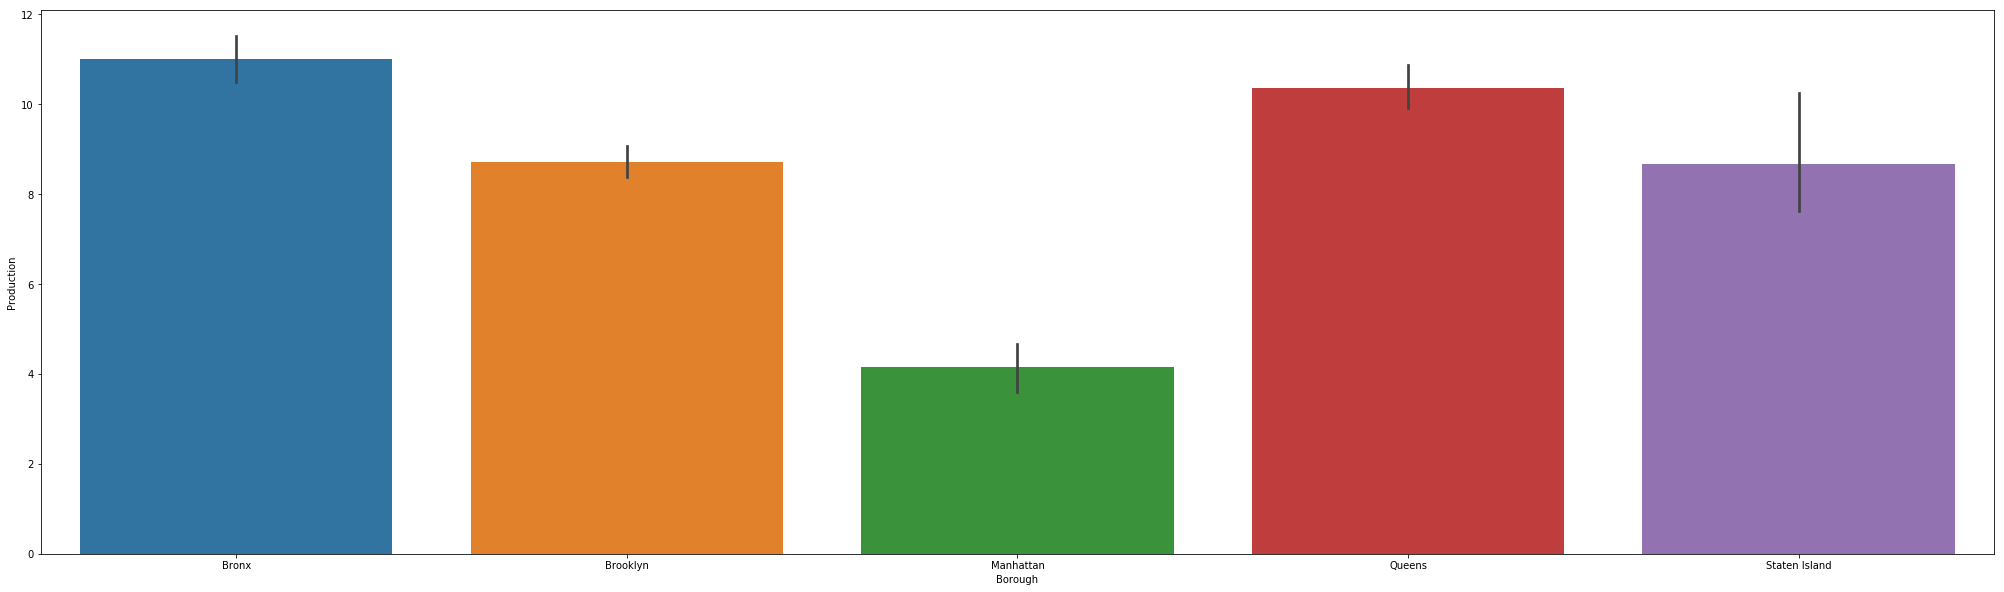

In [114]:
sns.barplot(y="Professional",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Service",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Office",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Construction",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Production",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))


observations: There are more professional in manhattan,bronx has the most people in service,about 25% of people in every borough work in office job,about 7% of people in Bronx,Brooklyn,Queens,Staten Island are in construction,30% of people from bronx and queens are in Production jobs

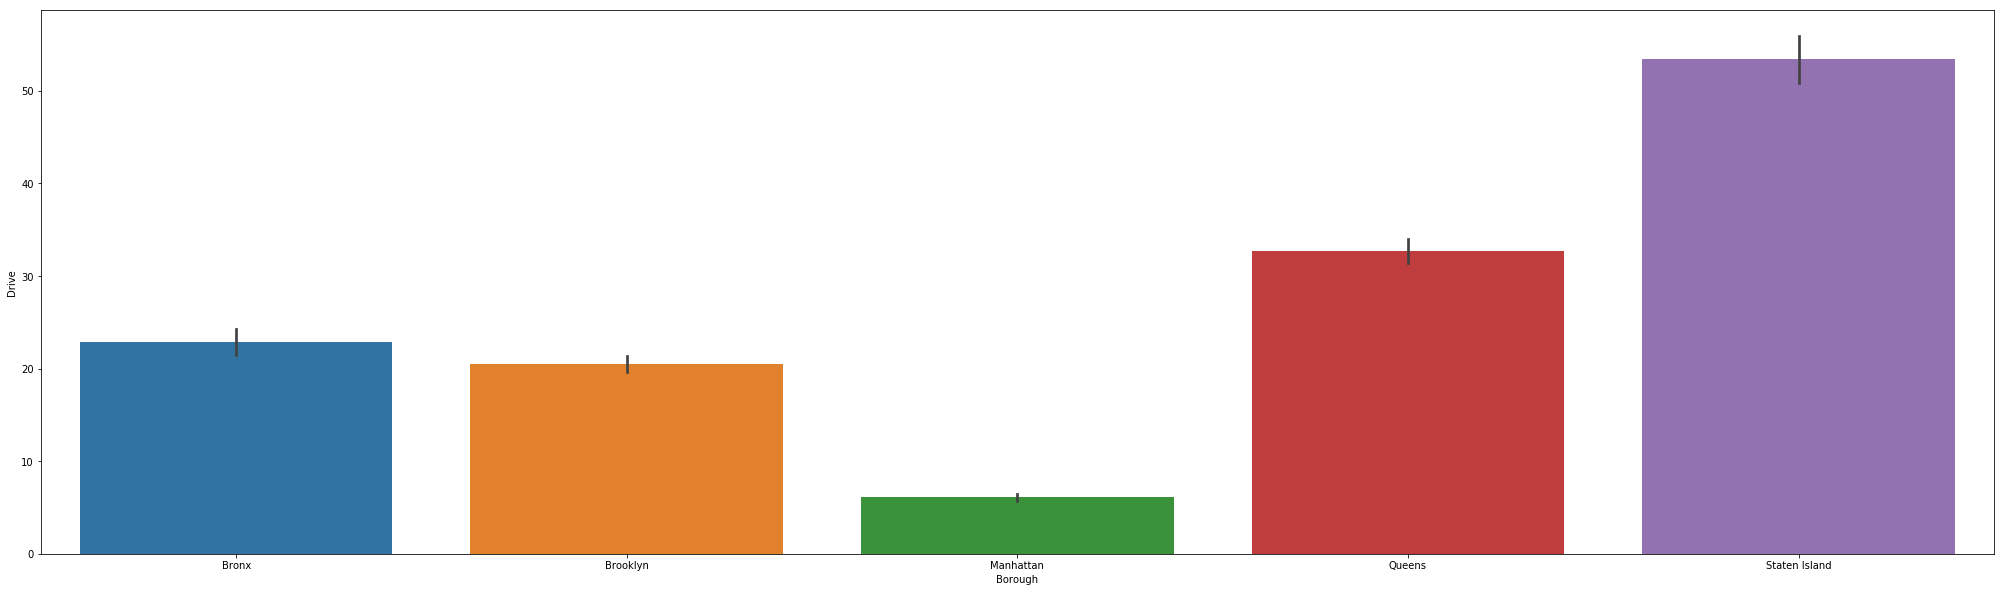

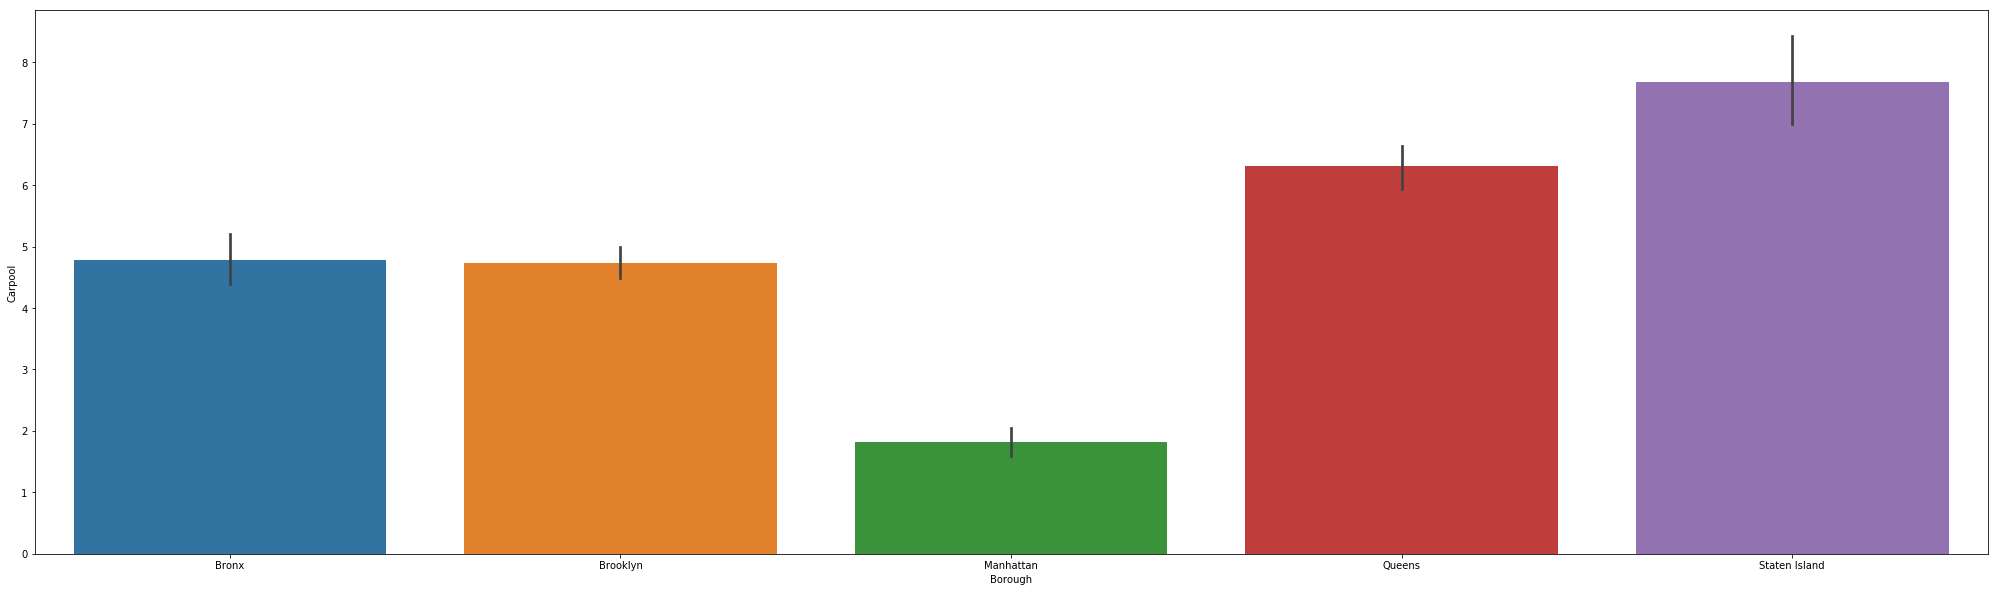

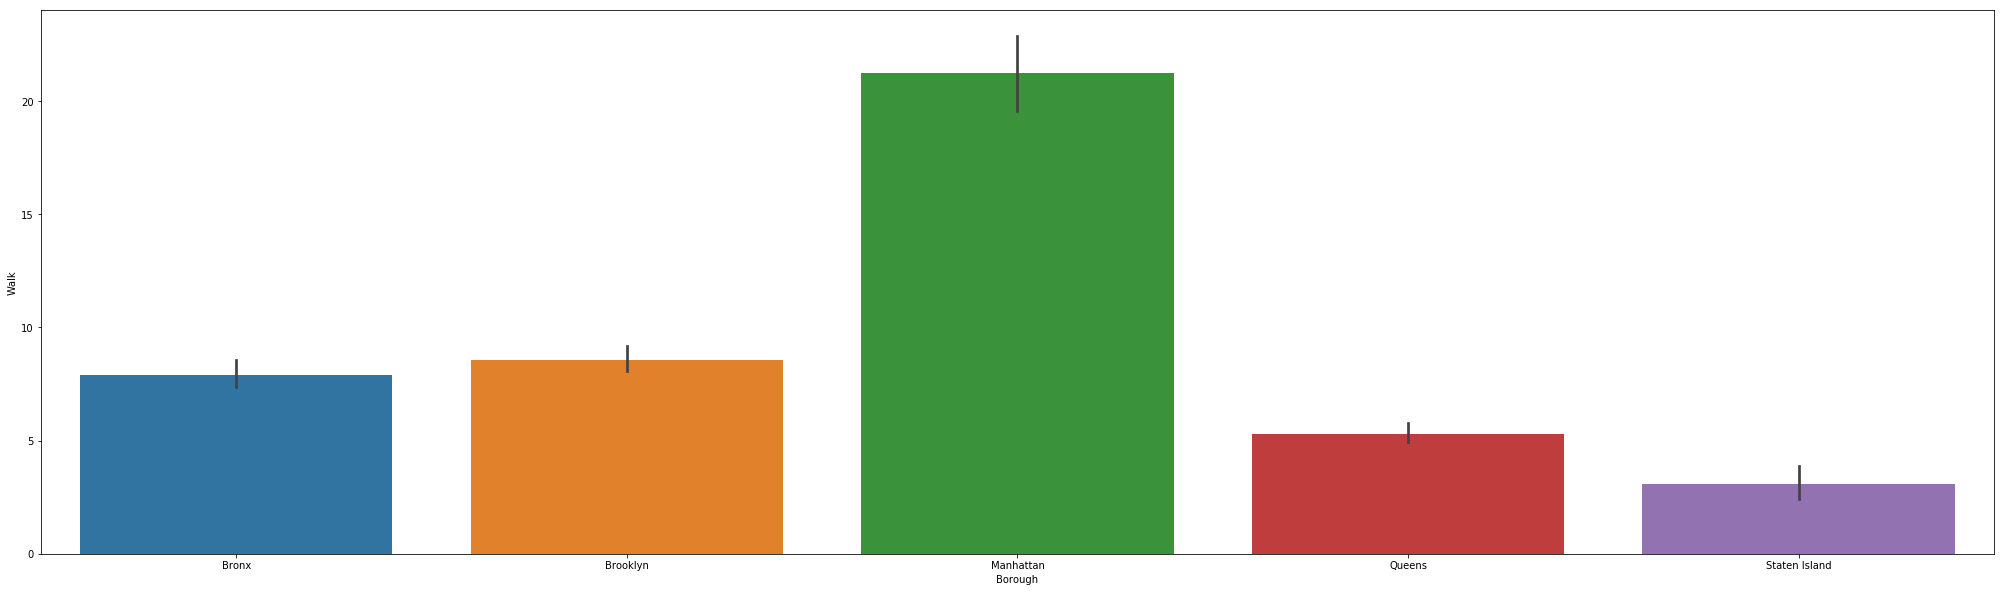

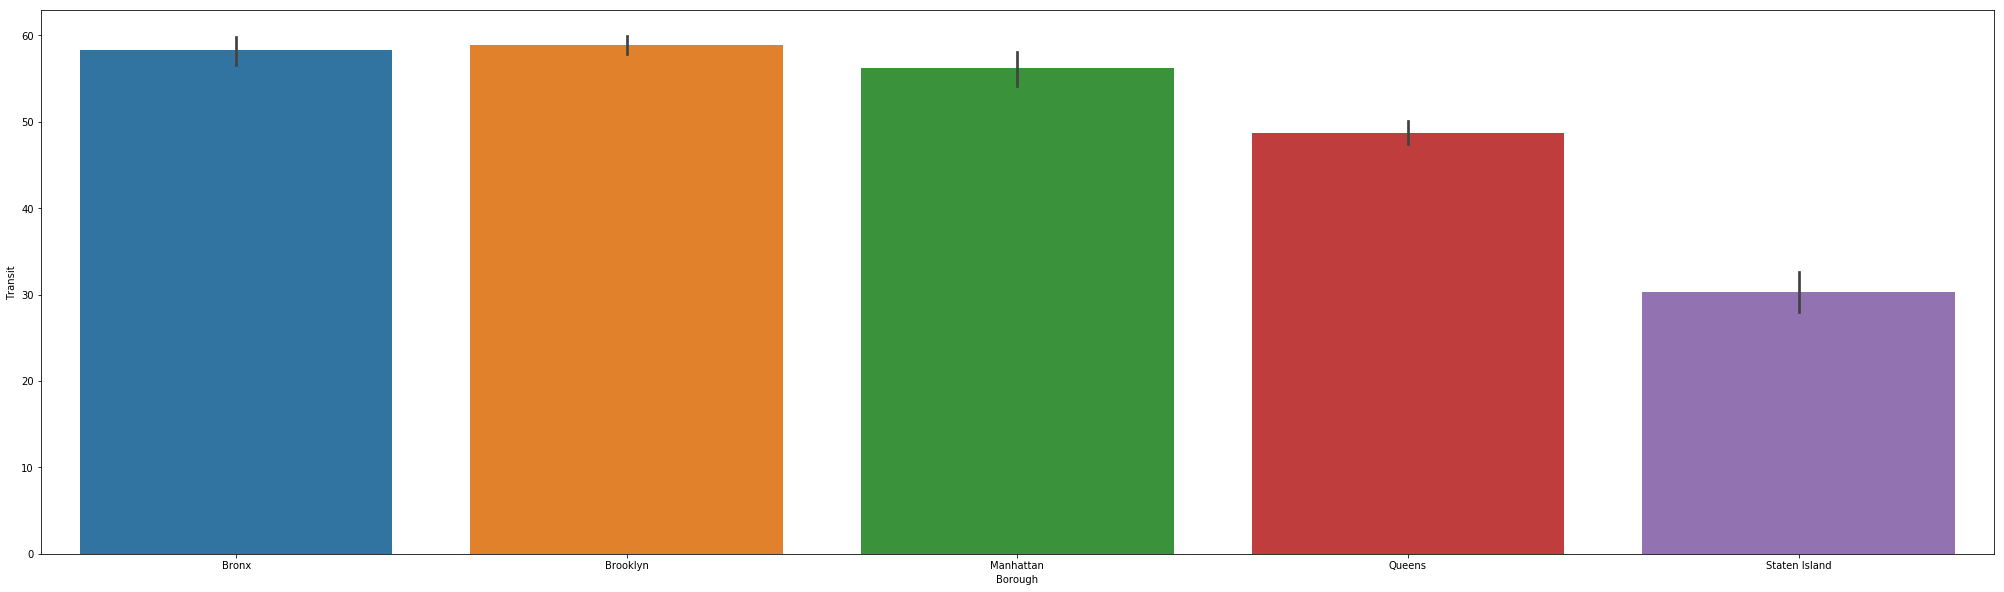

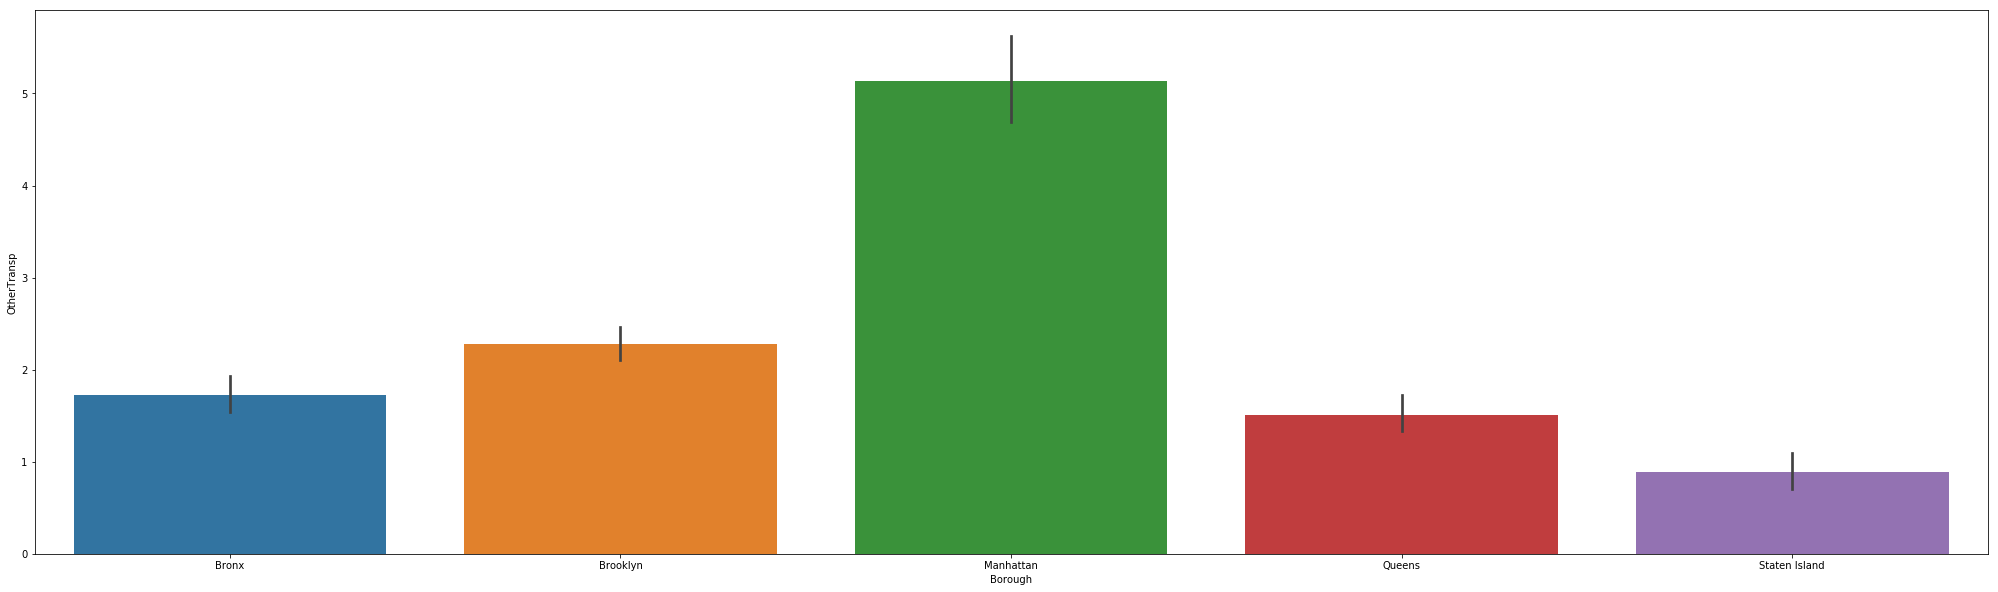

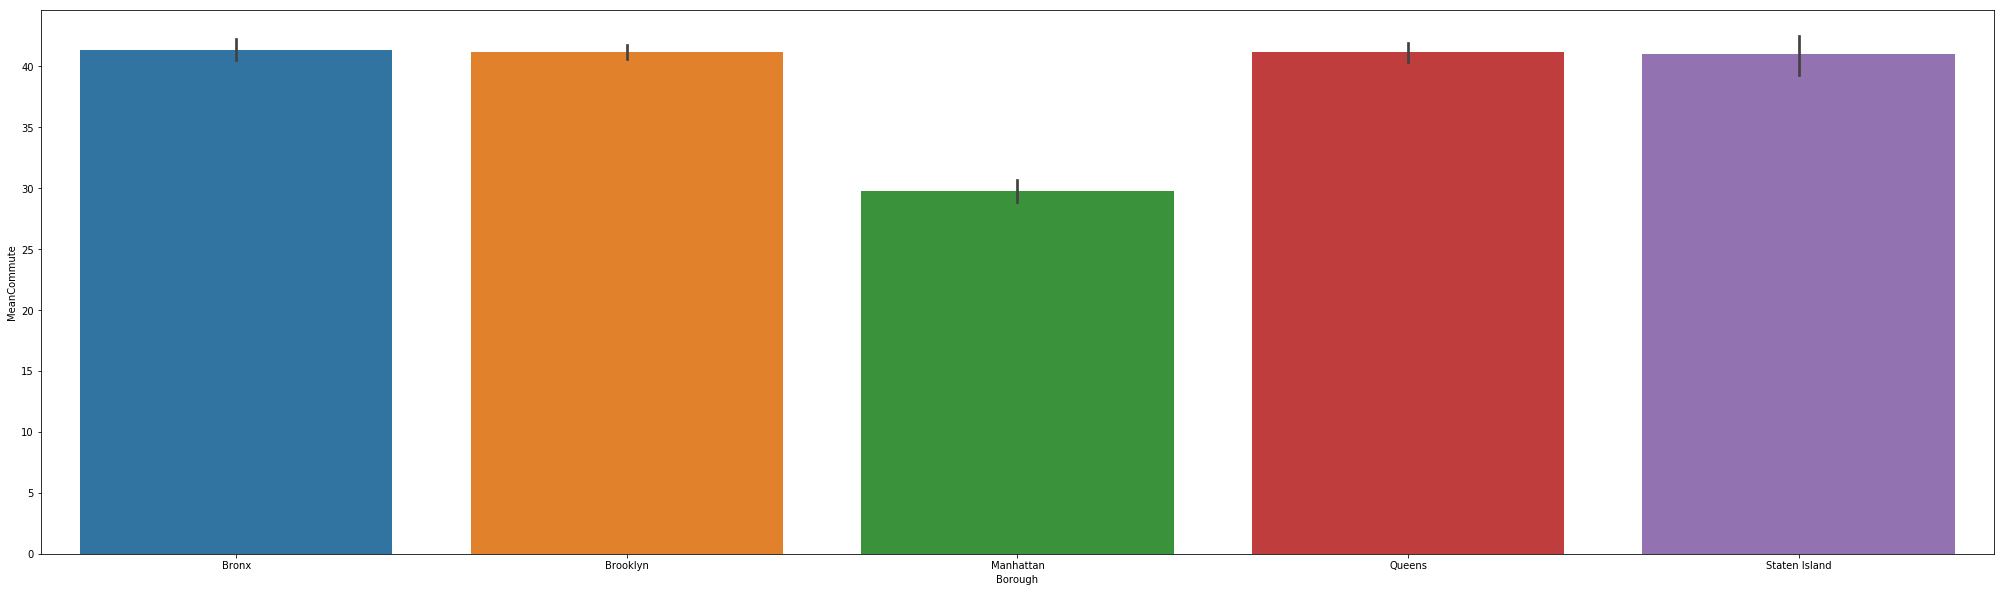

In [115]:
sns.barplot(y="Drive",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Carpool",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Walk",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Transit",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="OtherTransp",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="MeanCommute",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

obsevation: about 50% of people in Staten island drive,about 5-7% people carpool everywhere,20% of people in manhattan prefer to walk,60% of people use transit,above 5% people in Manhattan use other Transp,on average people take about 40 mins to commute where as in manhattan they take about 30mins to commute

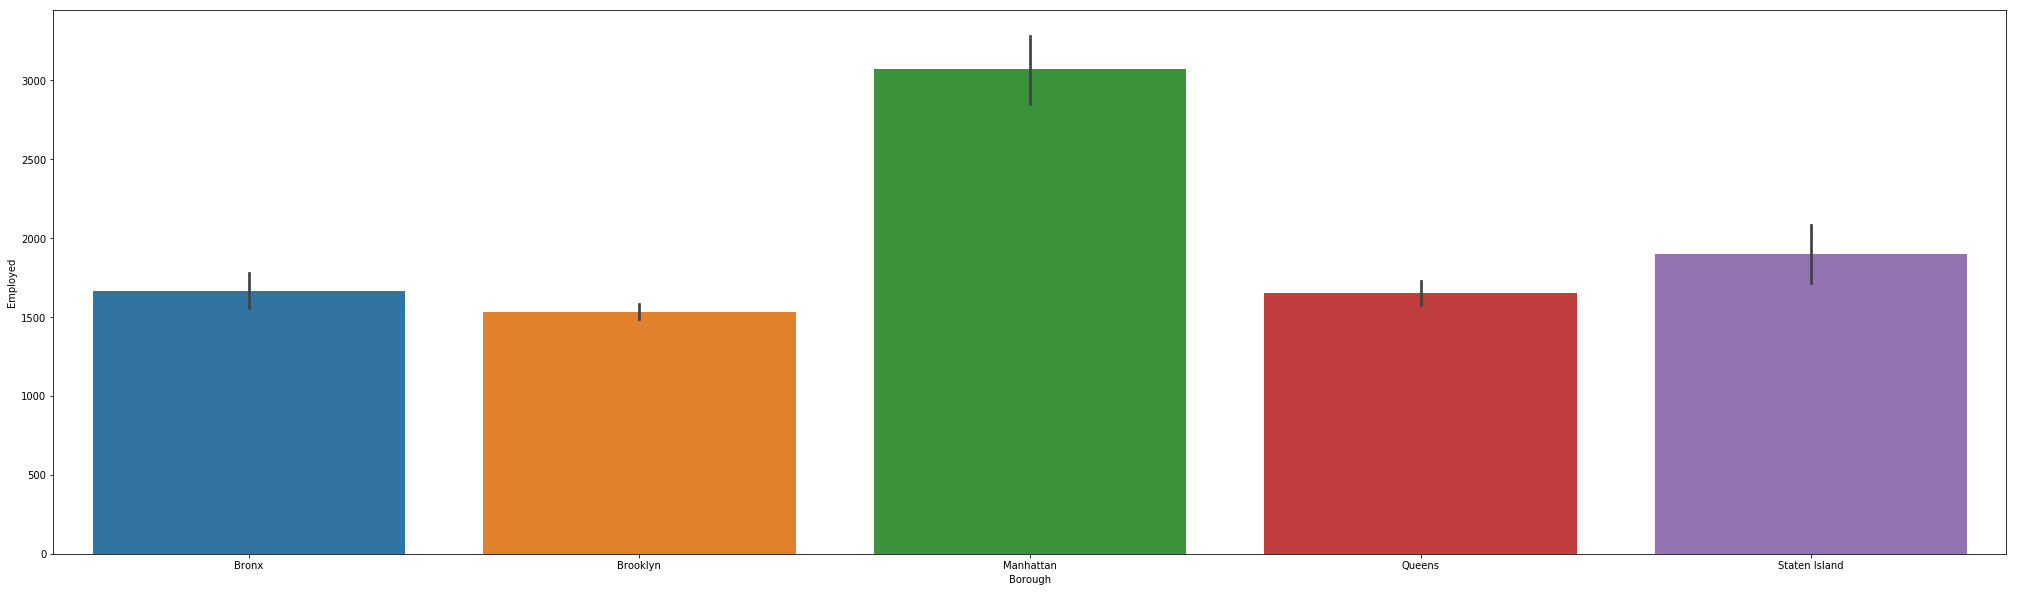

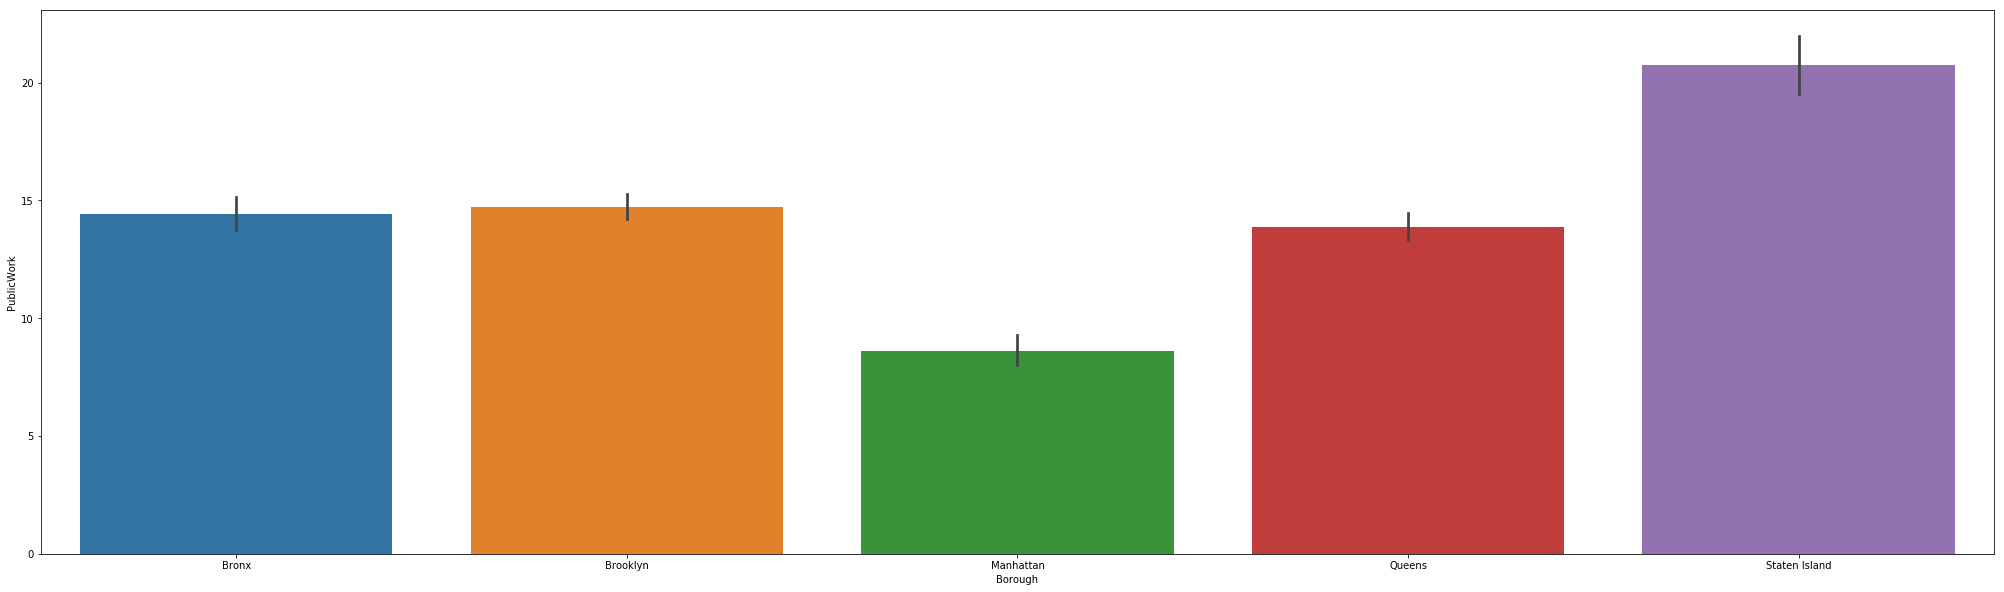

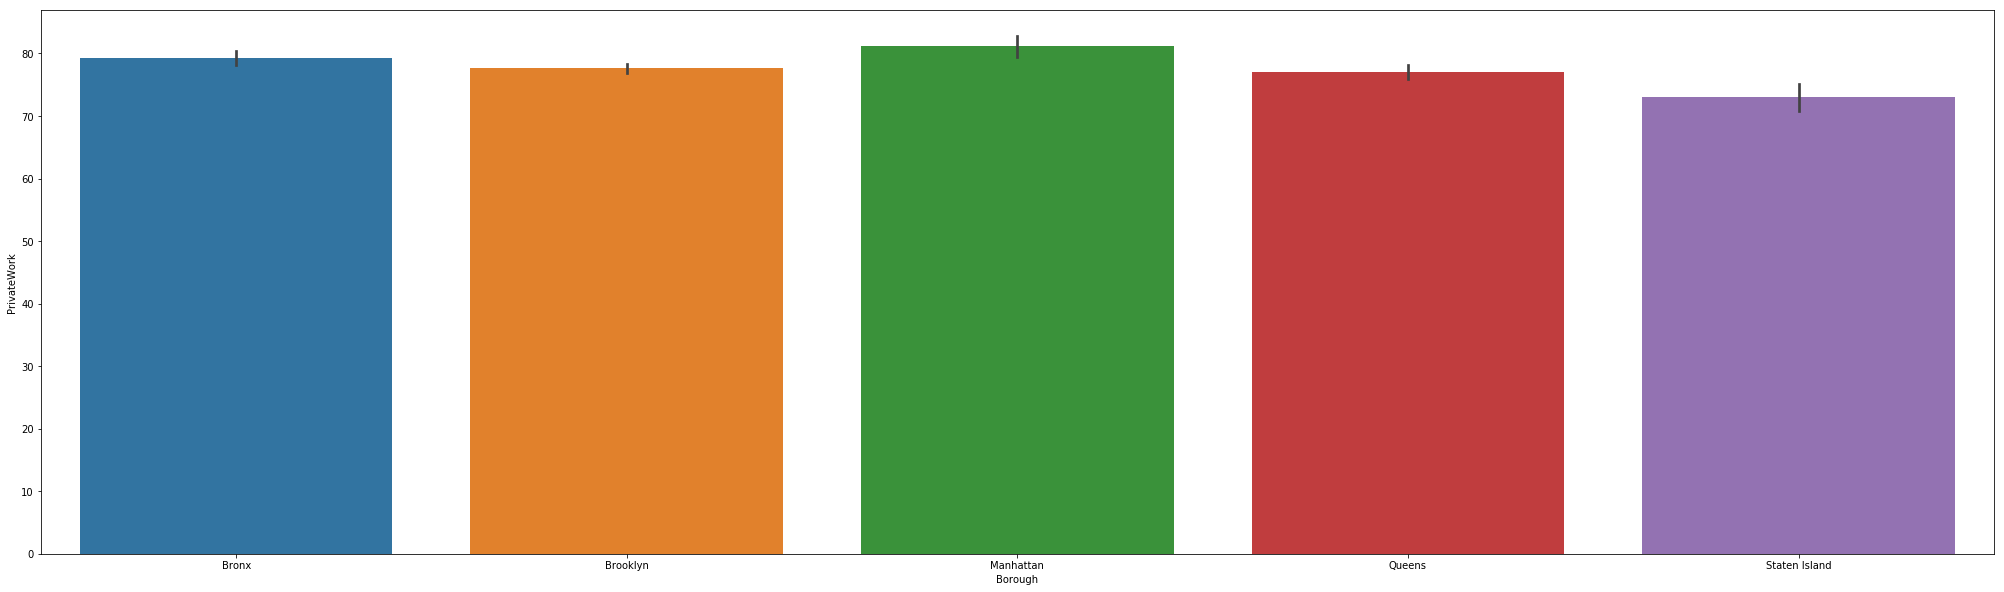

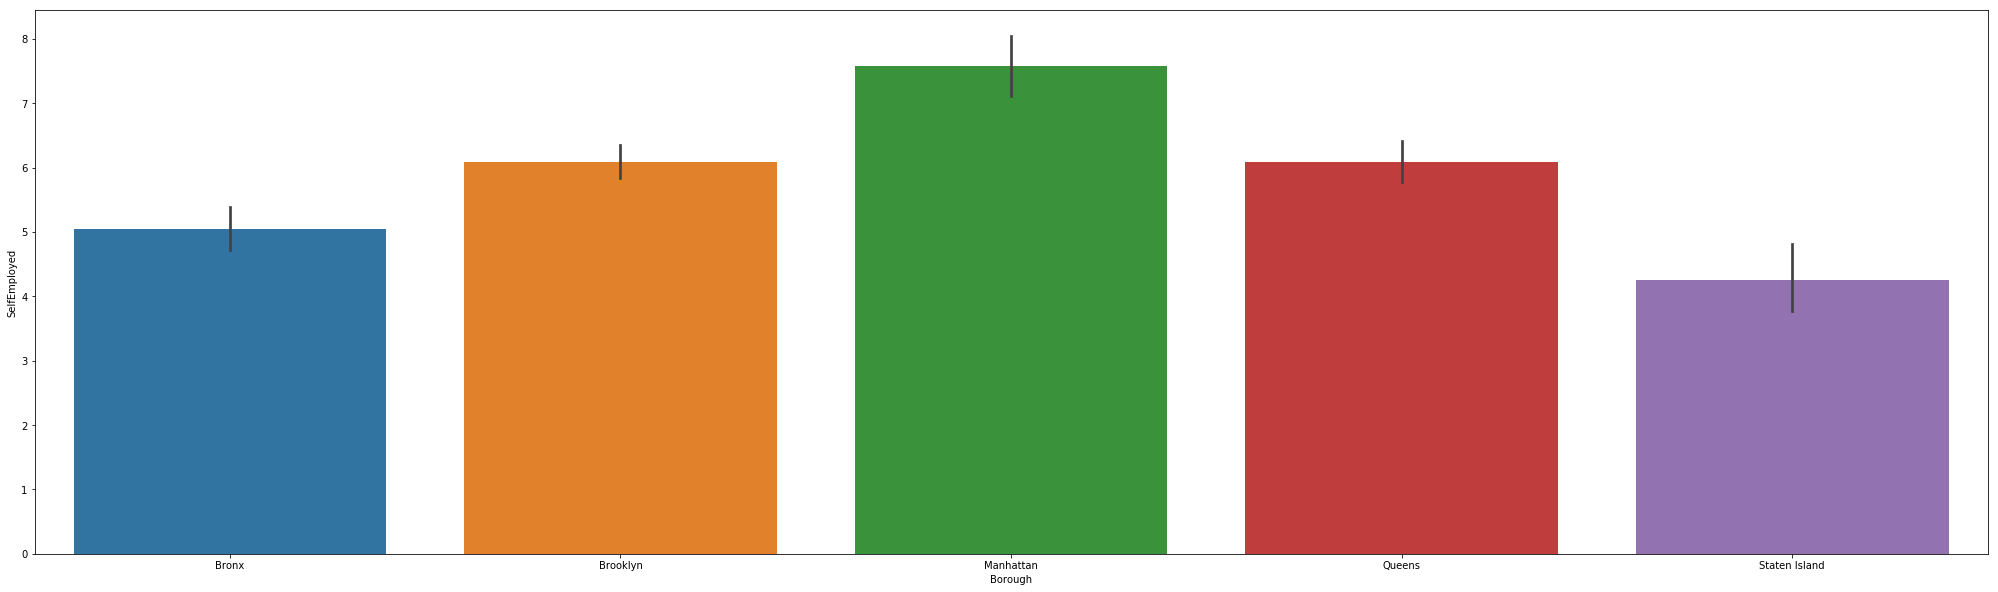

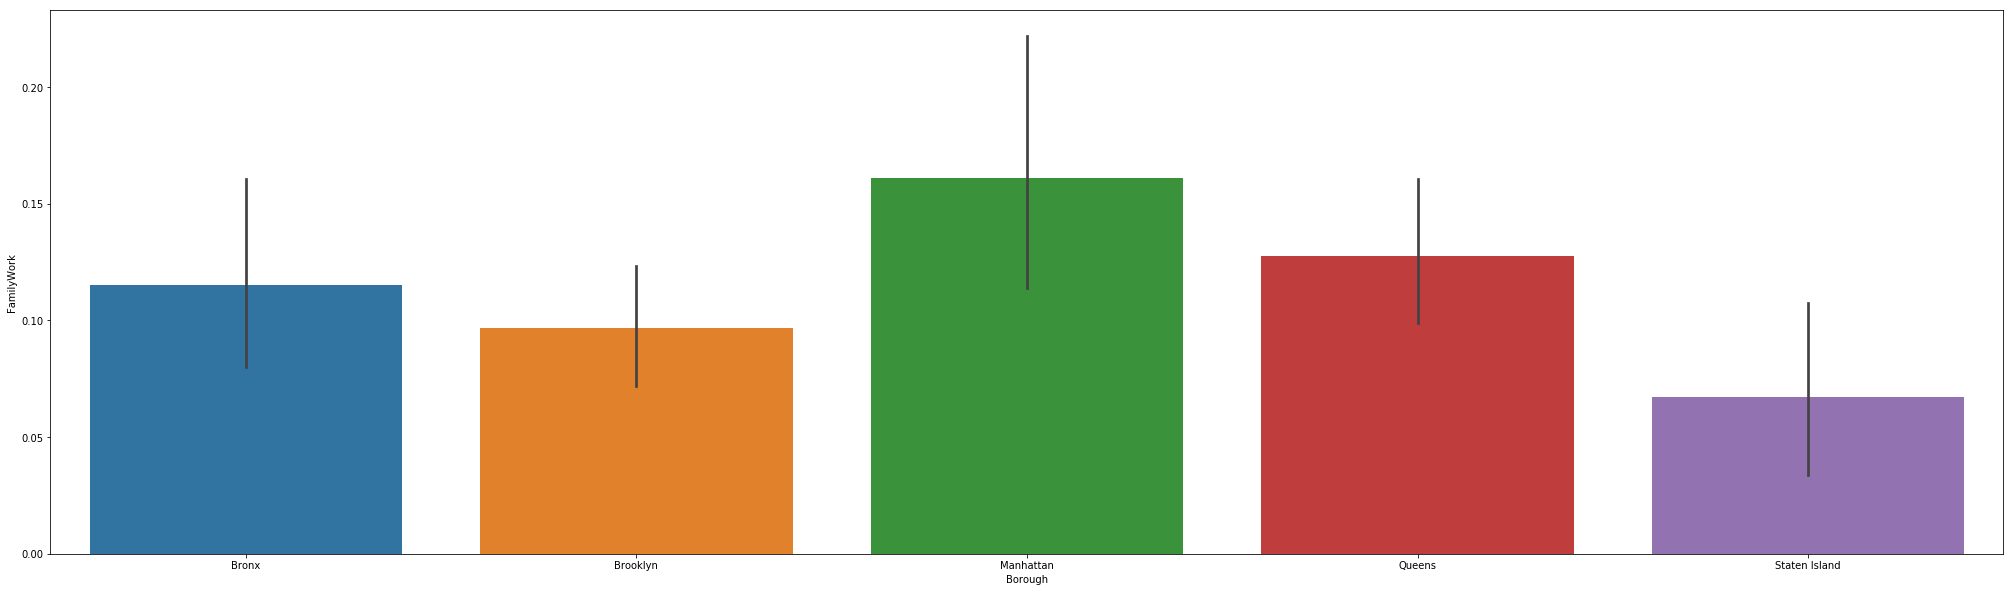

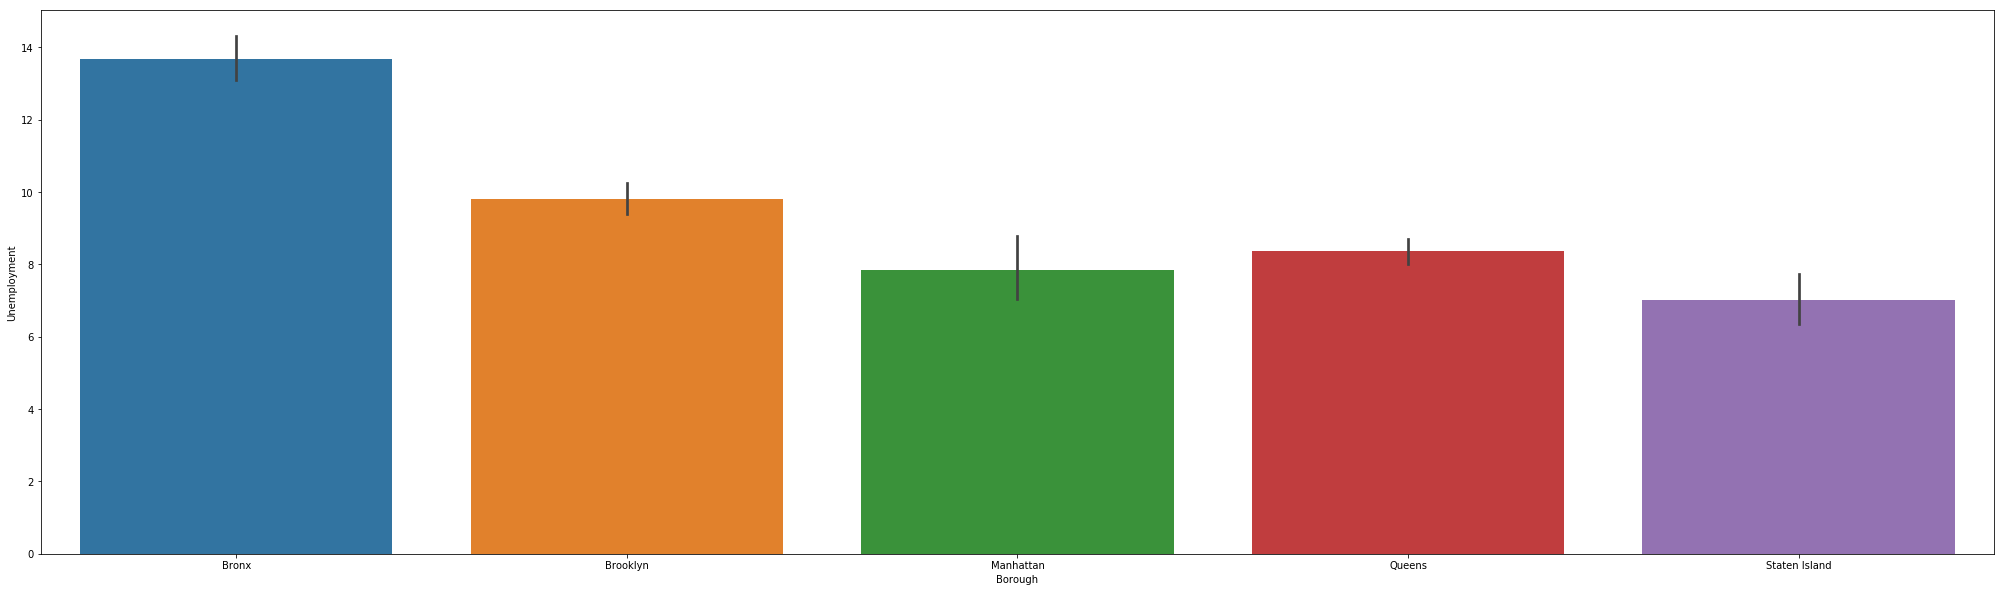

In [116]:
sns.barplot(y="Employed",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="PublicWork",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="PrivateWork",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="SelfEmployed",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="FamilyWork",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

sns.barplot(y="Unemployment",x="Borough", data=census1)
plt.show()
plt.figure(figsize=(35,10))

observation: Most people in Manhattan are Employed,20% of people in staten island are inpublic work,80% of people in new york are in Professional work,6-8% of people are self employed,0.10% people are self employed,most people are unemployed in Bronx

ScatterPlot:

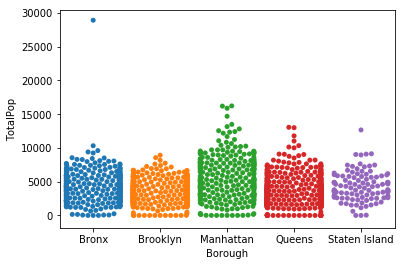

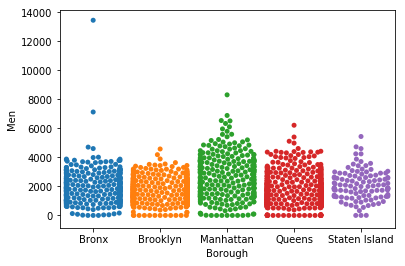

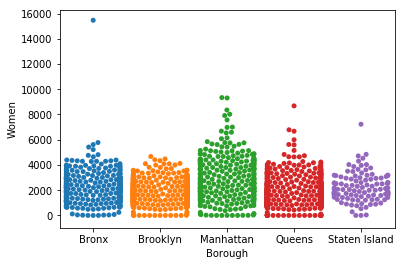

In [150]:
sns.swarmplot(x="Borough", y="TotalPop", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Men", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Women", data=census1)
plt.show()

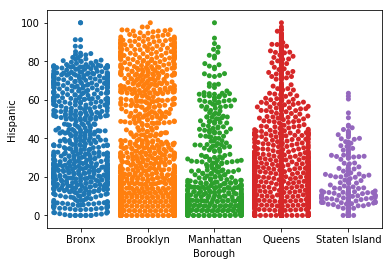

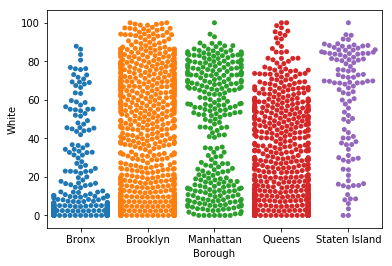

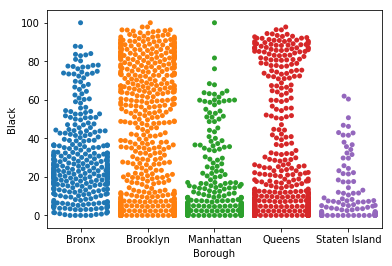

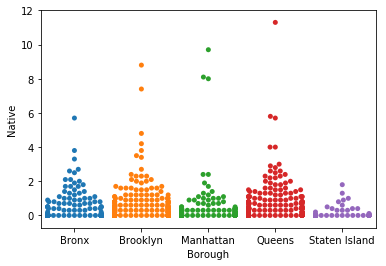

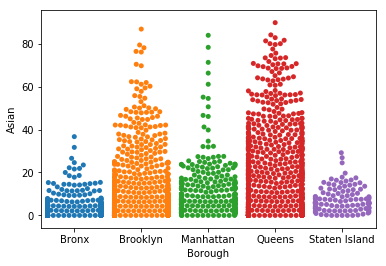

In [152]:
sns.swarmplot(x="Borough", y="Hispanic", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="White", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Black", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Native", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Asian", data=census1)
plt.show()

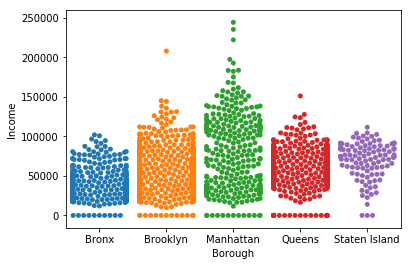

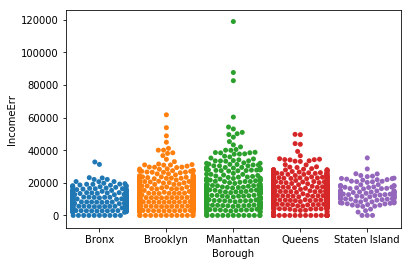

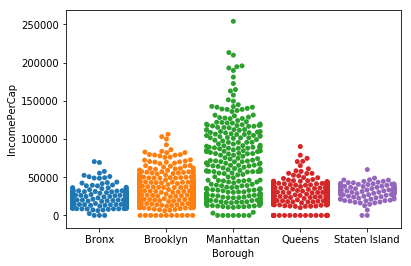

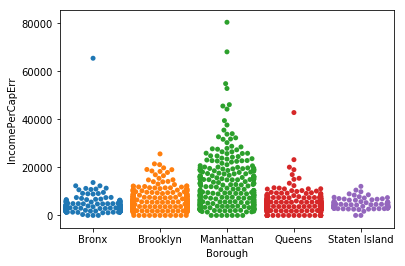

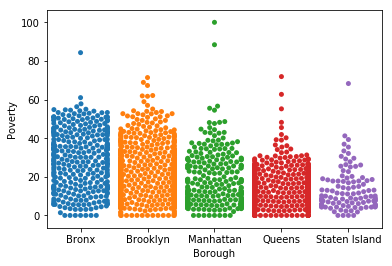

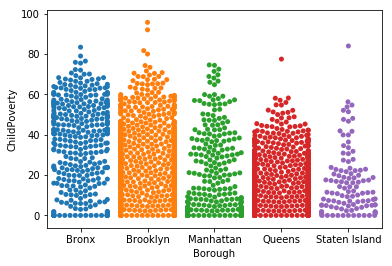

In [153]:
sns.swarmplot(x="Borough", y="Income", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="IncomeErr", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="IncomePerCap", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="IncomePerCapErr", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Poverty", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="ChildPoverty", data=census1)
plt.show()

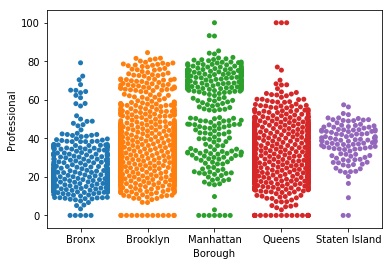

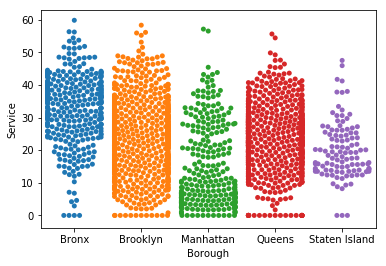

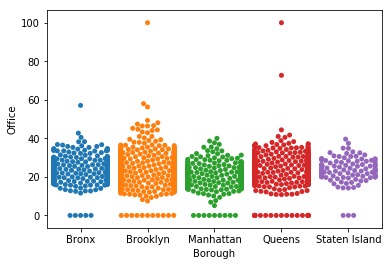

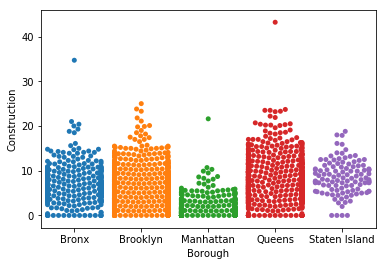

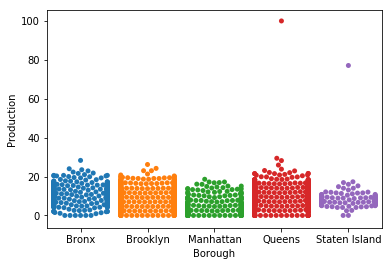

In [154]:
sns.swarmplot(x="Borough", y="Professional", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Service", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Office", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Construction", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Production", data=census1)
plt.show()


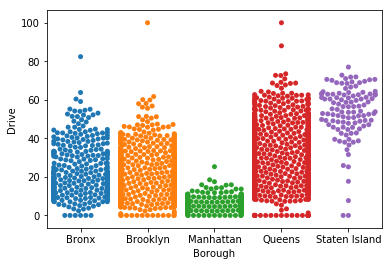

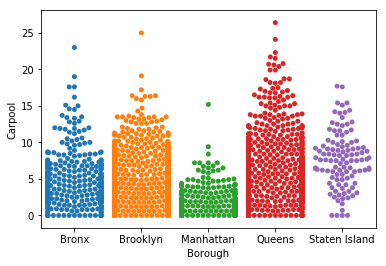

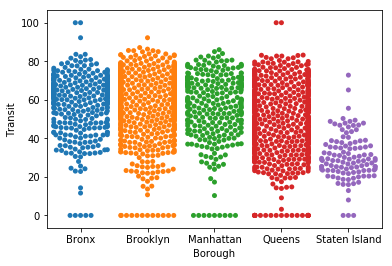

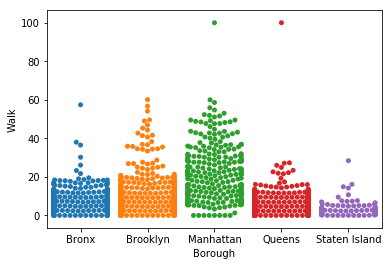

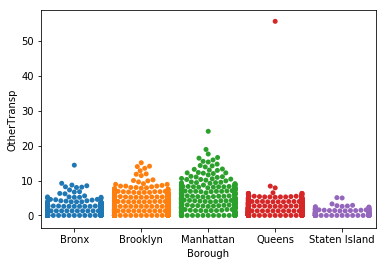

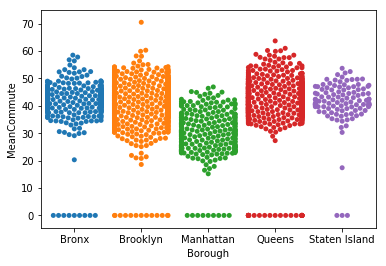

In [155]:
sns.swarmplot(x="Borough", y="Drive", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Carpool", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Transit", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Walk", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="OtherTransp", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="MeanCommute", data=census1)
plt.show()

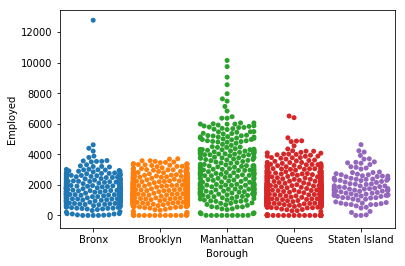

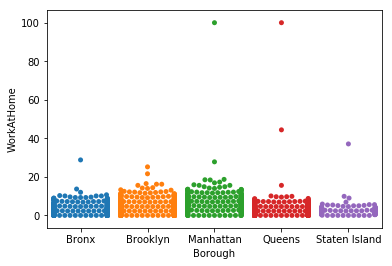

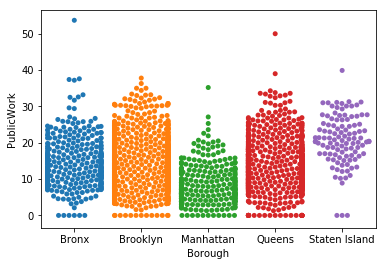

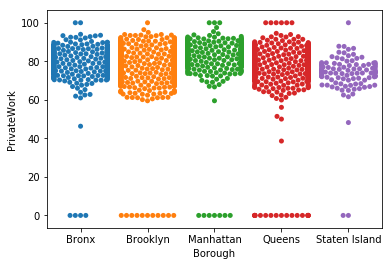

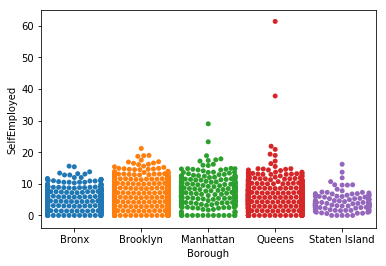

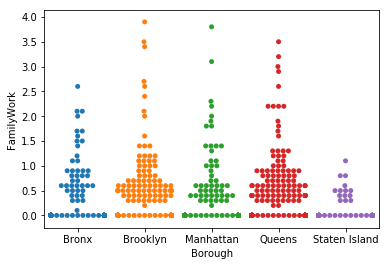

ValueError: Could not interpret input 'Unemploymnet'

In [159]:
sns.swarmplot(x="Borough", y="Employed", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="WorkAtHome", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="PublicWork", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="PrivateWork", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="SelfEmployed", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="FamilyWork", data=census1)
plt.show()

sns.swarmplot(x="Borough", y="Unemploymnet", data=census1)
plt.show()

summary: The dataset consists of the census data of newyork city .The data gives us information about population in each county in newyork and what is average income ,what profession are most people in ,What is their mean of communication,and in which sector they are.The prime focus of this data is to find relation between job and income , and what causes the average commute and why people are below poverty line. There is not enough data for strong relation between everything.This will require further analysis using decisions Trees or other techniques. However data cleaning and exploratory analysis has helped us to find that manhattan has most population therefore men and women population is also more over there and also average income is more over there, and as population is more there is more traffic therefore most people prefer to walk or take public transport.There is a strong correlation between population and men and women,population and all ethinicity, all ethinicity are negatively correlated with each other,job types are also negatively correlated .There is very less variance .And most of the data is skewed towards right except service jobs which seems to have a normal distribution. There also many outliers in data when we plot few combinations of data columns.There are Histograms,boxplots,Bar graph and scatter plot for visualizing the relation between different borough and what type of job ,sector and income they have and what type of ethinicity is most in that area and many more relations can be made